# Automated Node Degree Graph

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import csv
import os

In [25]:
# Directory containing the CSV files
folder_path = 'NodesData/'

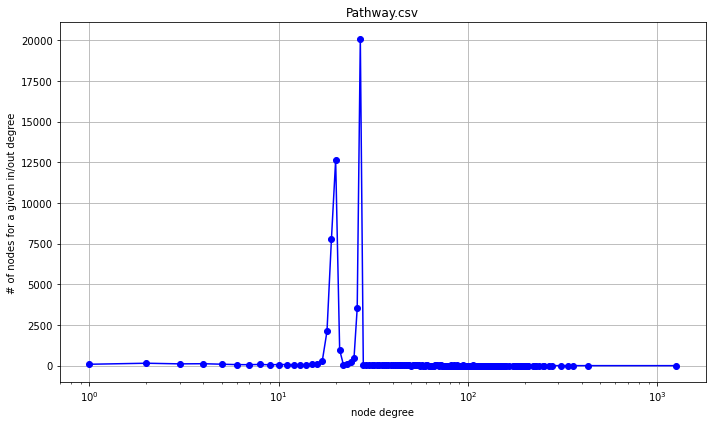

<Figure size 432x288 with 0 Axes>

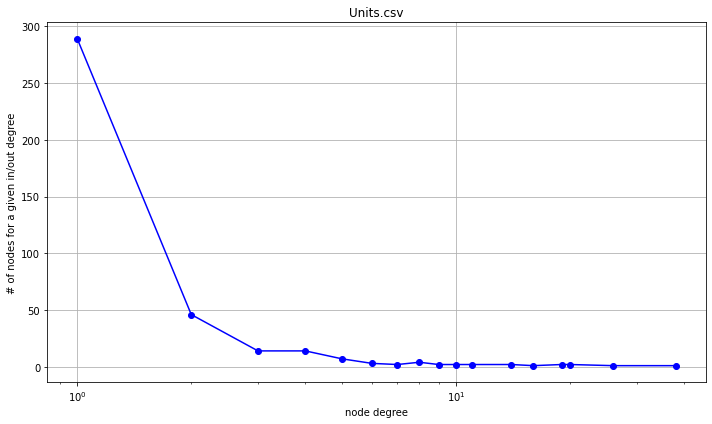

<Figure size 432x288 with 0 Axes>

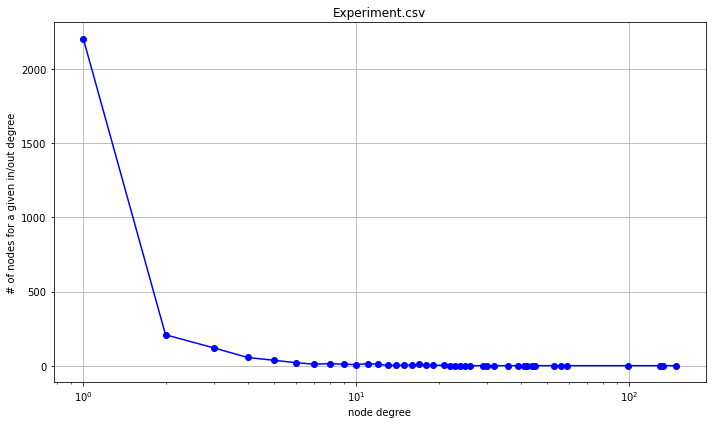

<Figure size 432x288 with 0 Axes>

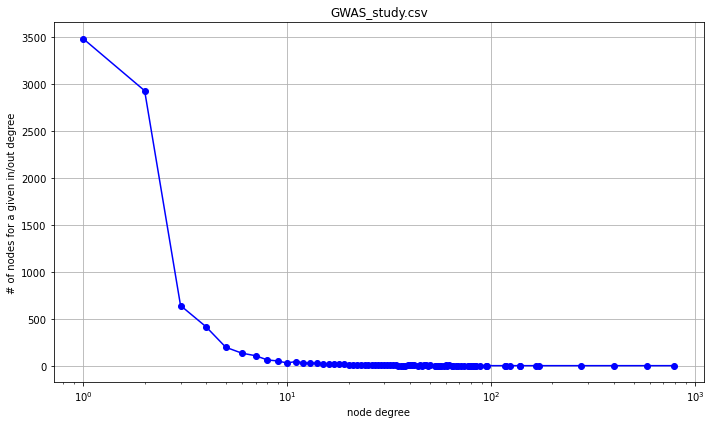

<Figure size 432x288 with 0 Axes>

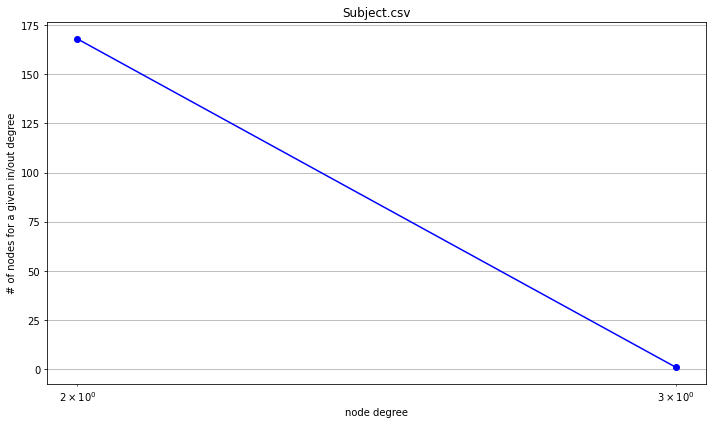

<Figure size 432x288 with 0 Axes>

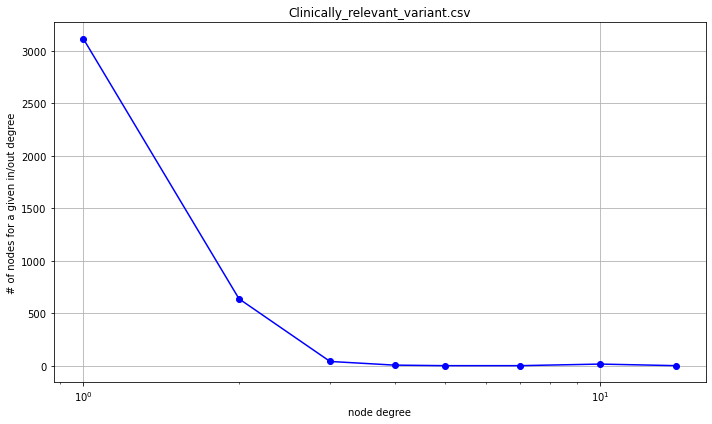

<Figure size 432x288 with 0 Axes>

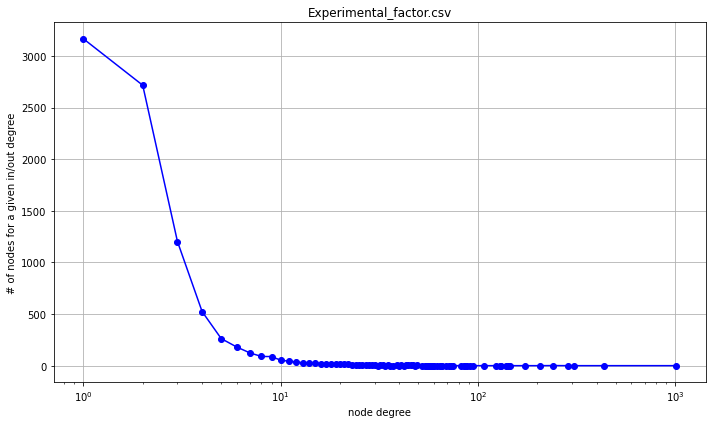

<Figure size 432x288 with 0 Axes>

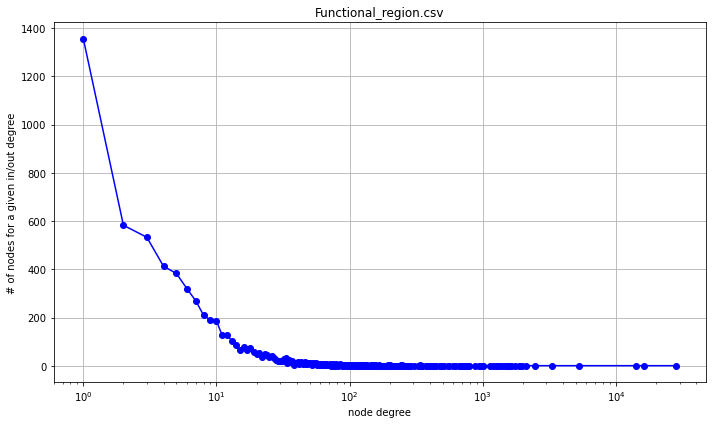

<Figure size 432x288 with 0 Axes>

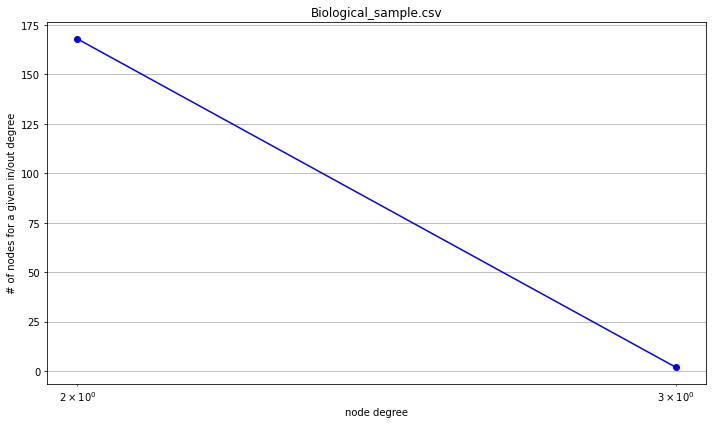

<Figure size 432x288 with 0 Axes>

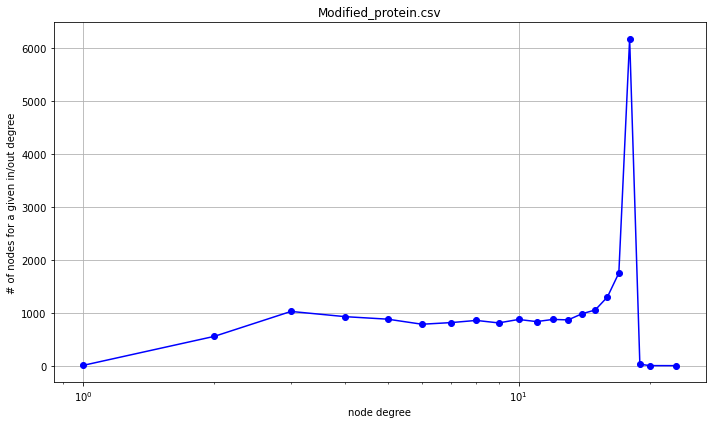

<Figure size 432x288 with 0 Axes>

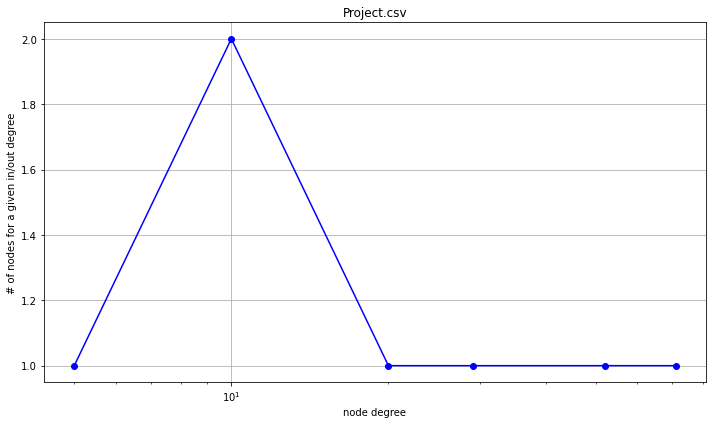

<Figure size 432x288 with 0 Axes>

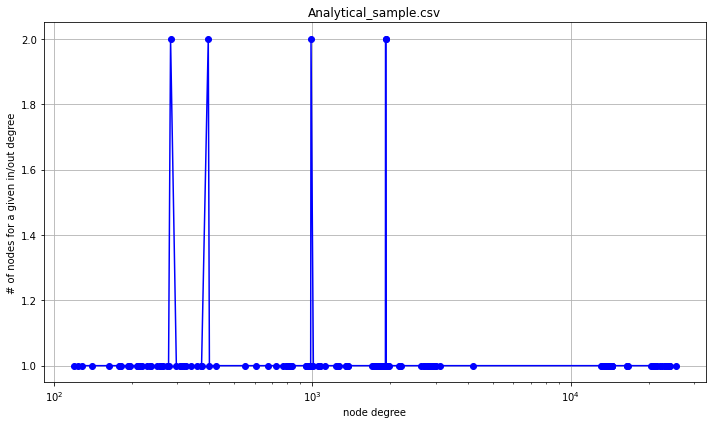

<Figure size 432x288 with 0 Axes>

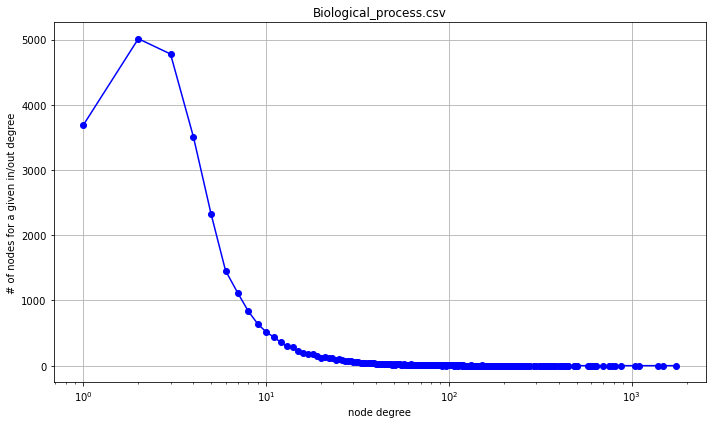

<Figure size 432x288 with 0 Axes>

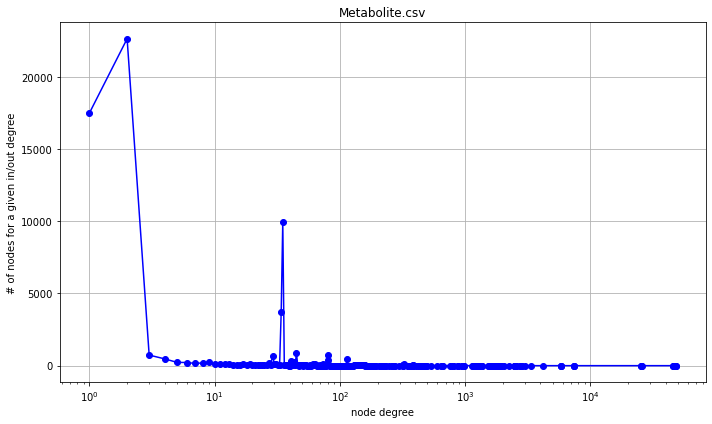

<Figure size 432x288 with 0 Axes>

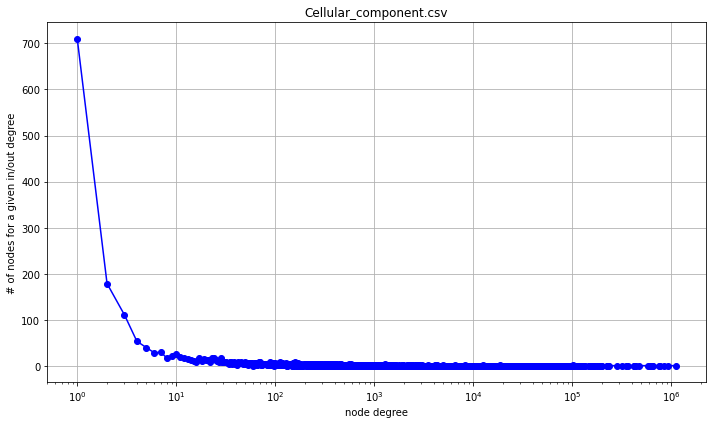

<Figure size 432x288 with 0 Axes>

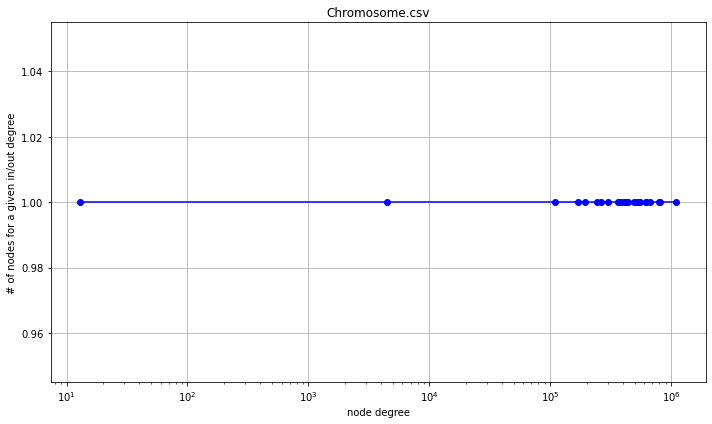

<Figure size 432x288 with 0 Axes>

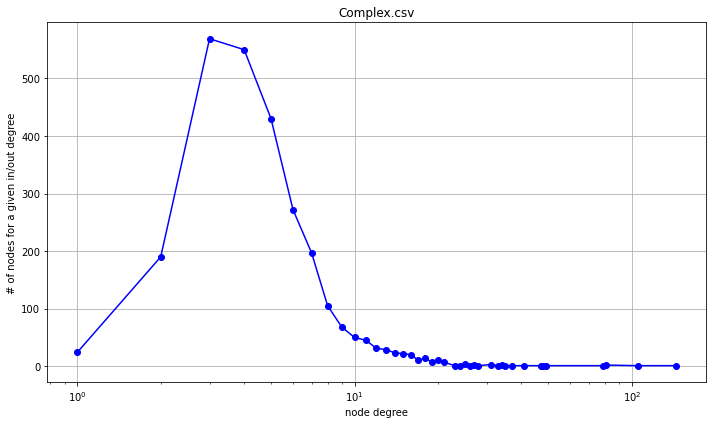

<Figure size 432x288 with 0 Axes>

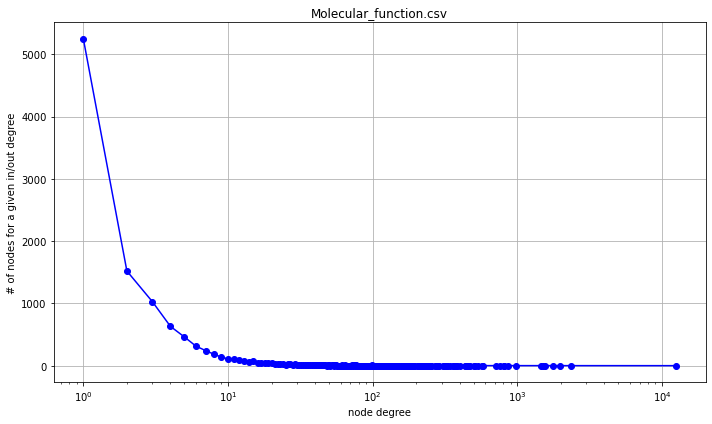

<Figure size 432x288 with 0 Axes>

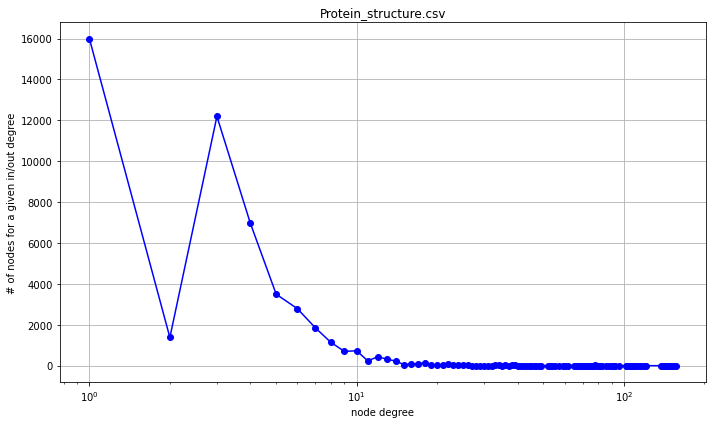

<Figure size 432x288 with 0 Axes>

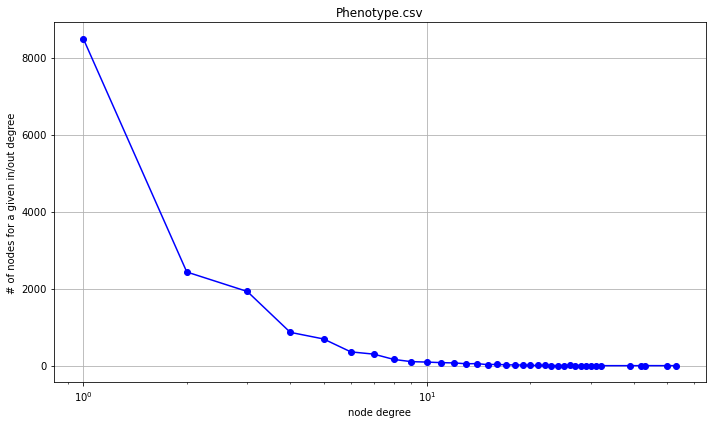

<Figure size 432x288 with 0 Axes>

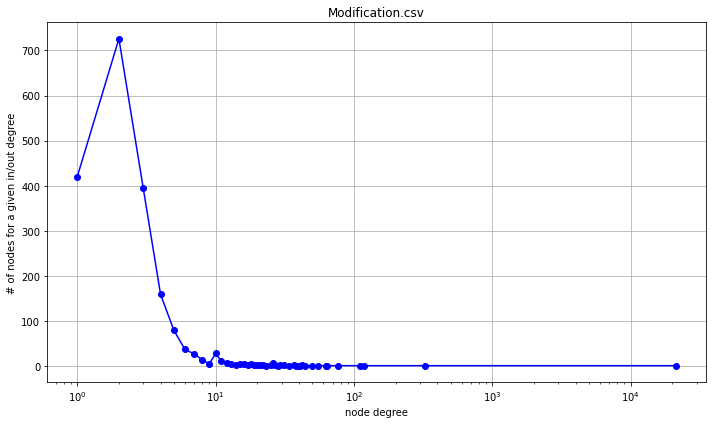

<Figure size 432x288 with 0 Axes>

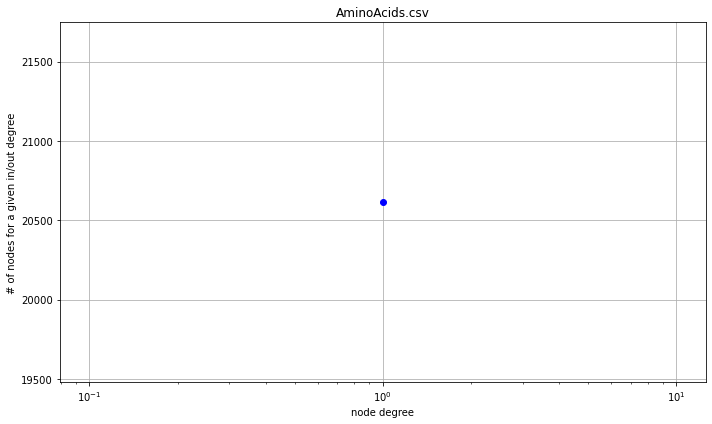

DONE


In [26]:
# Loop through each file in the directory
for filename in os.listdir(folder_path):
    
    if filename.endswith('.csv'):
        filepath = os.path.join(folder_path, filename)
        # Initialize a list to store the numbers
        numbers = []

        with open(filepath, mode='r', encoding='utf-8') as file:
            reader = csv.reader(file)
            next(reader)  

            for row in reader:
                # Ensure there's a second column
                if len(row) >= 2:
                    try:
                        # Convert the second column value to integer and append to the list
                        number = int(row[1].strip())
                        numbers.append(number)
                    except ValueError:
                        continue 
        
        # Count the occurrences of each number
        number_counts = Counter(numbers)
        # Extract the unique numbers and their counts
        node_degree = sorted(number_counts.keys())
        node_degree_freq = [number_counts[num] for num in node_degree]
        
        
       # Plotting the graph
        plt.figure(figsize=(10, 6))
        plt.semilogx(node_degree, node_degree_freq, marker='o', linestyle='-', color='b')
        plt.title(f'{filename}')
        plt.xlabel('node degree')
        plt.ylabel('# of nodes for a given in/out degree')

        plt.grid(True)
        plt.tight_layout()  # Adjust layout to not cut off labels
        plt.show()

        
        # Save the plot as an image file with the same name as the CSV file
        plot_filepath = os.path.splitext(filepath)[0] + '.png'
        plt.savefig(plot_filepath)
        
        
        
        
# Close the plot to release memory
plt.close()
print("DONE")

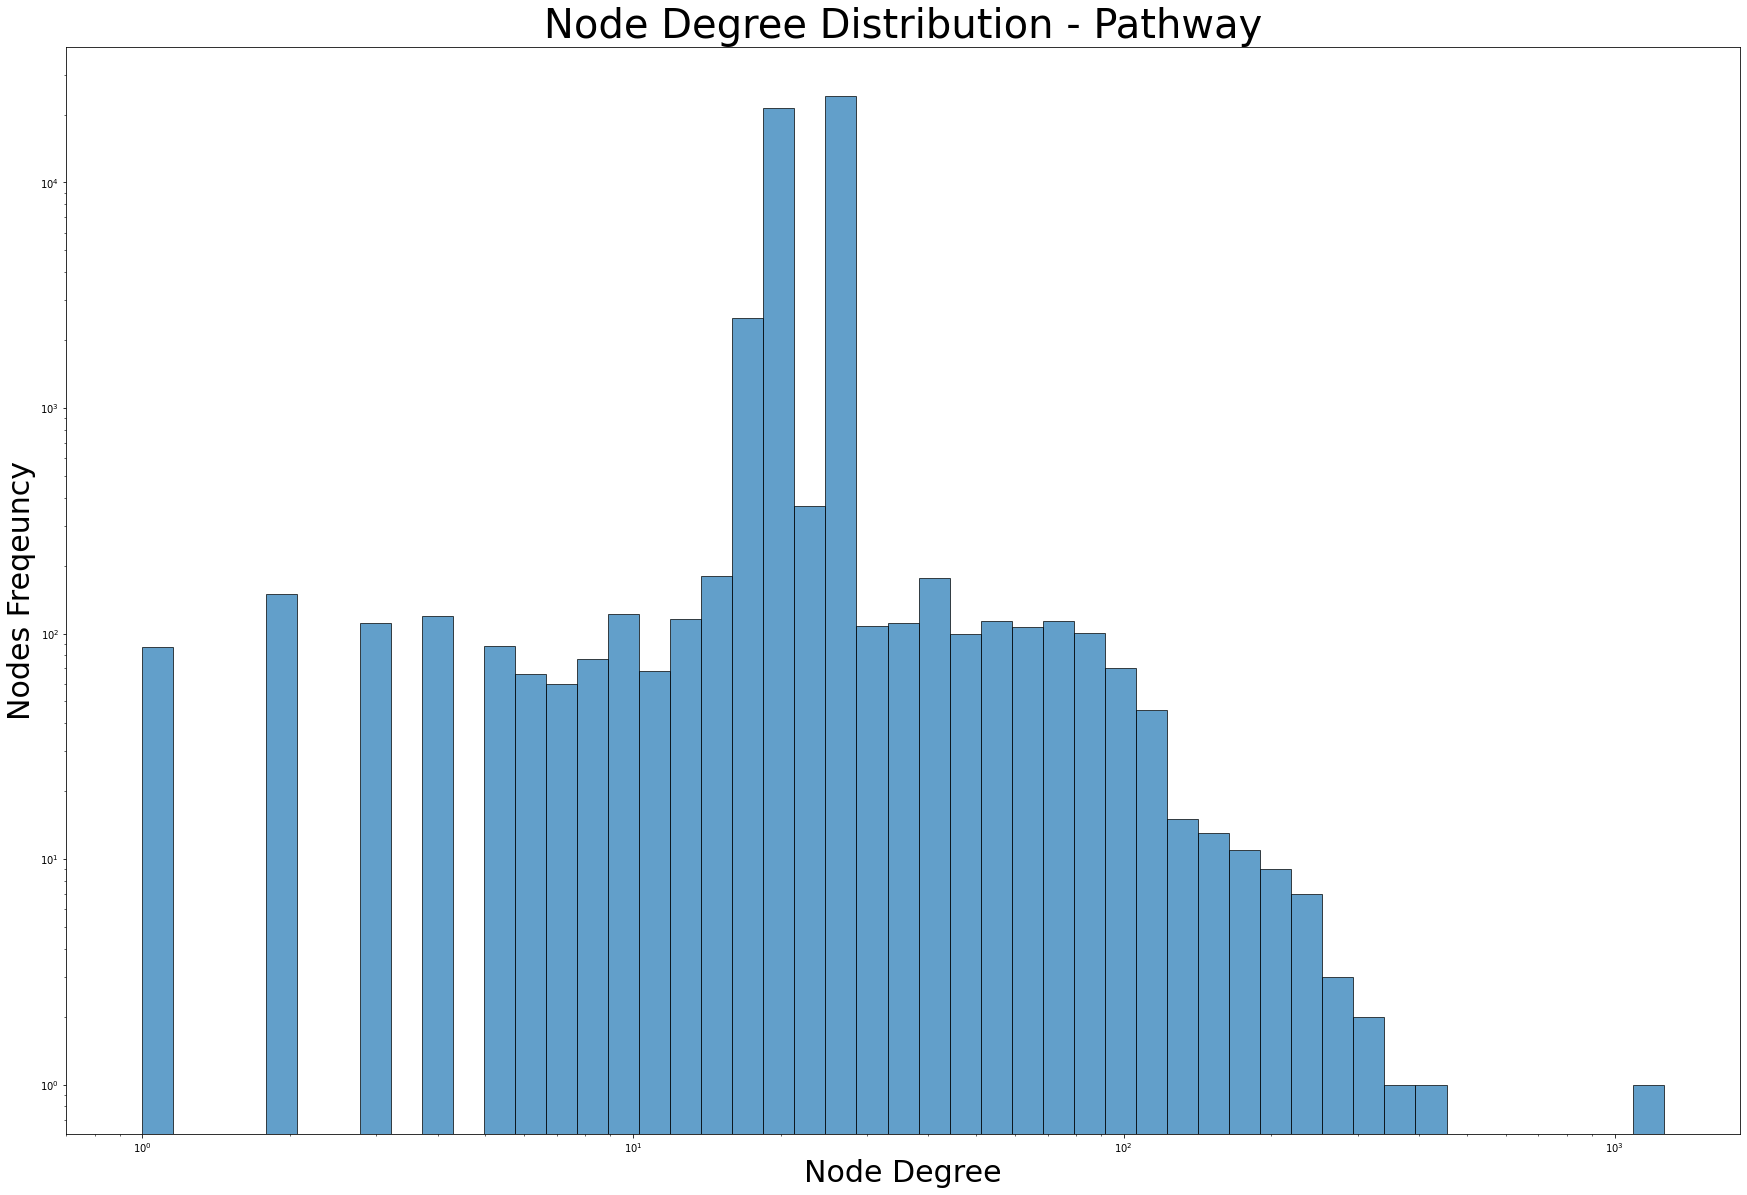

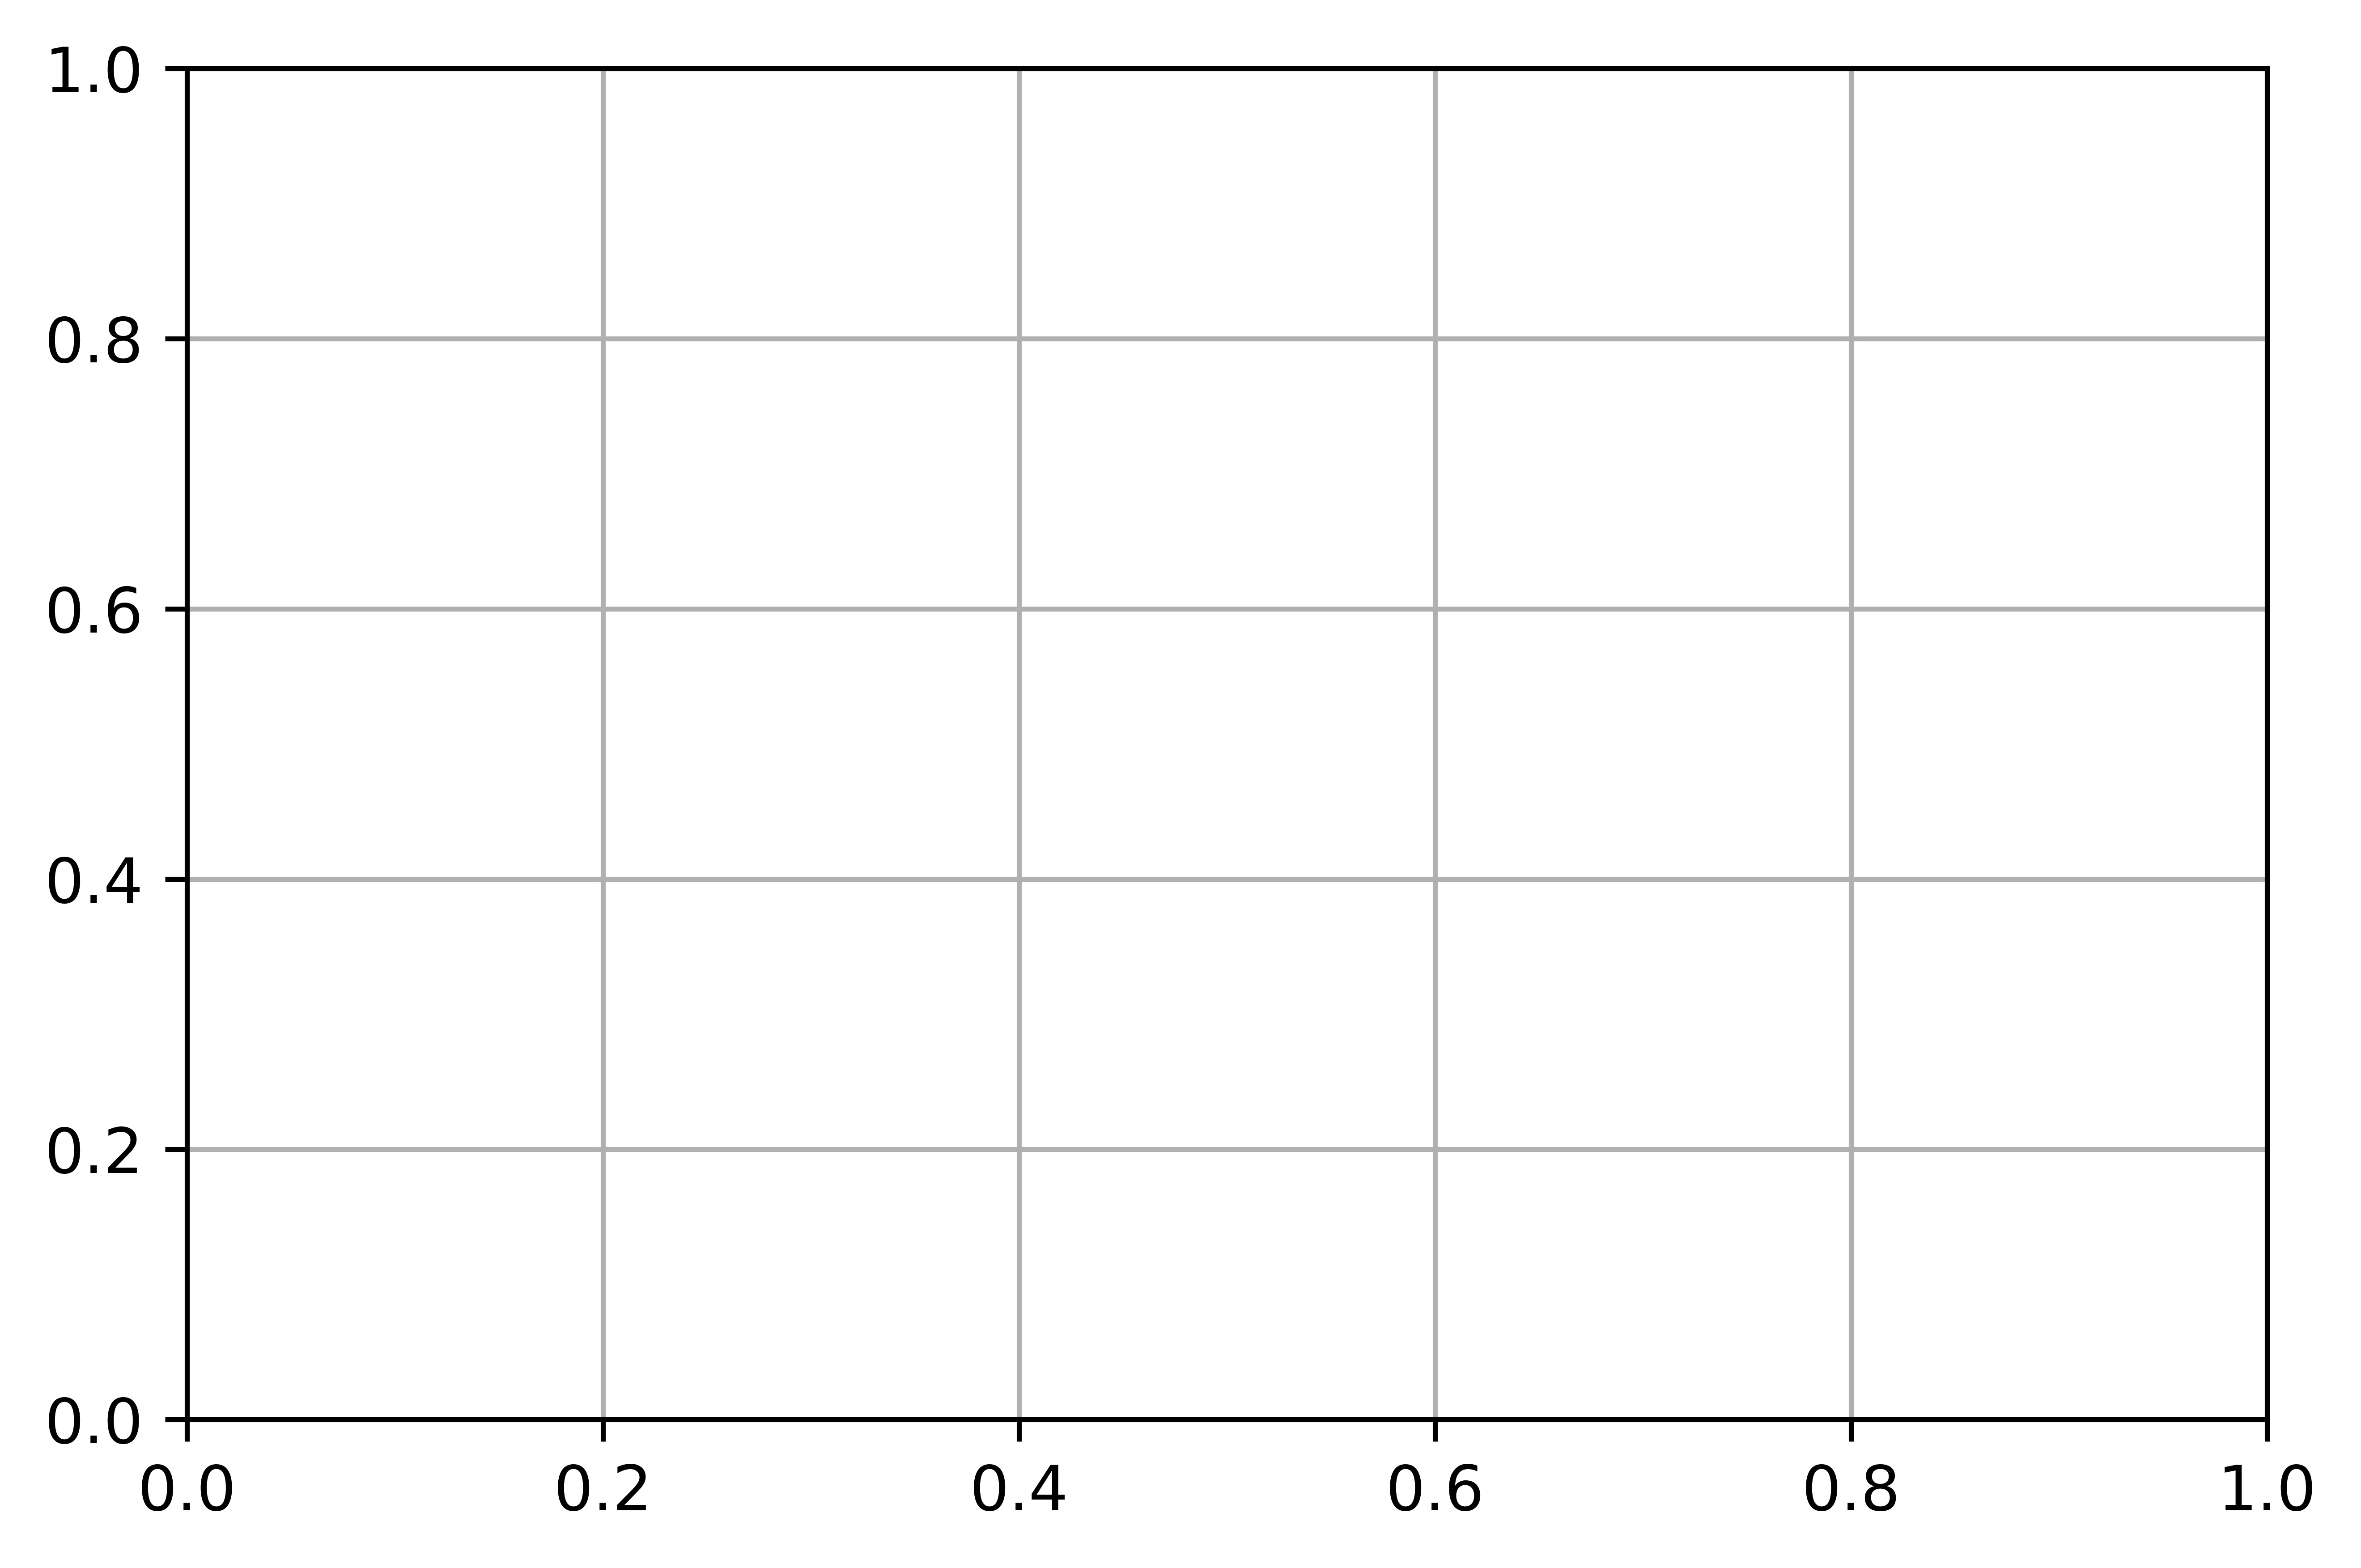

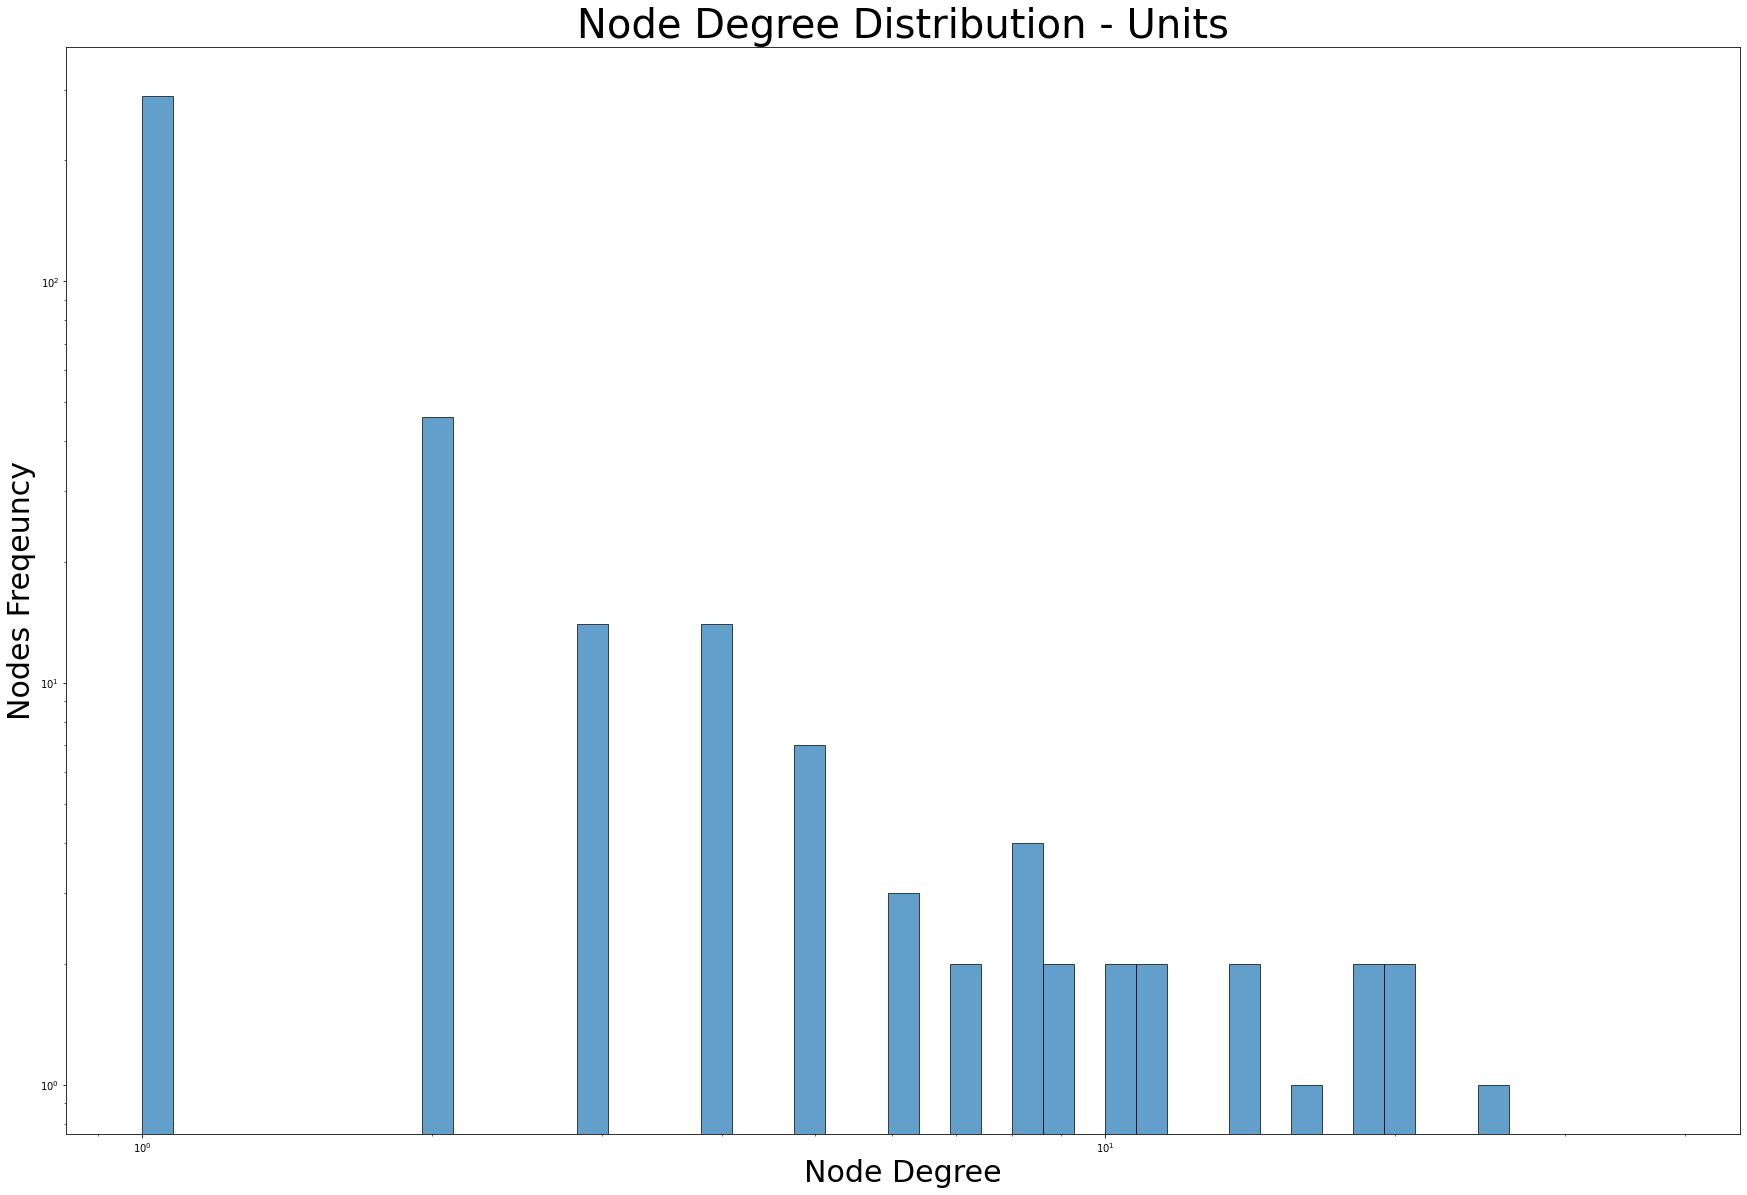

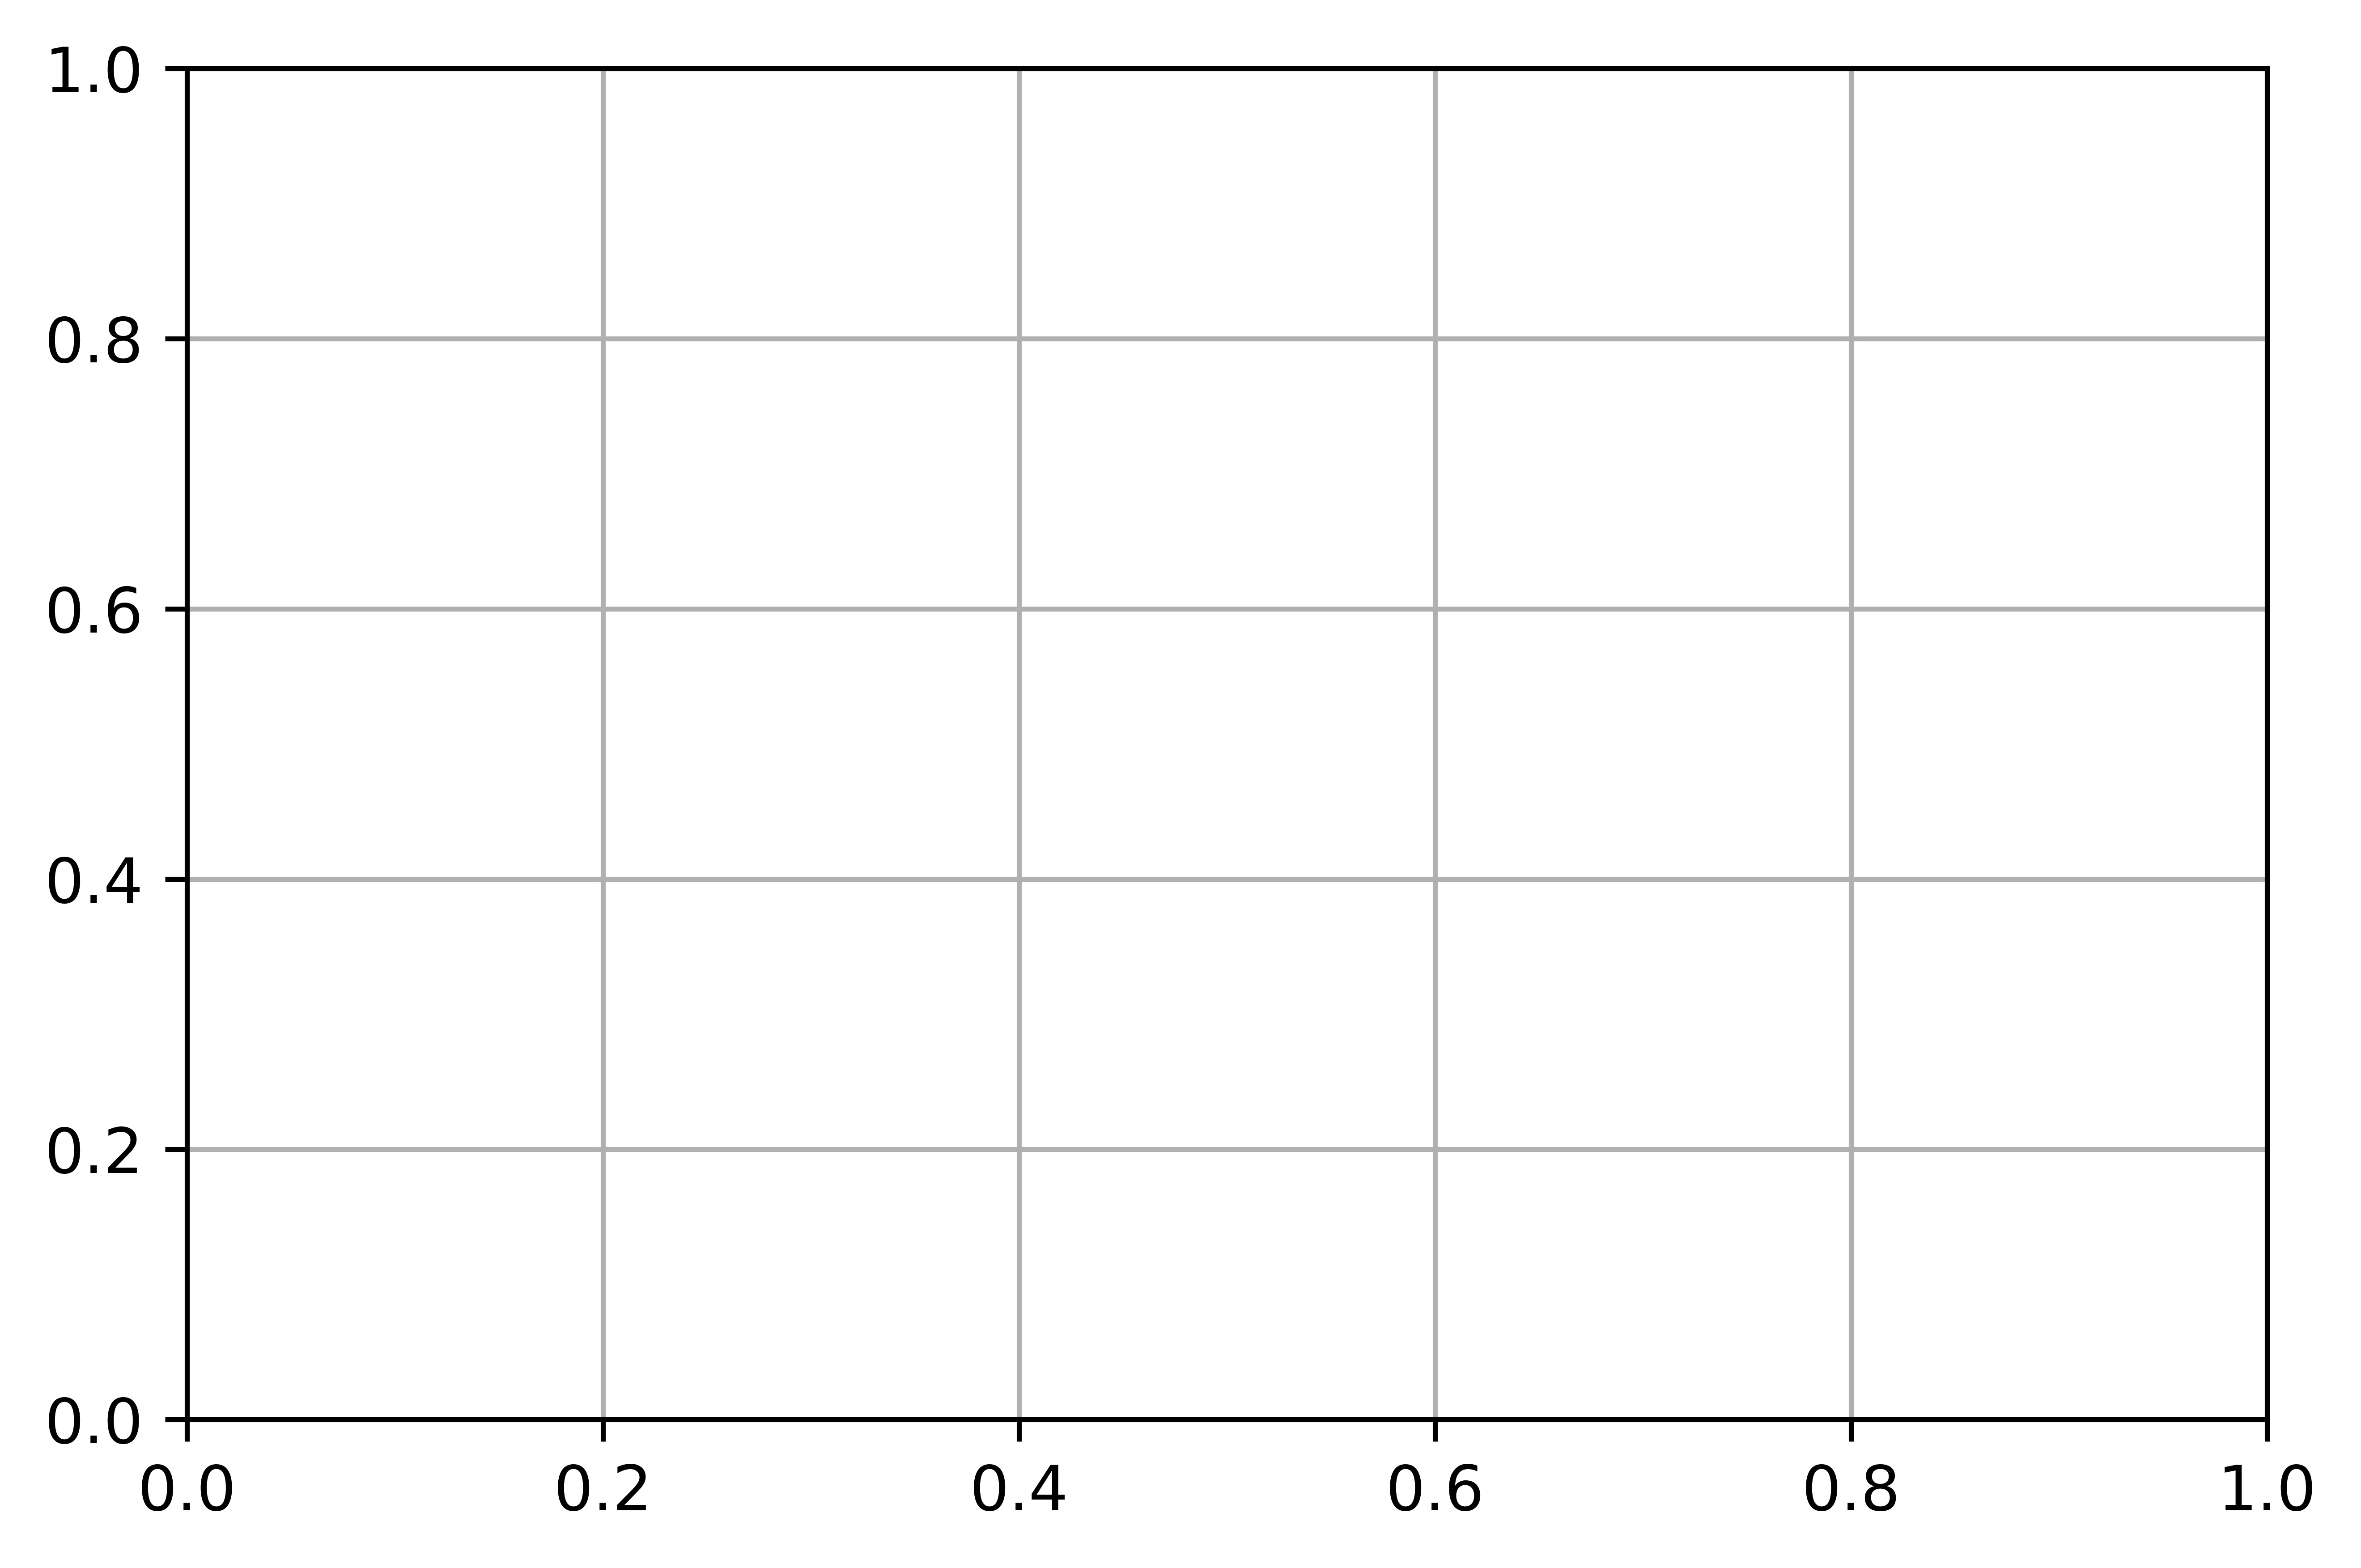

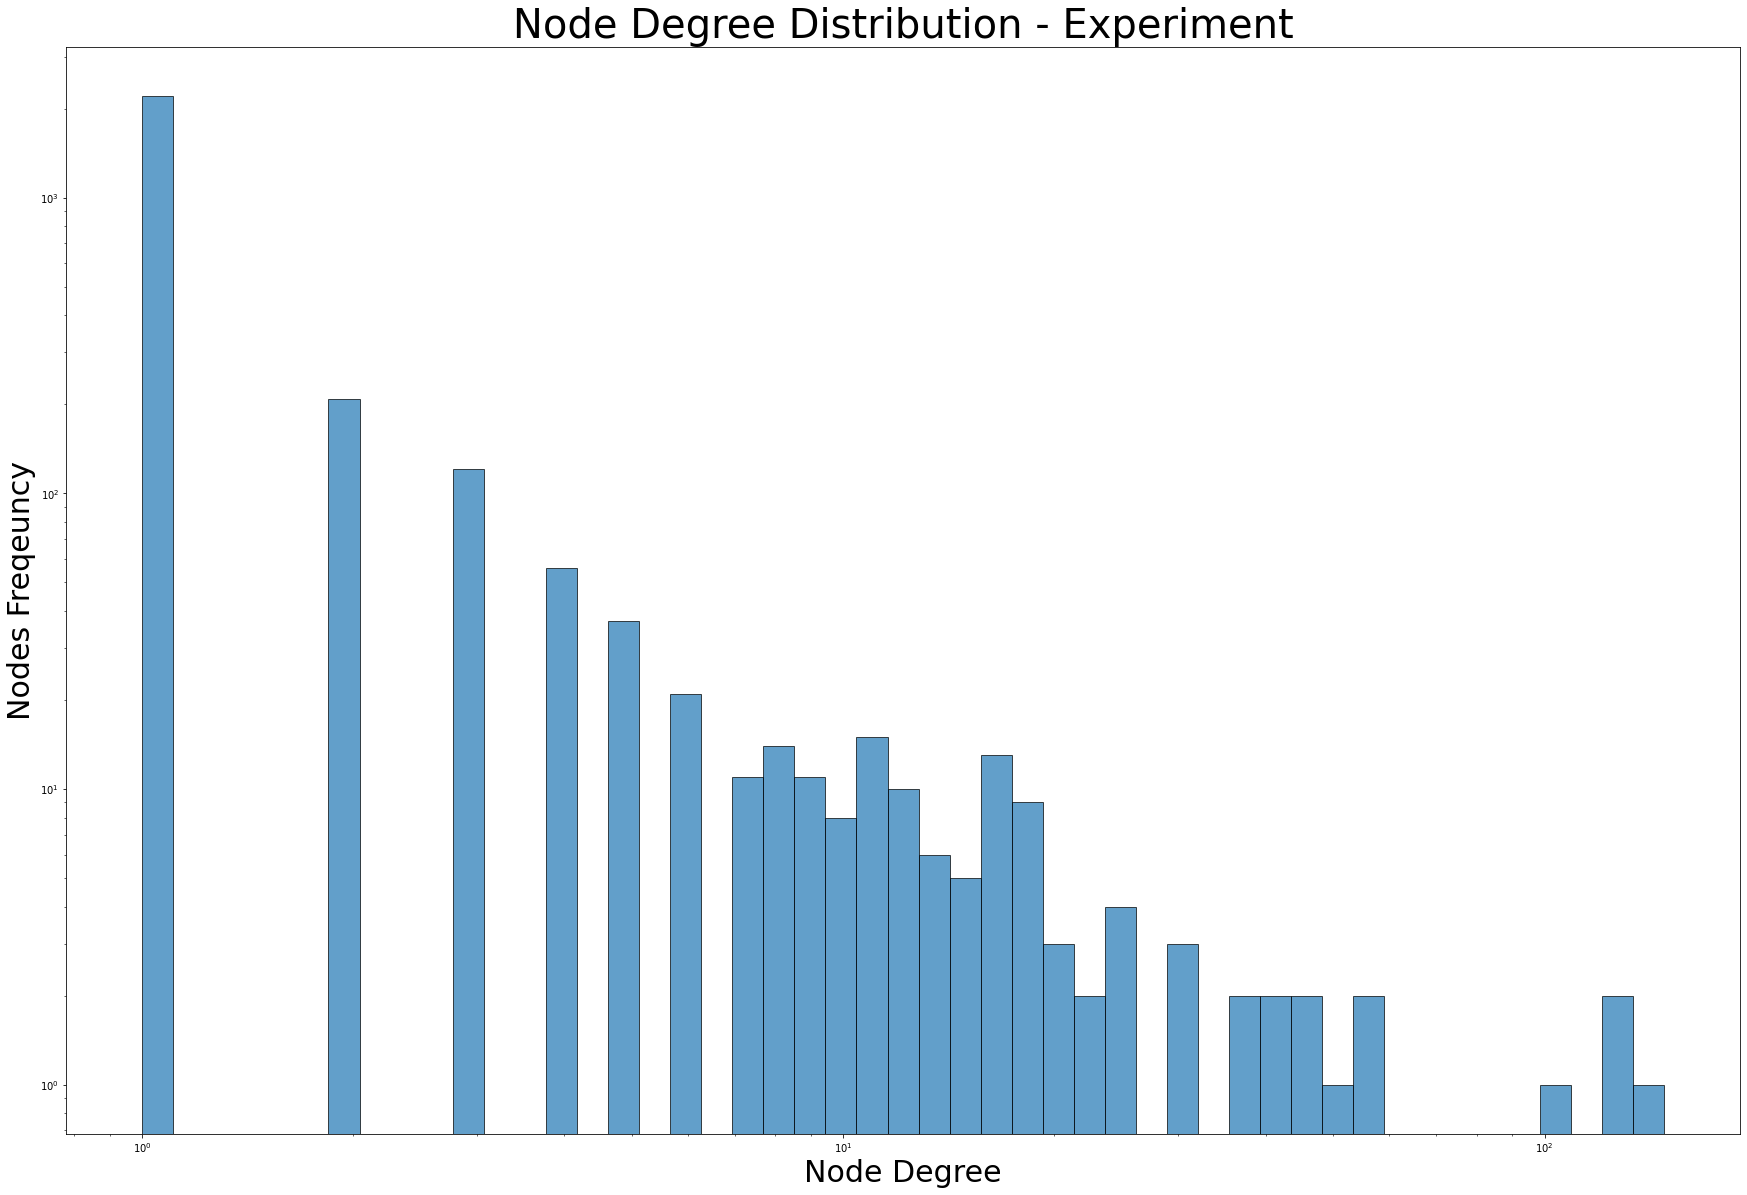

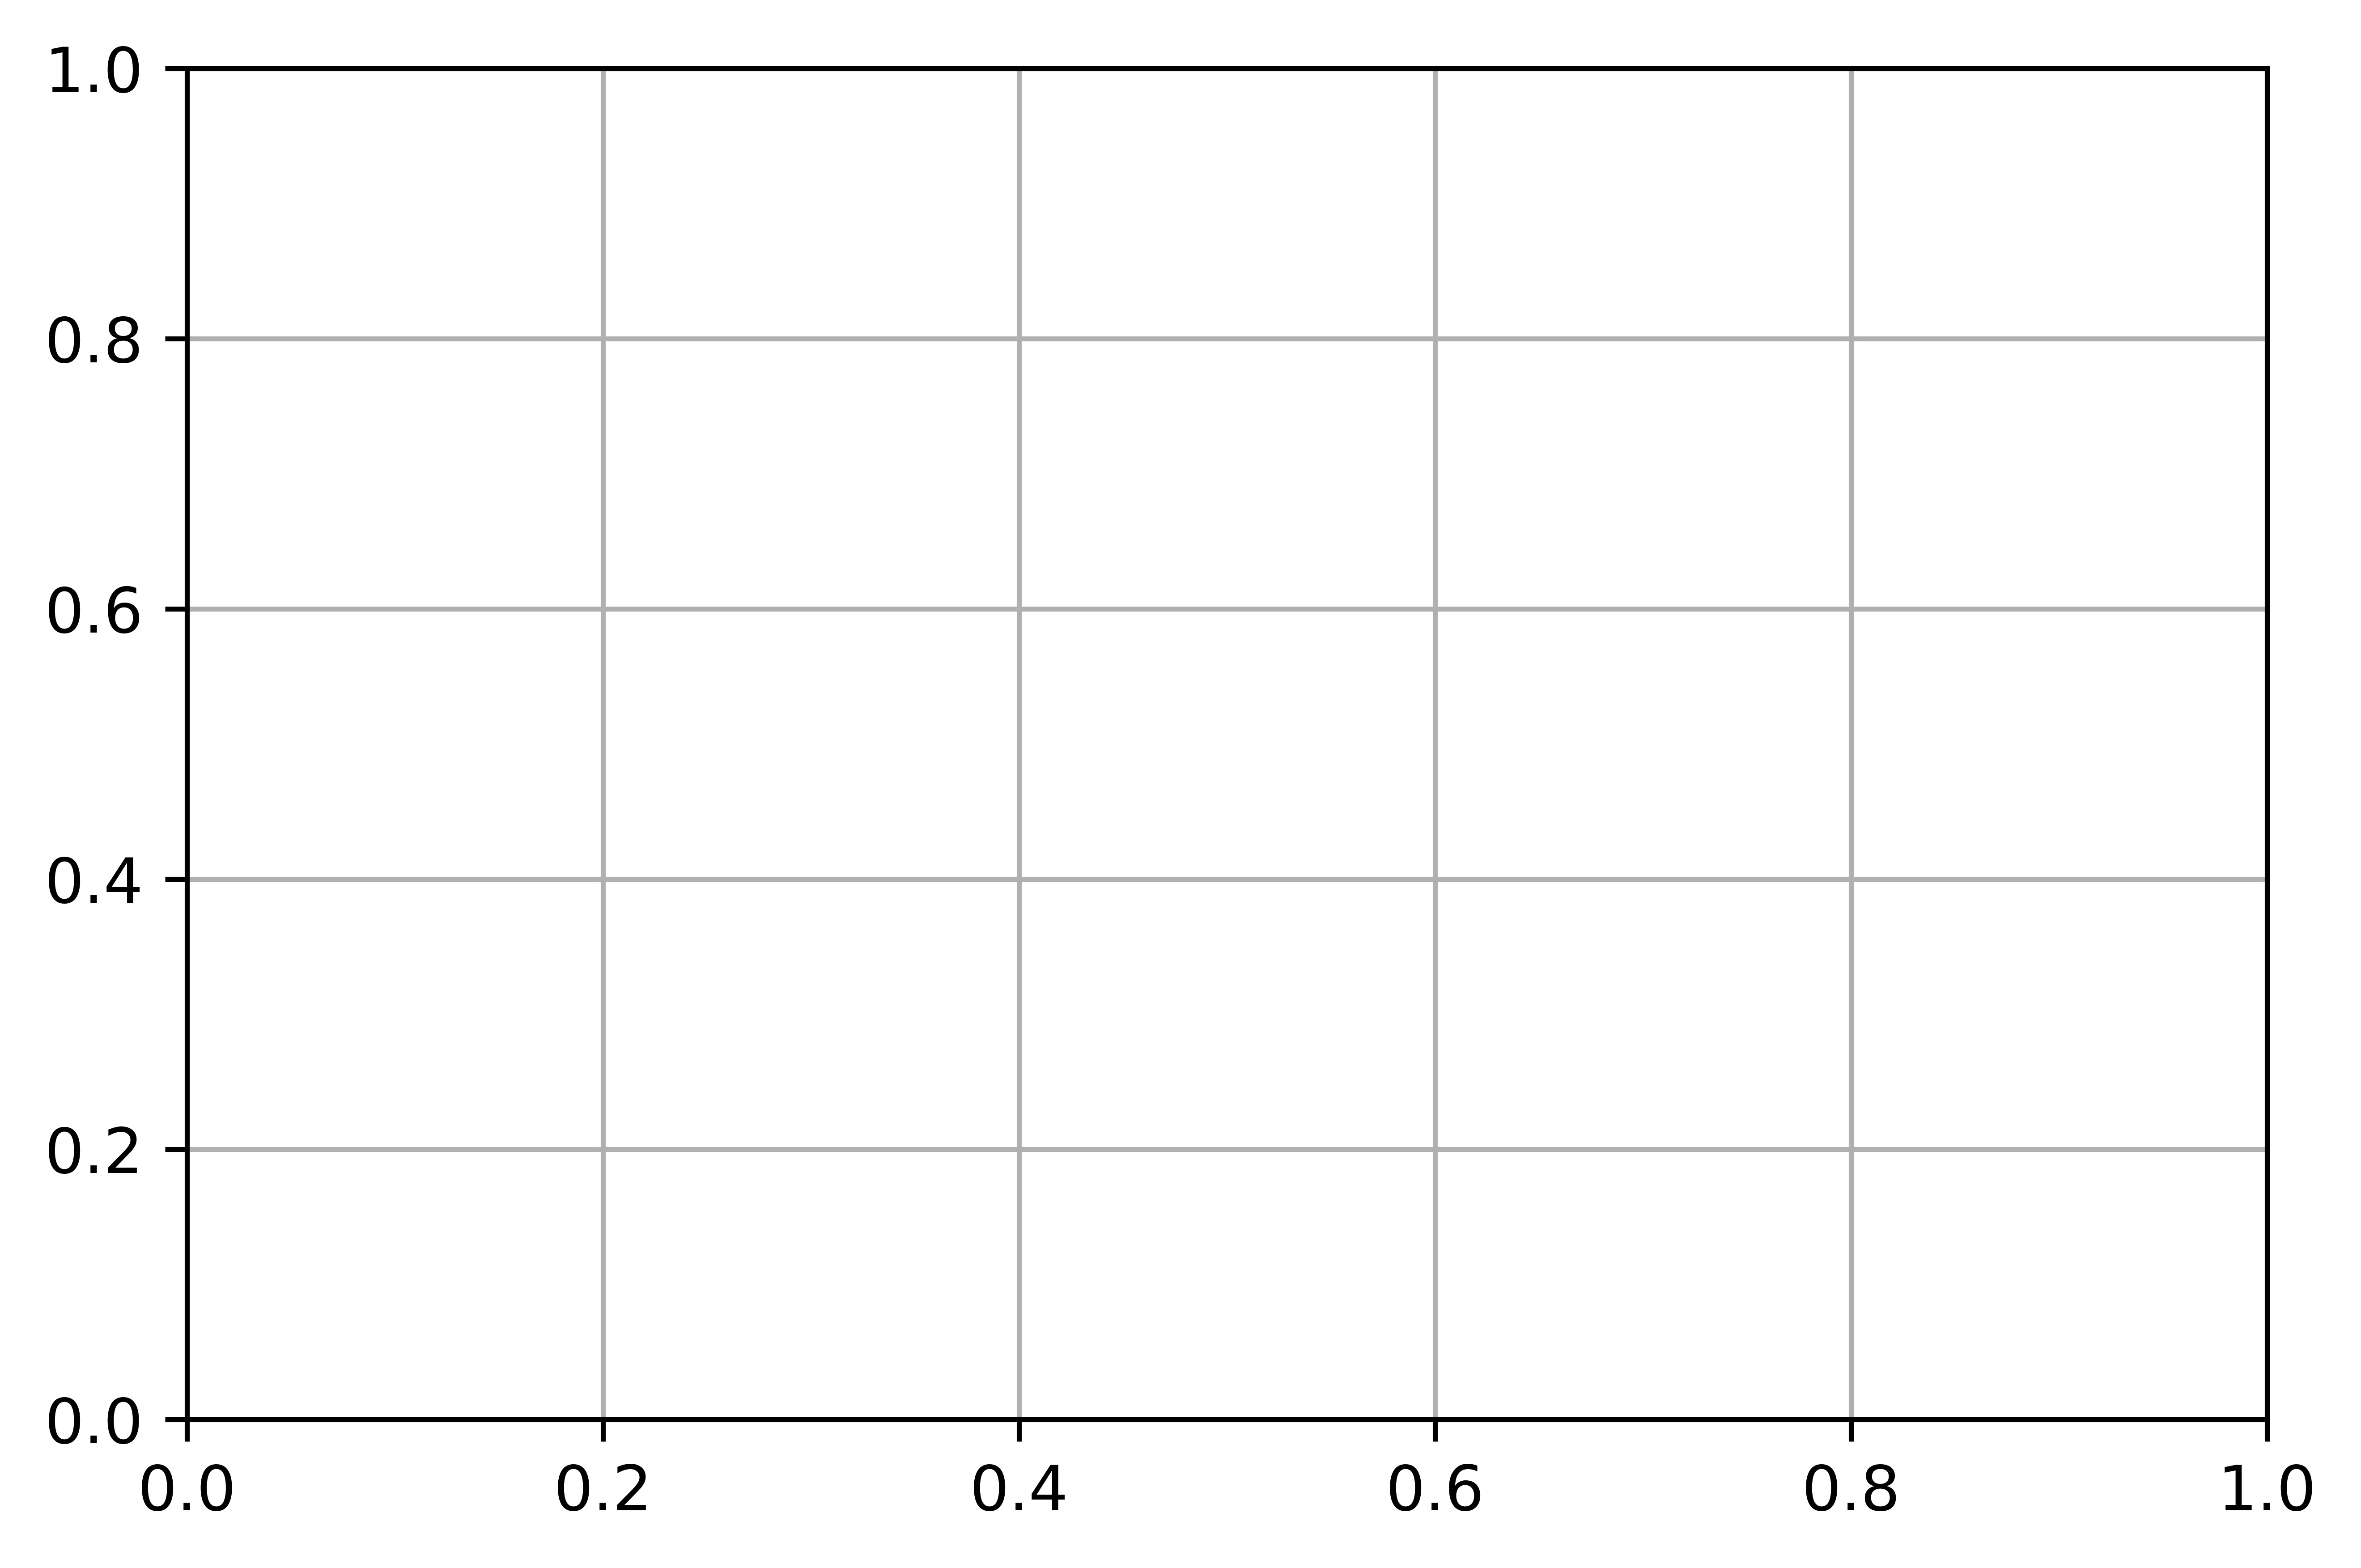

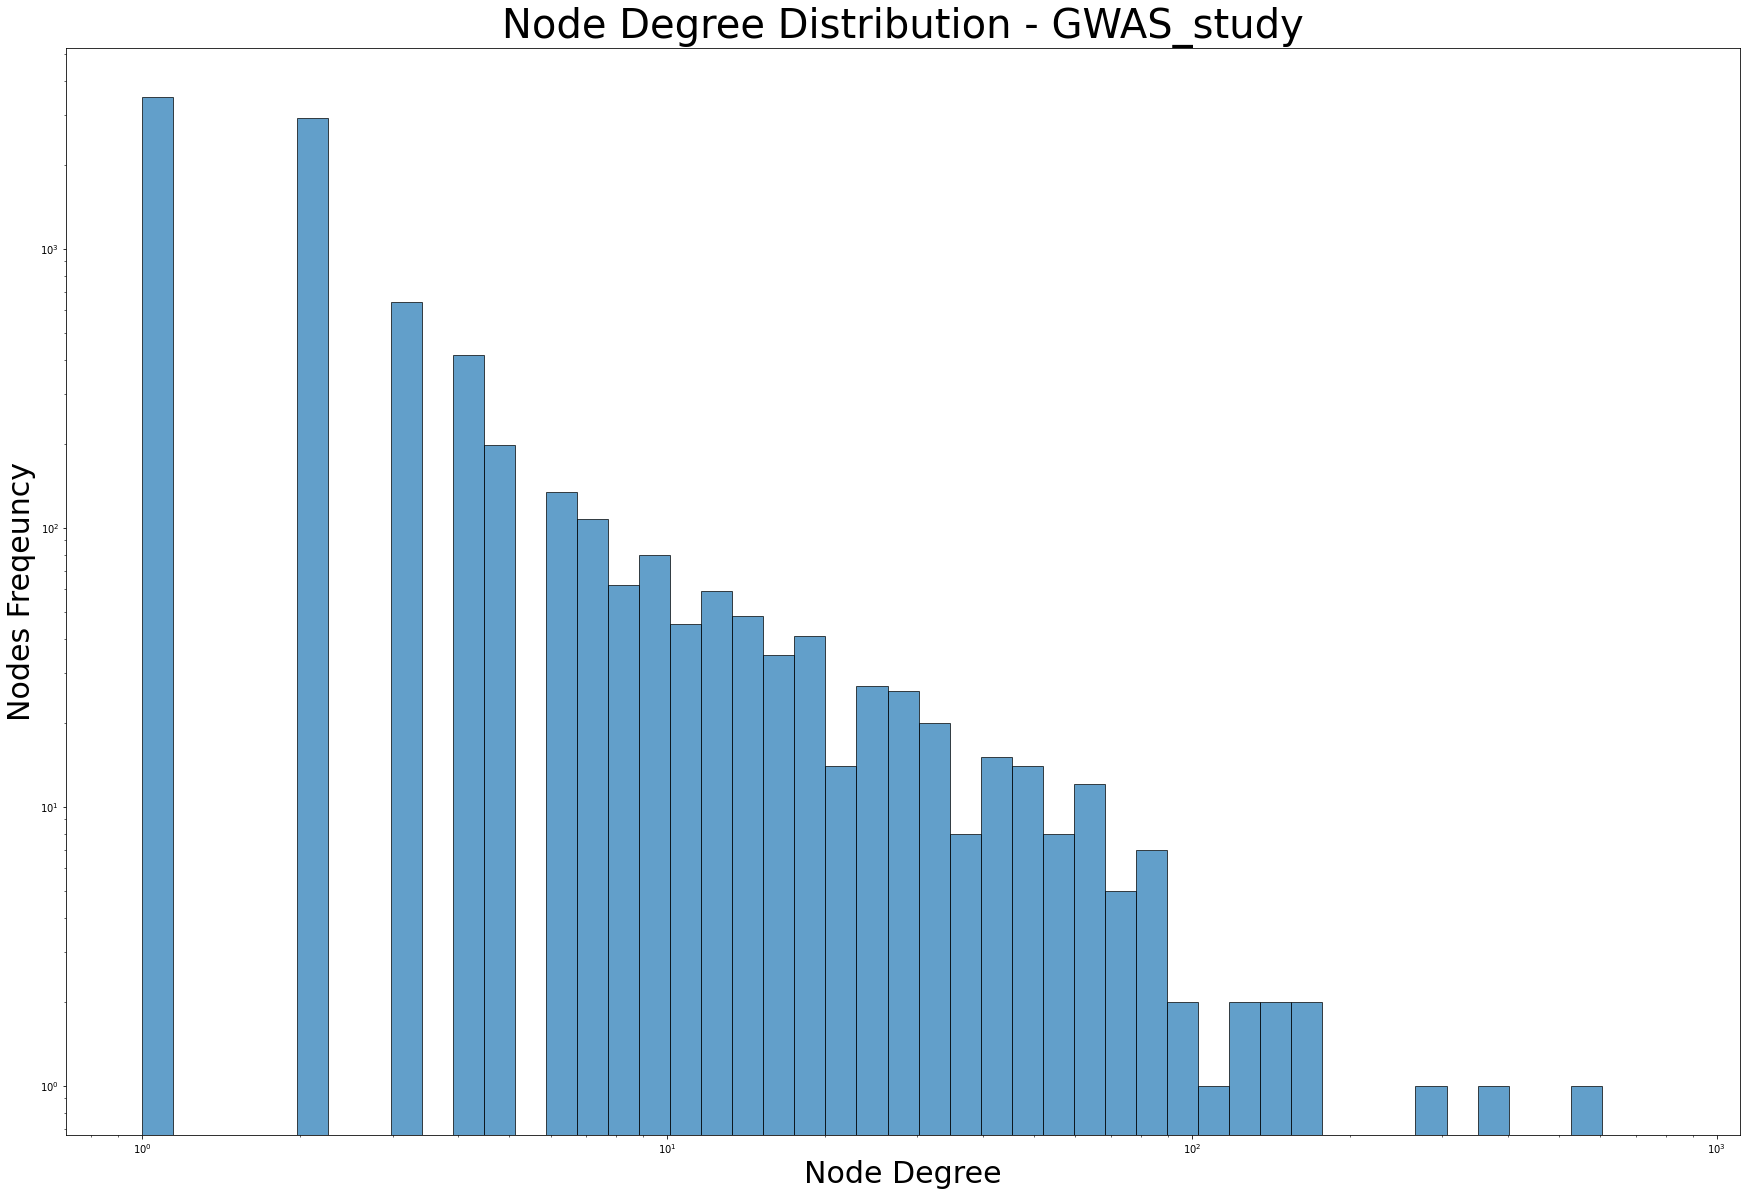

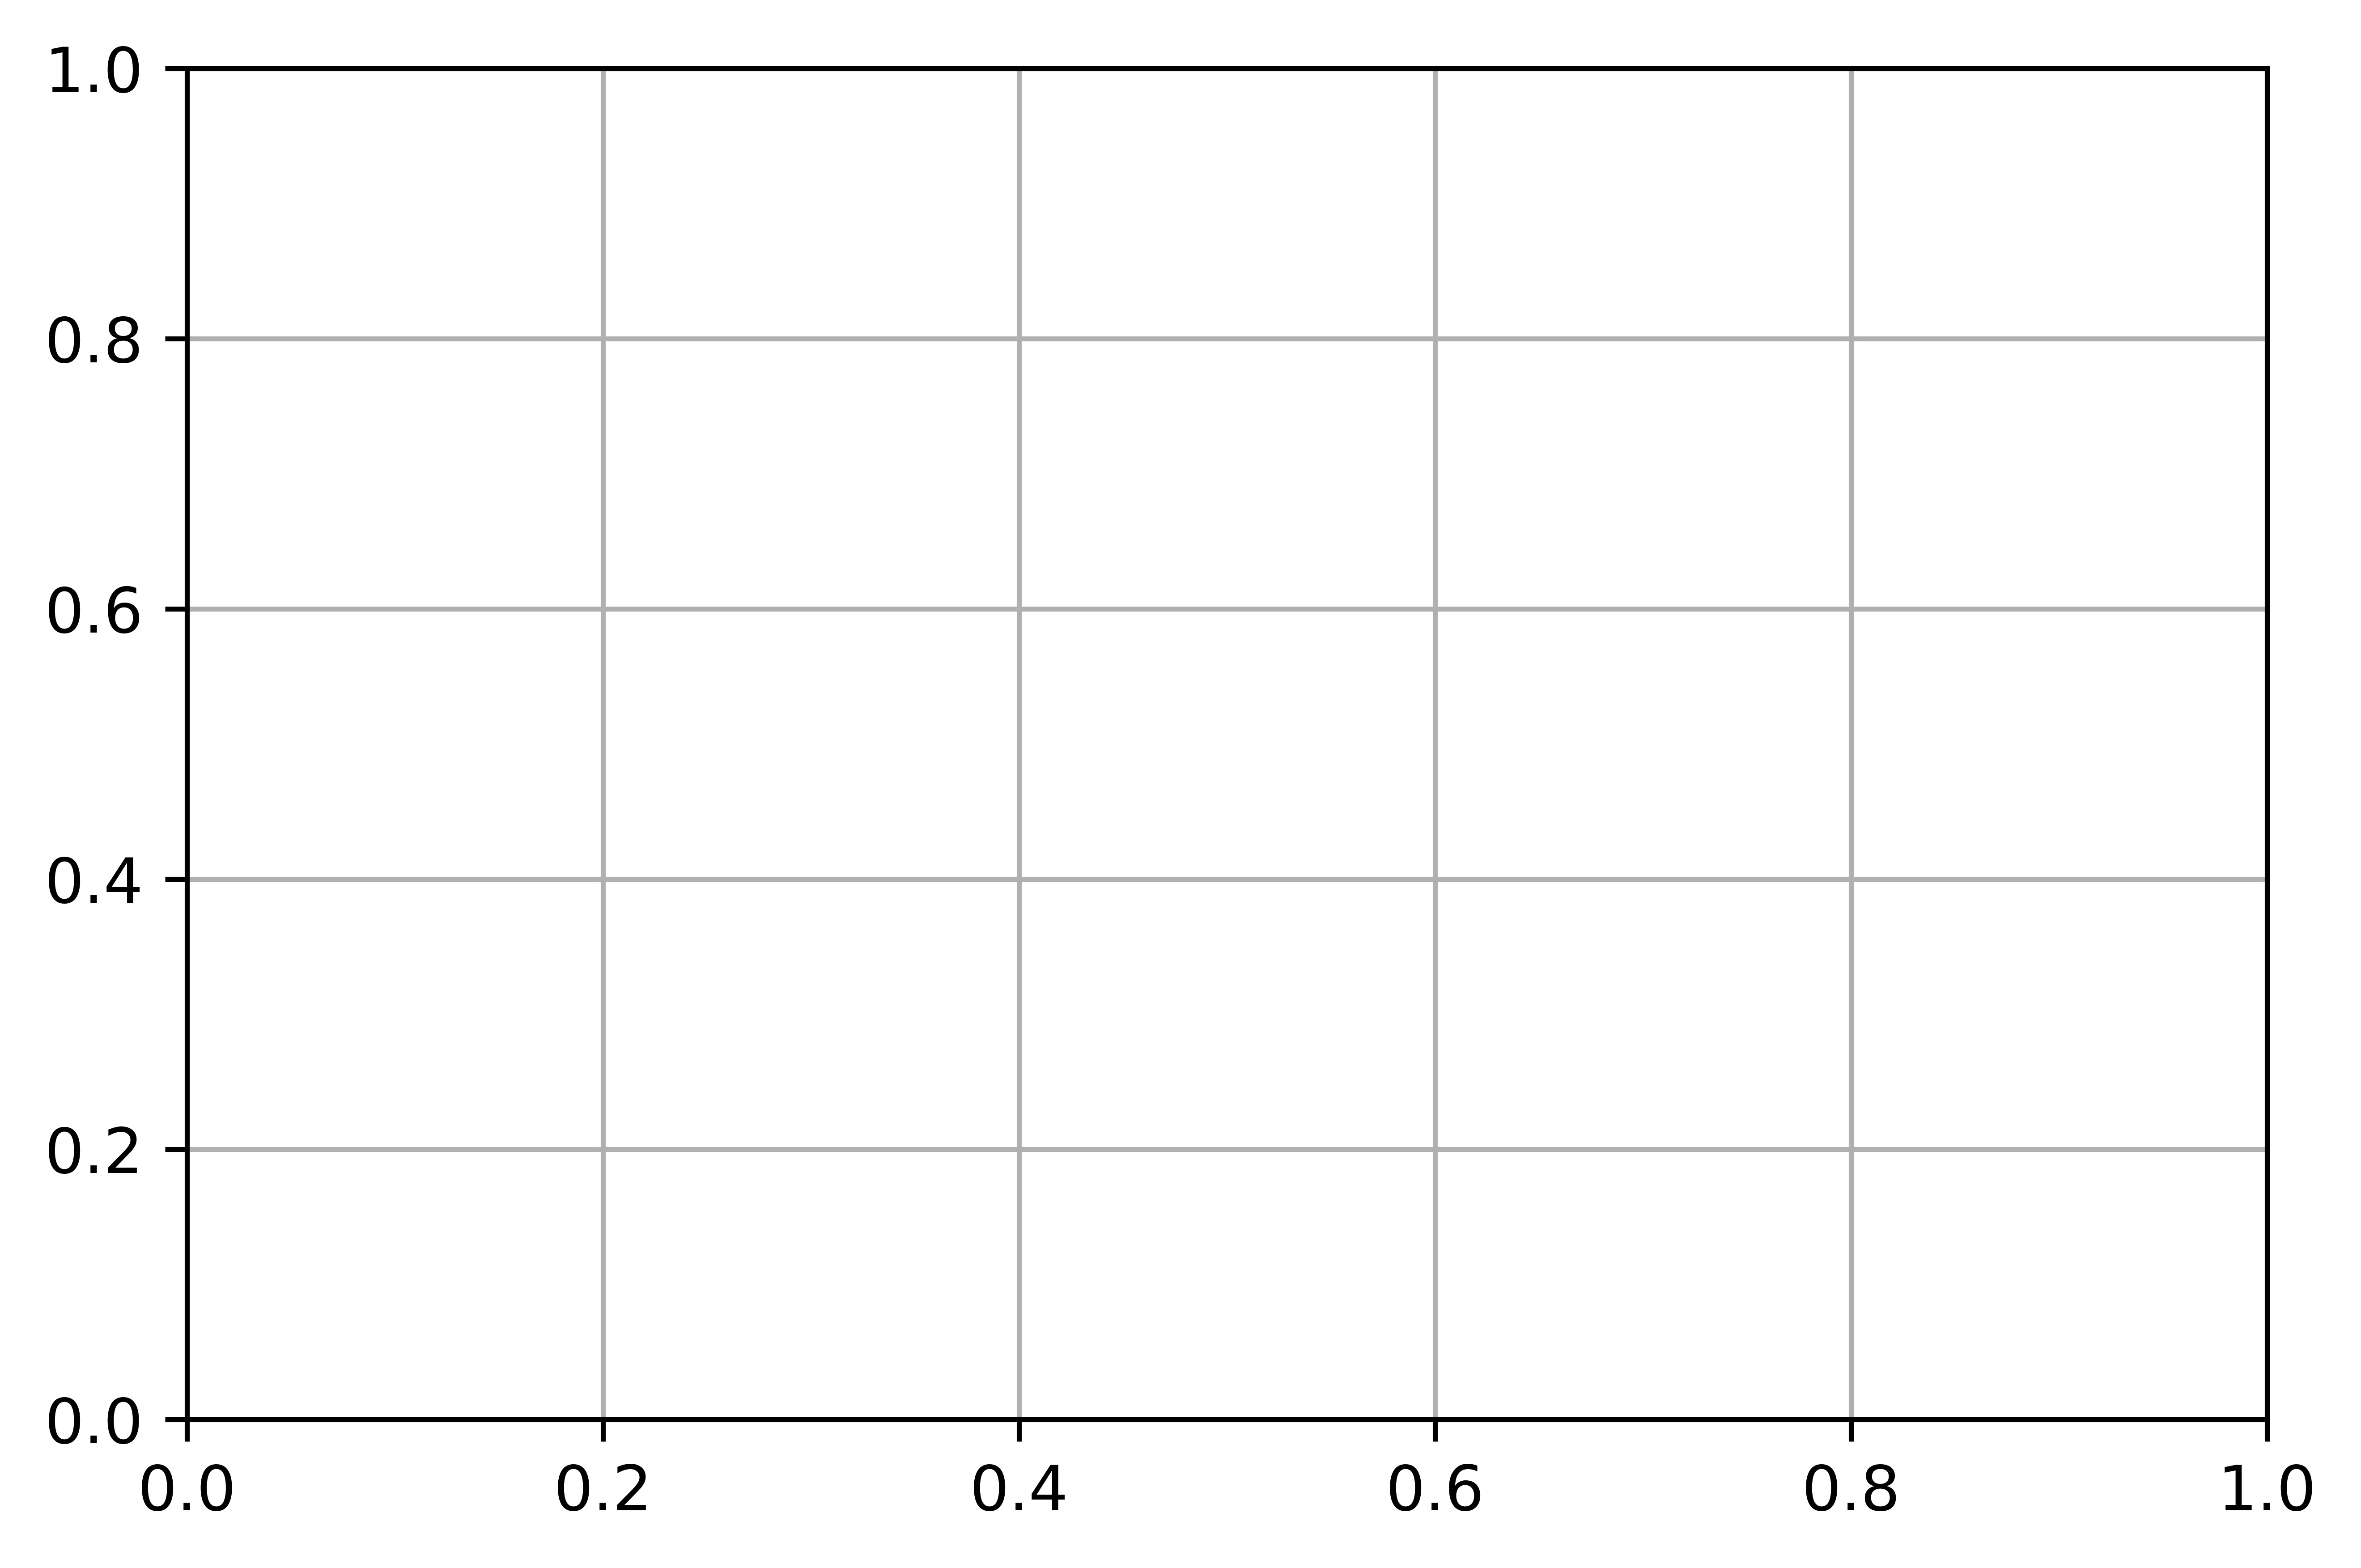

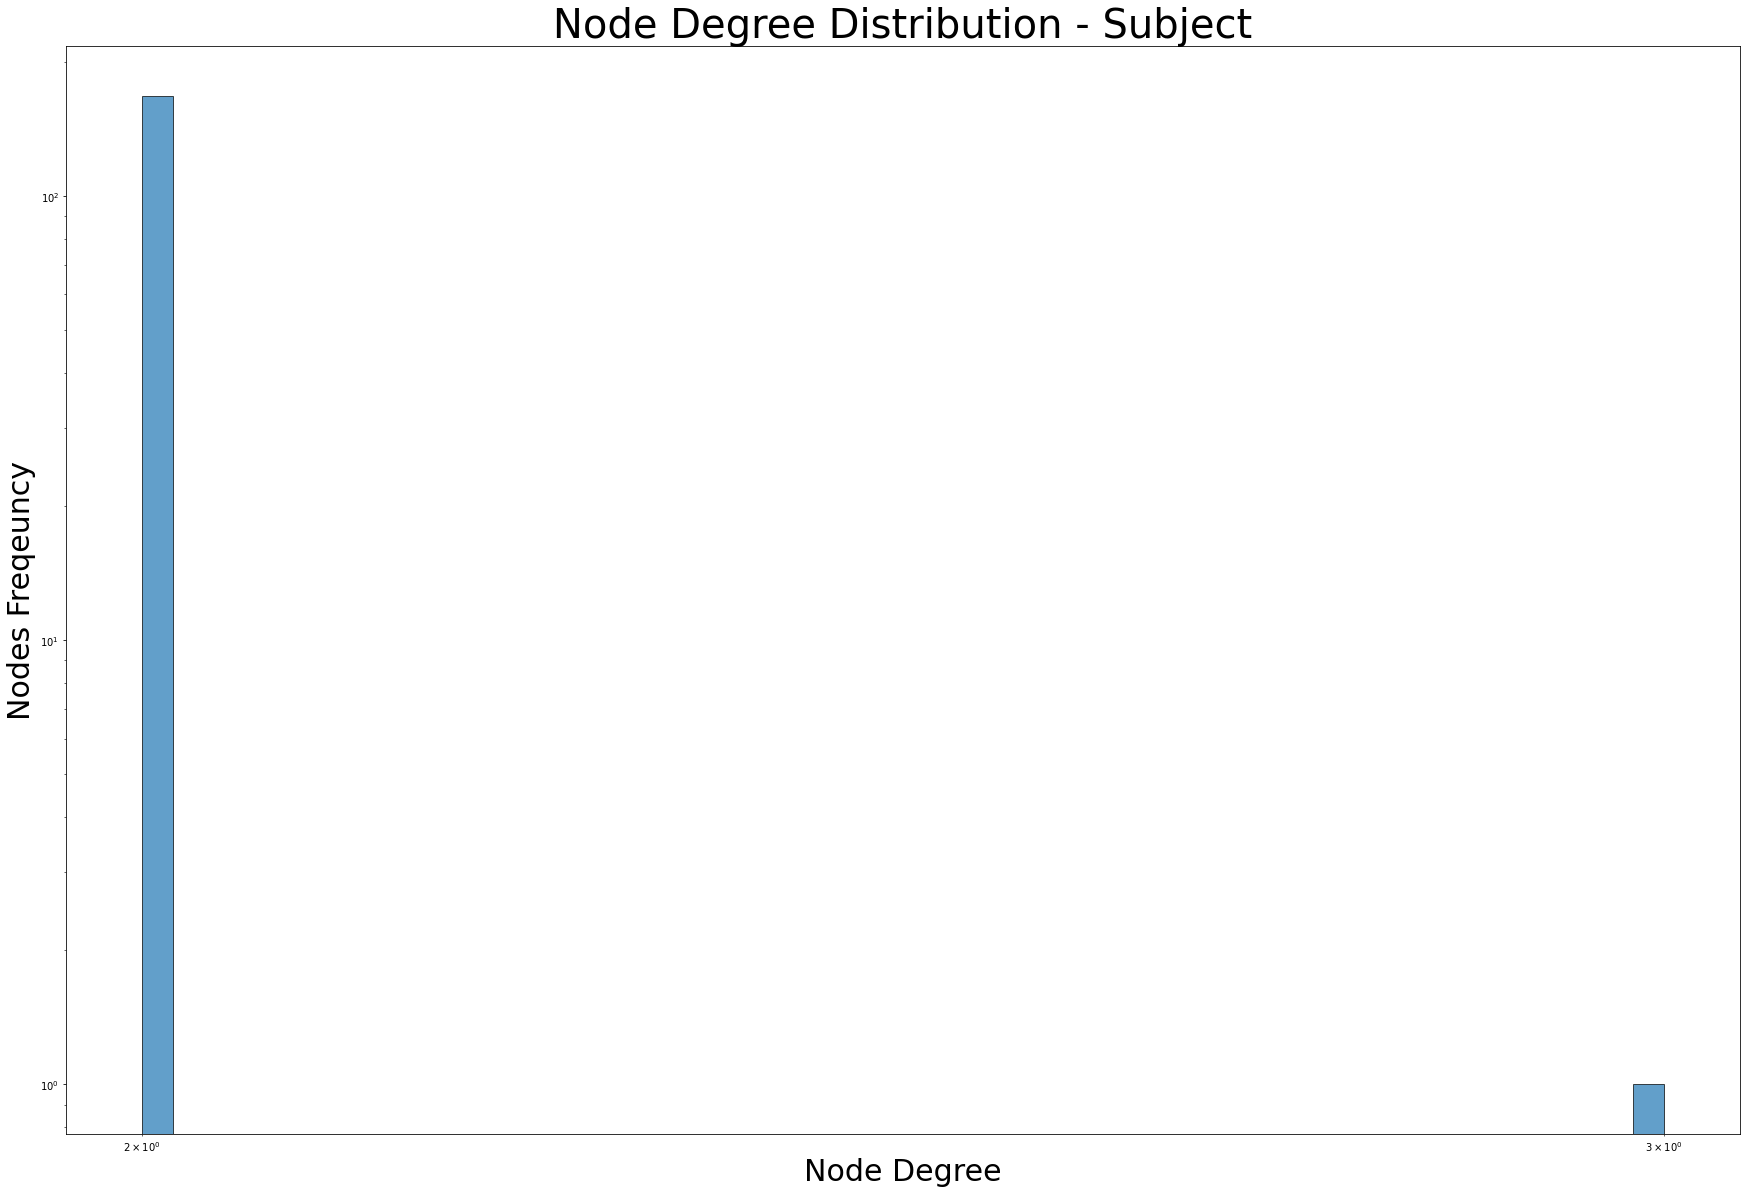

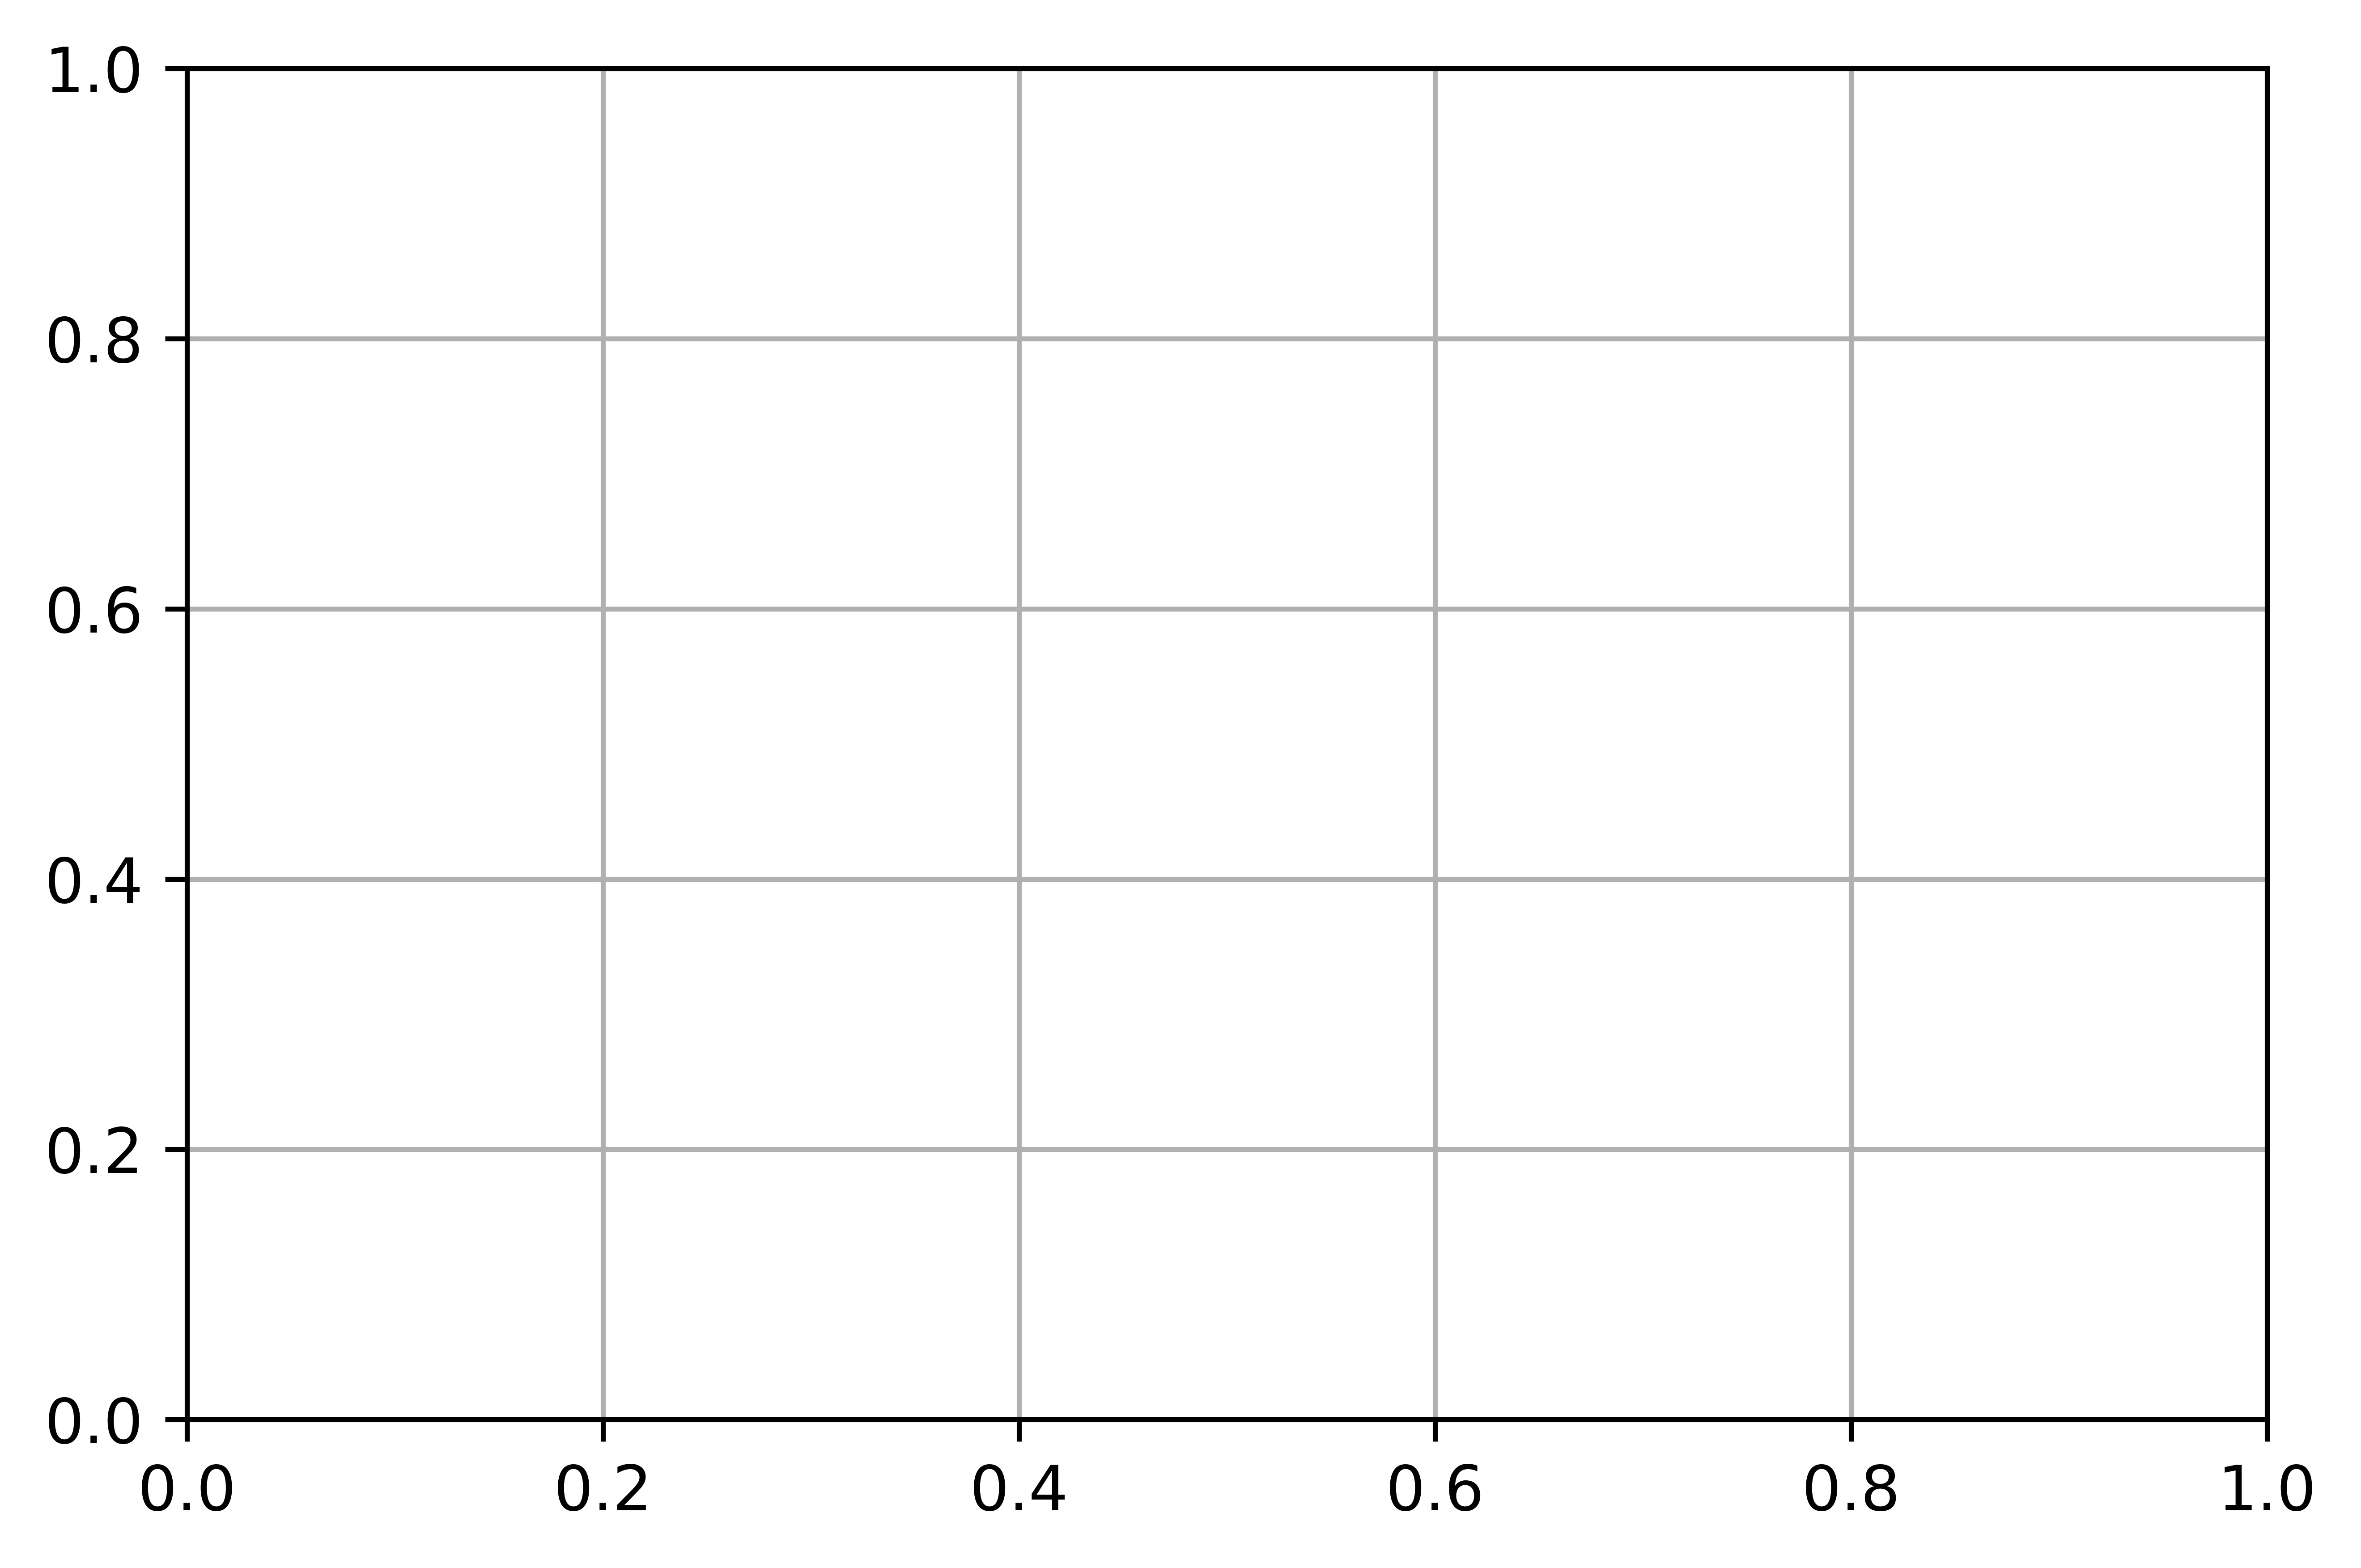

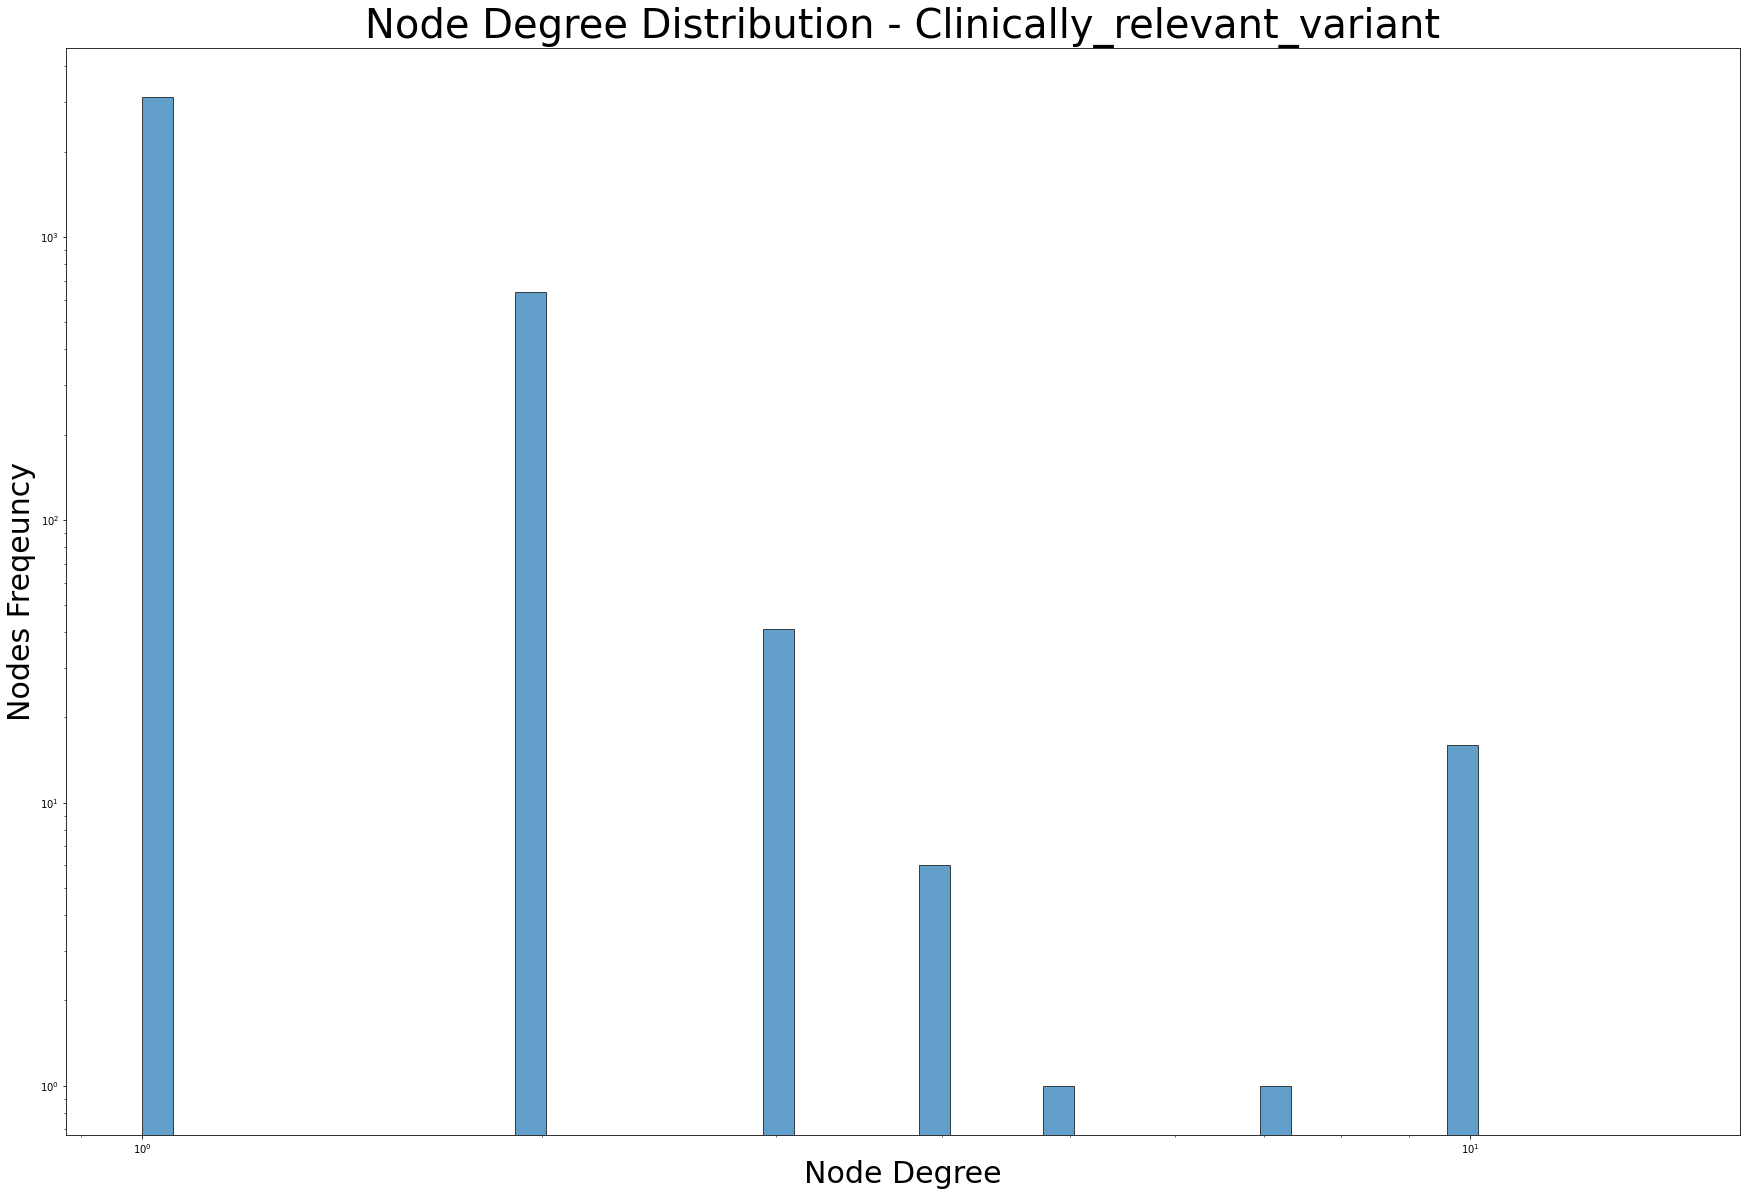

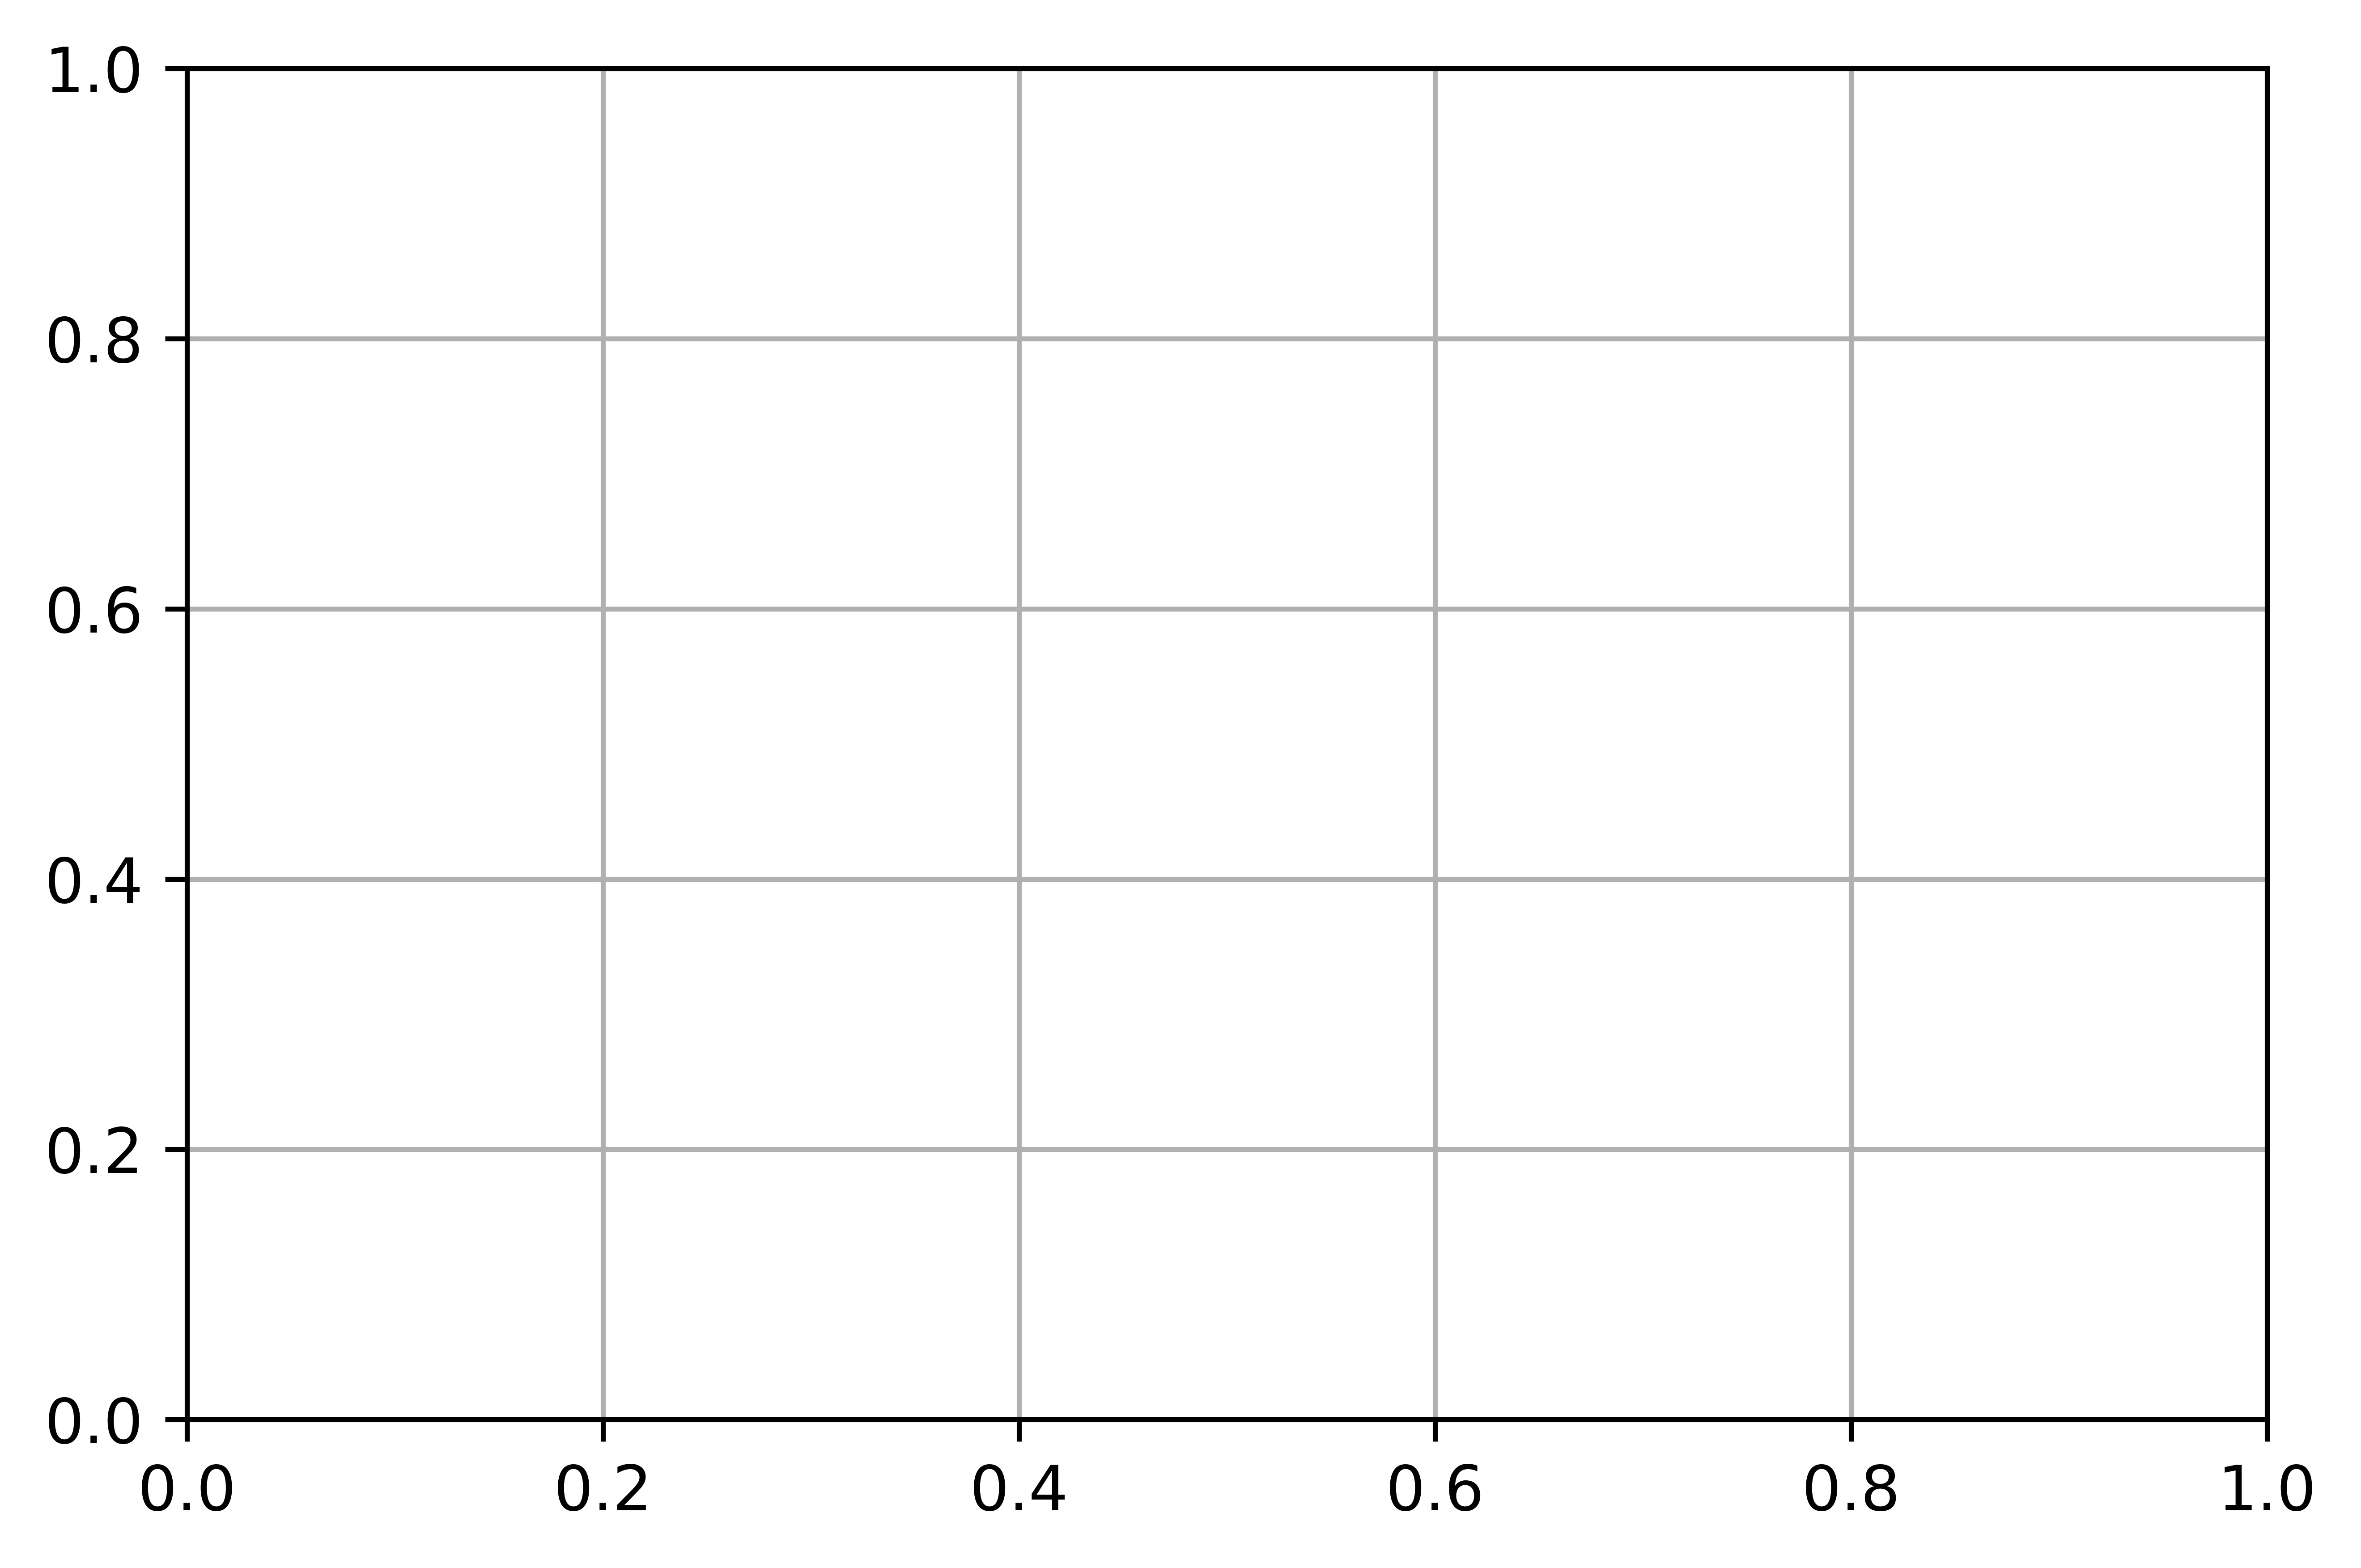

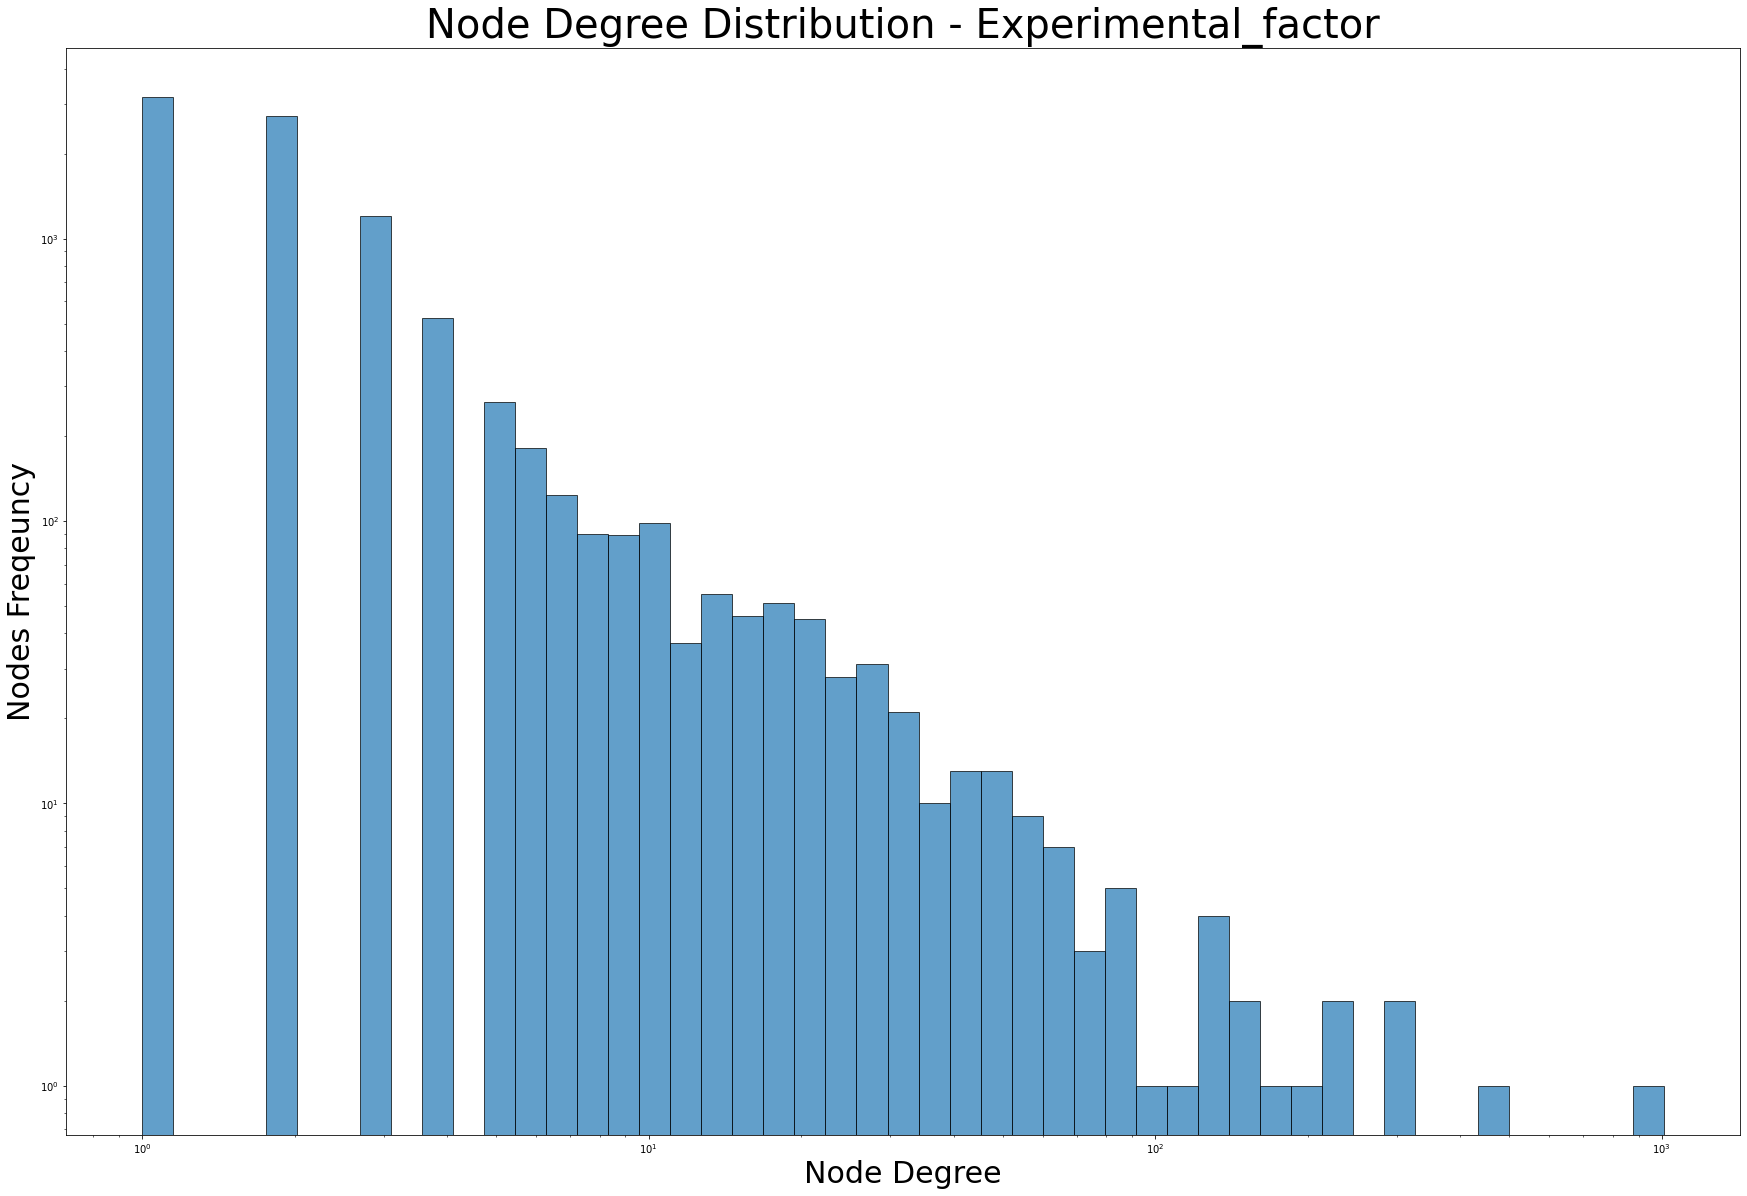

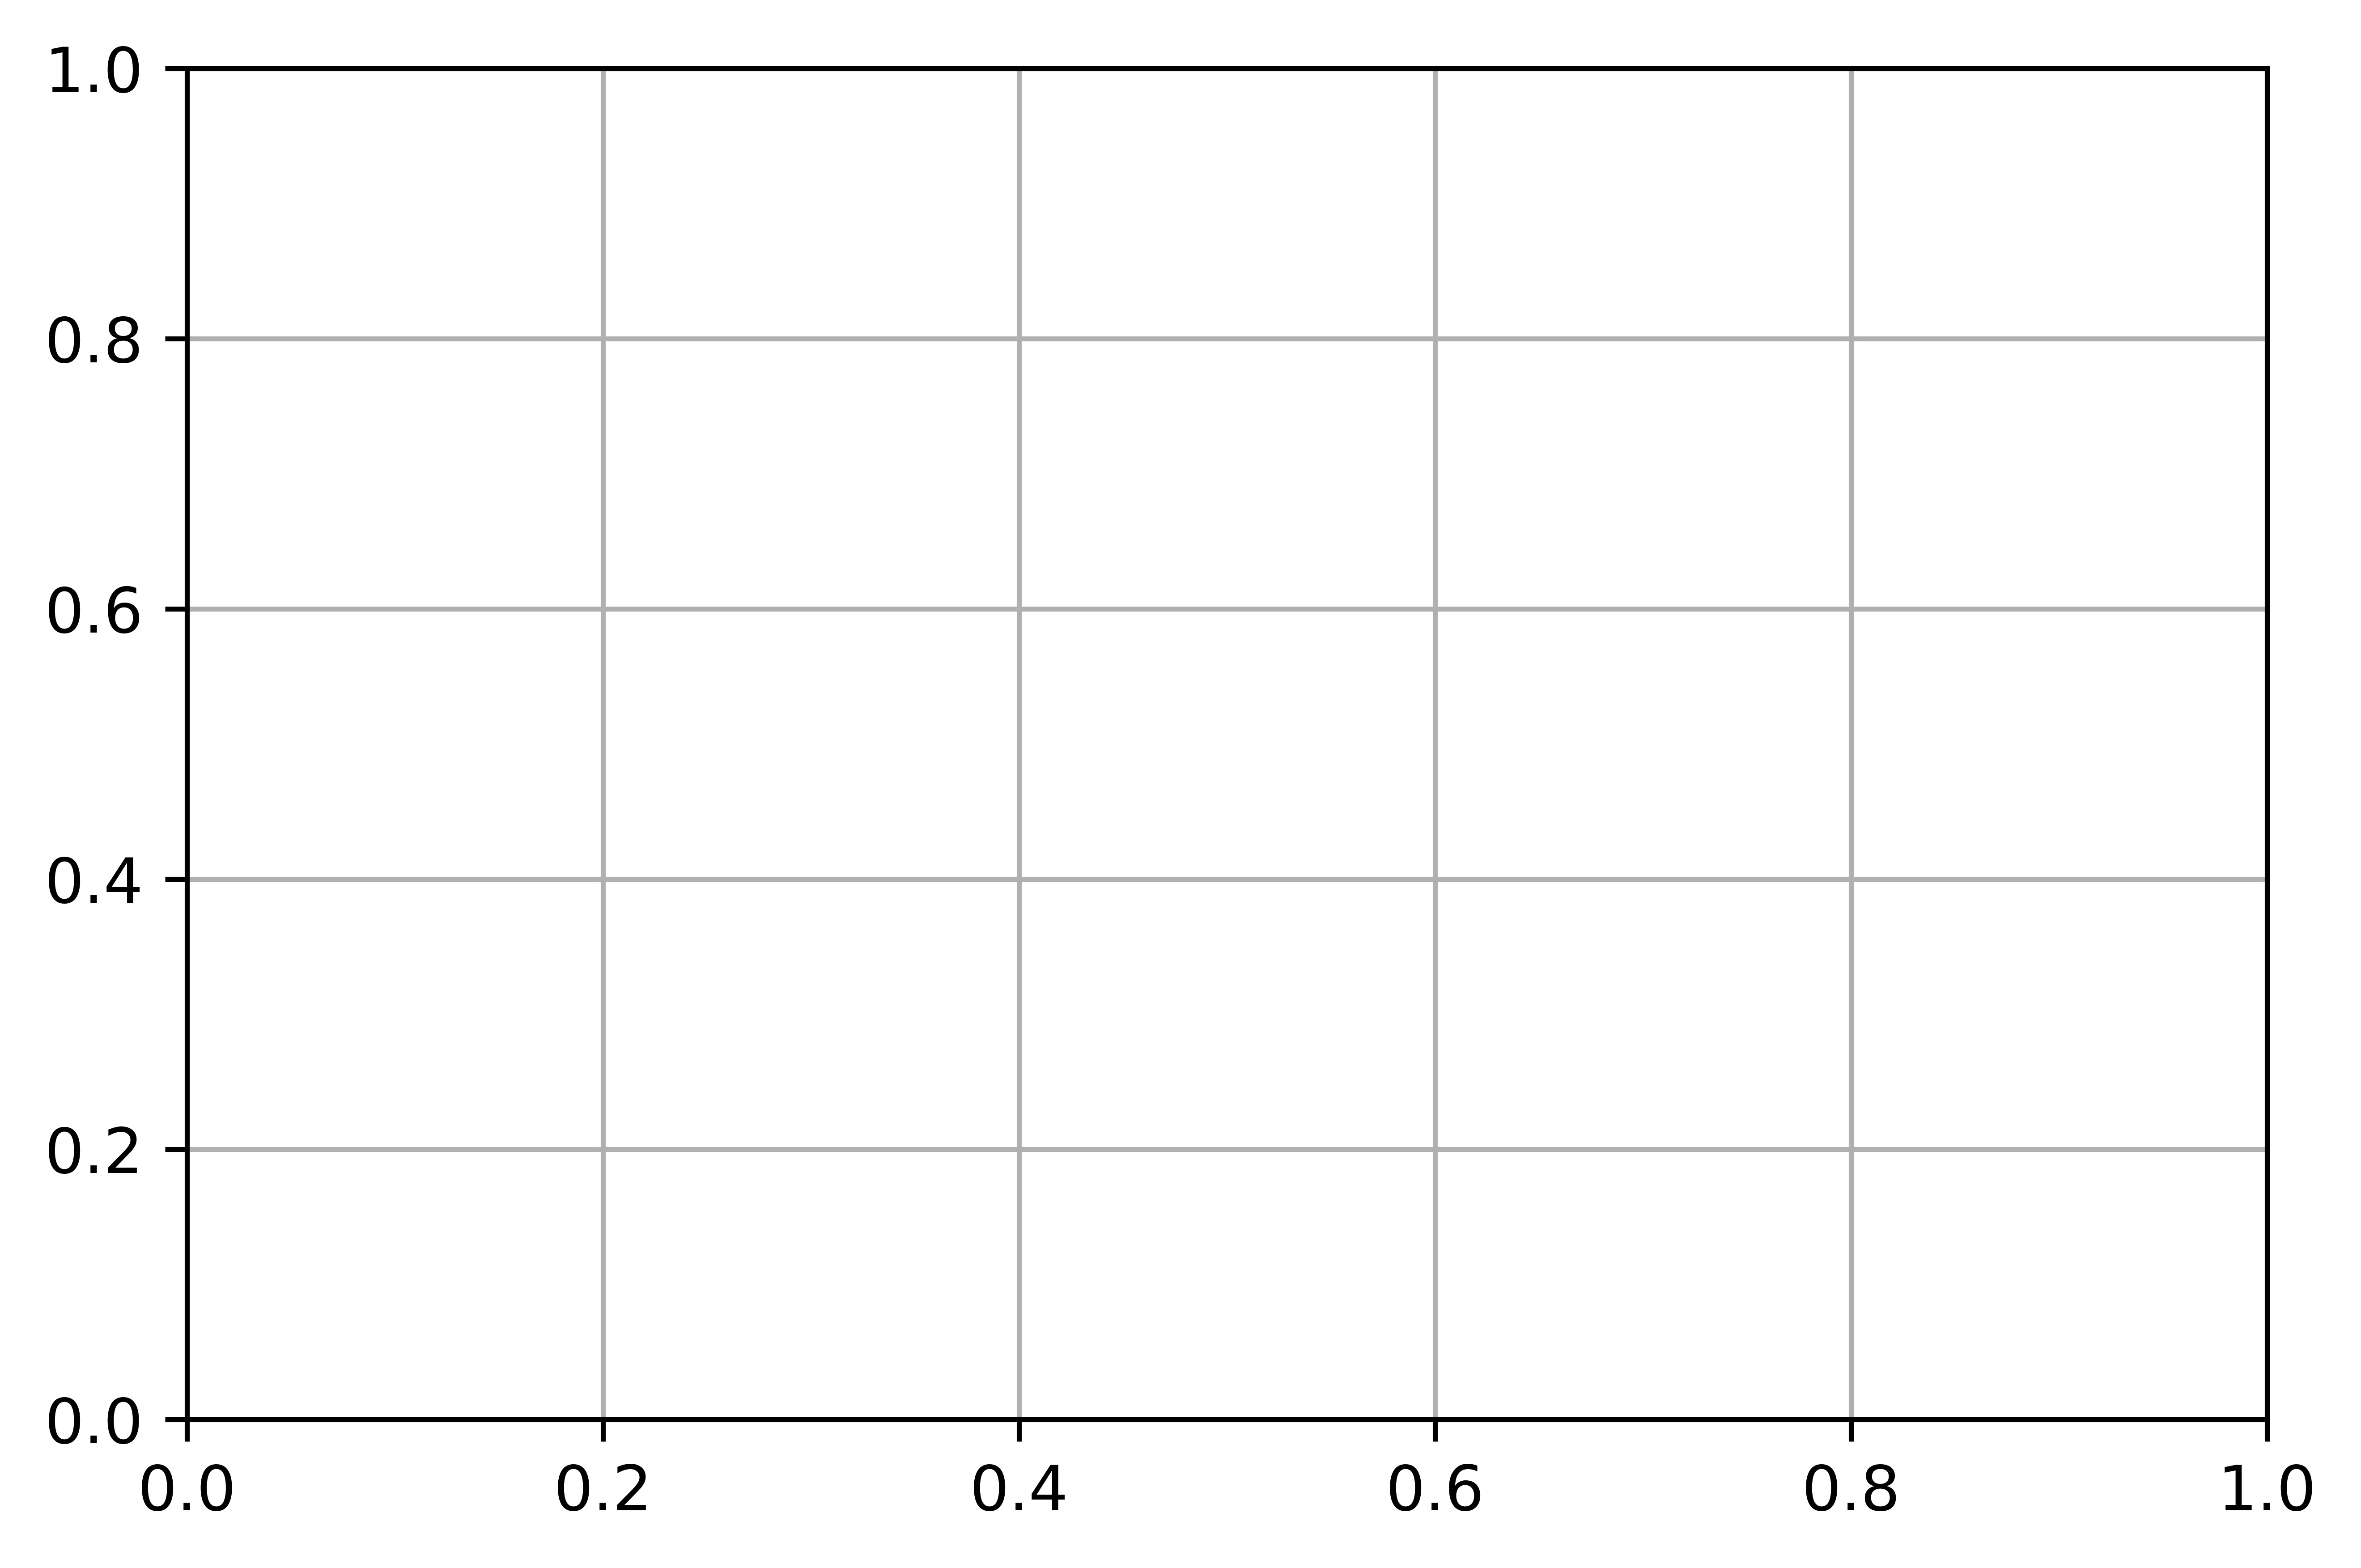

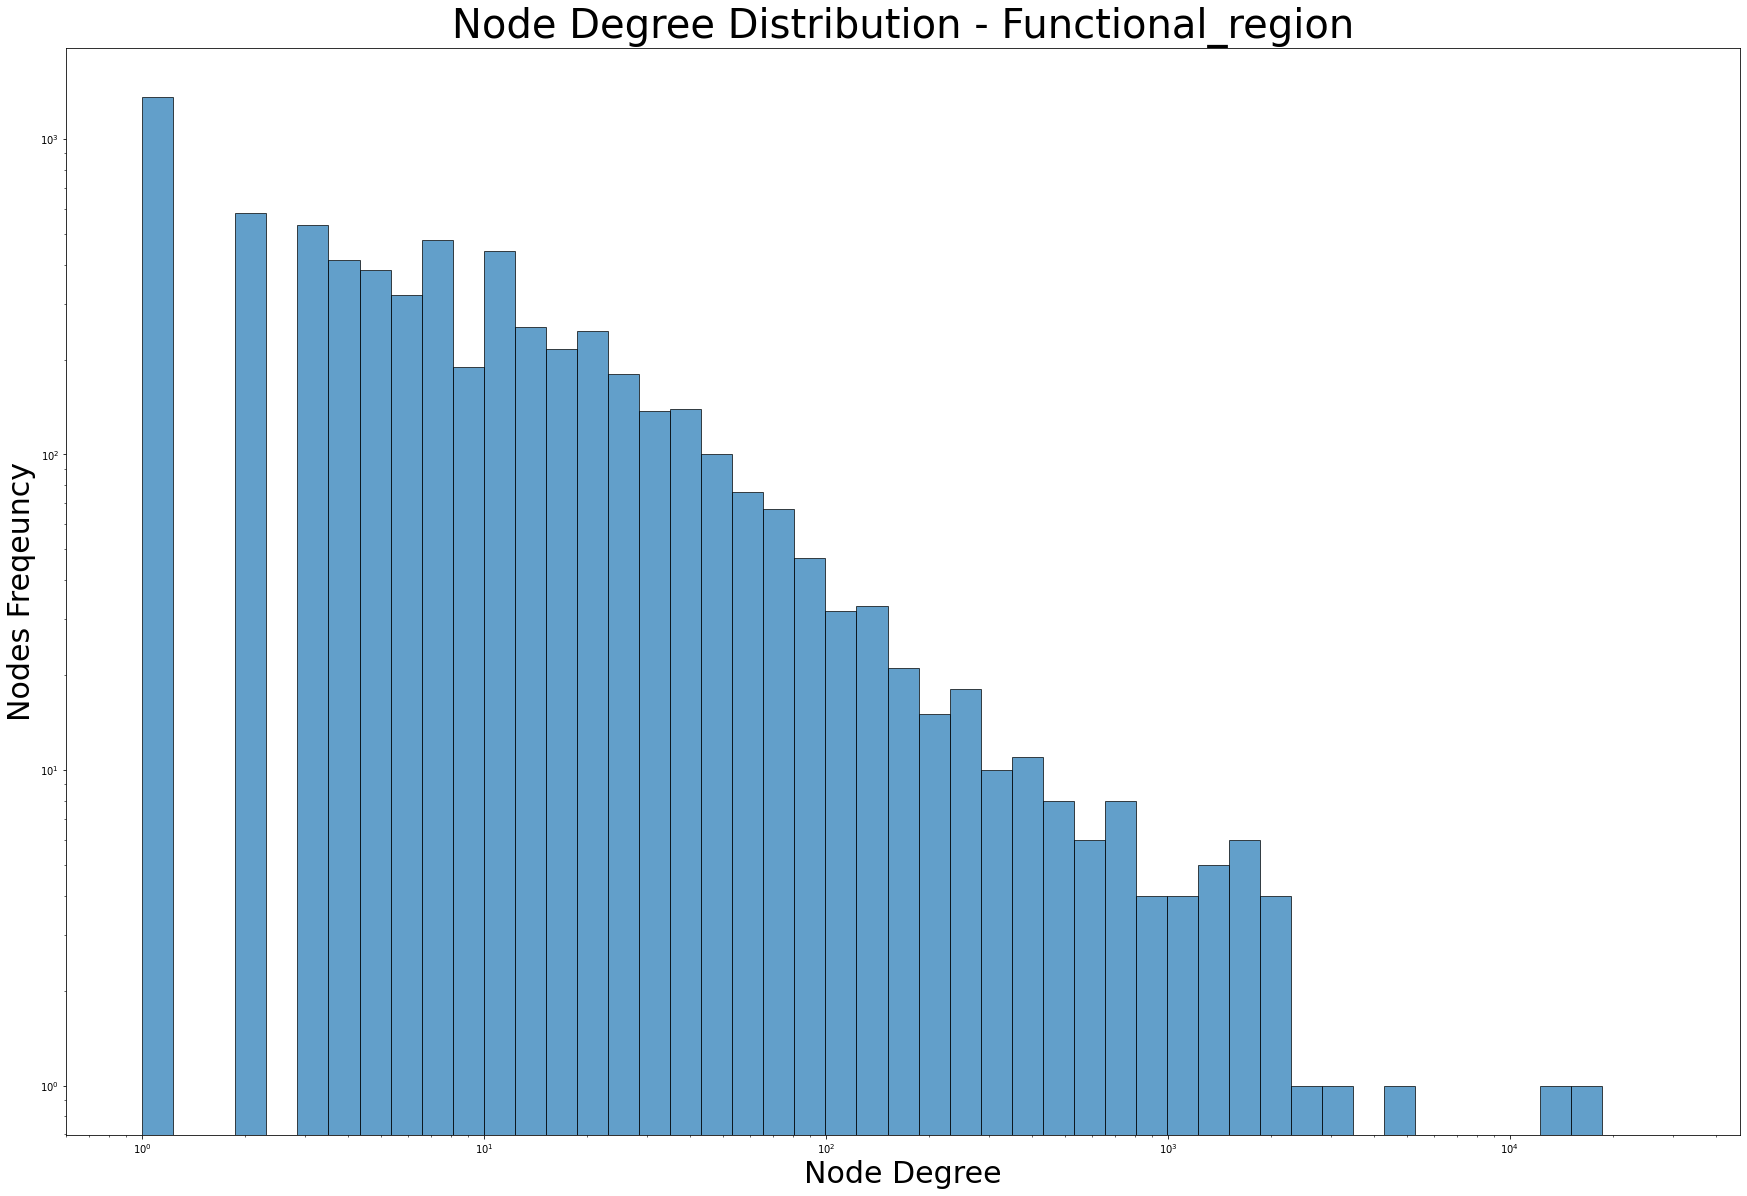

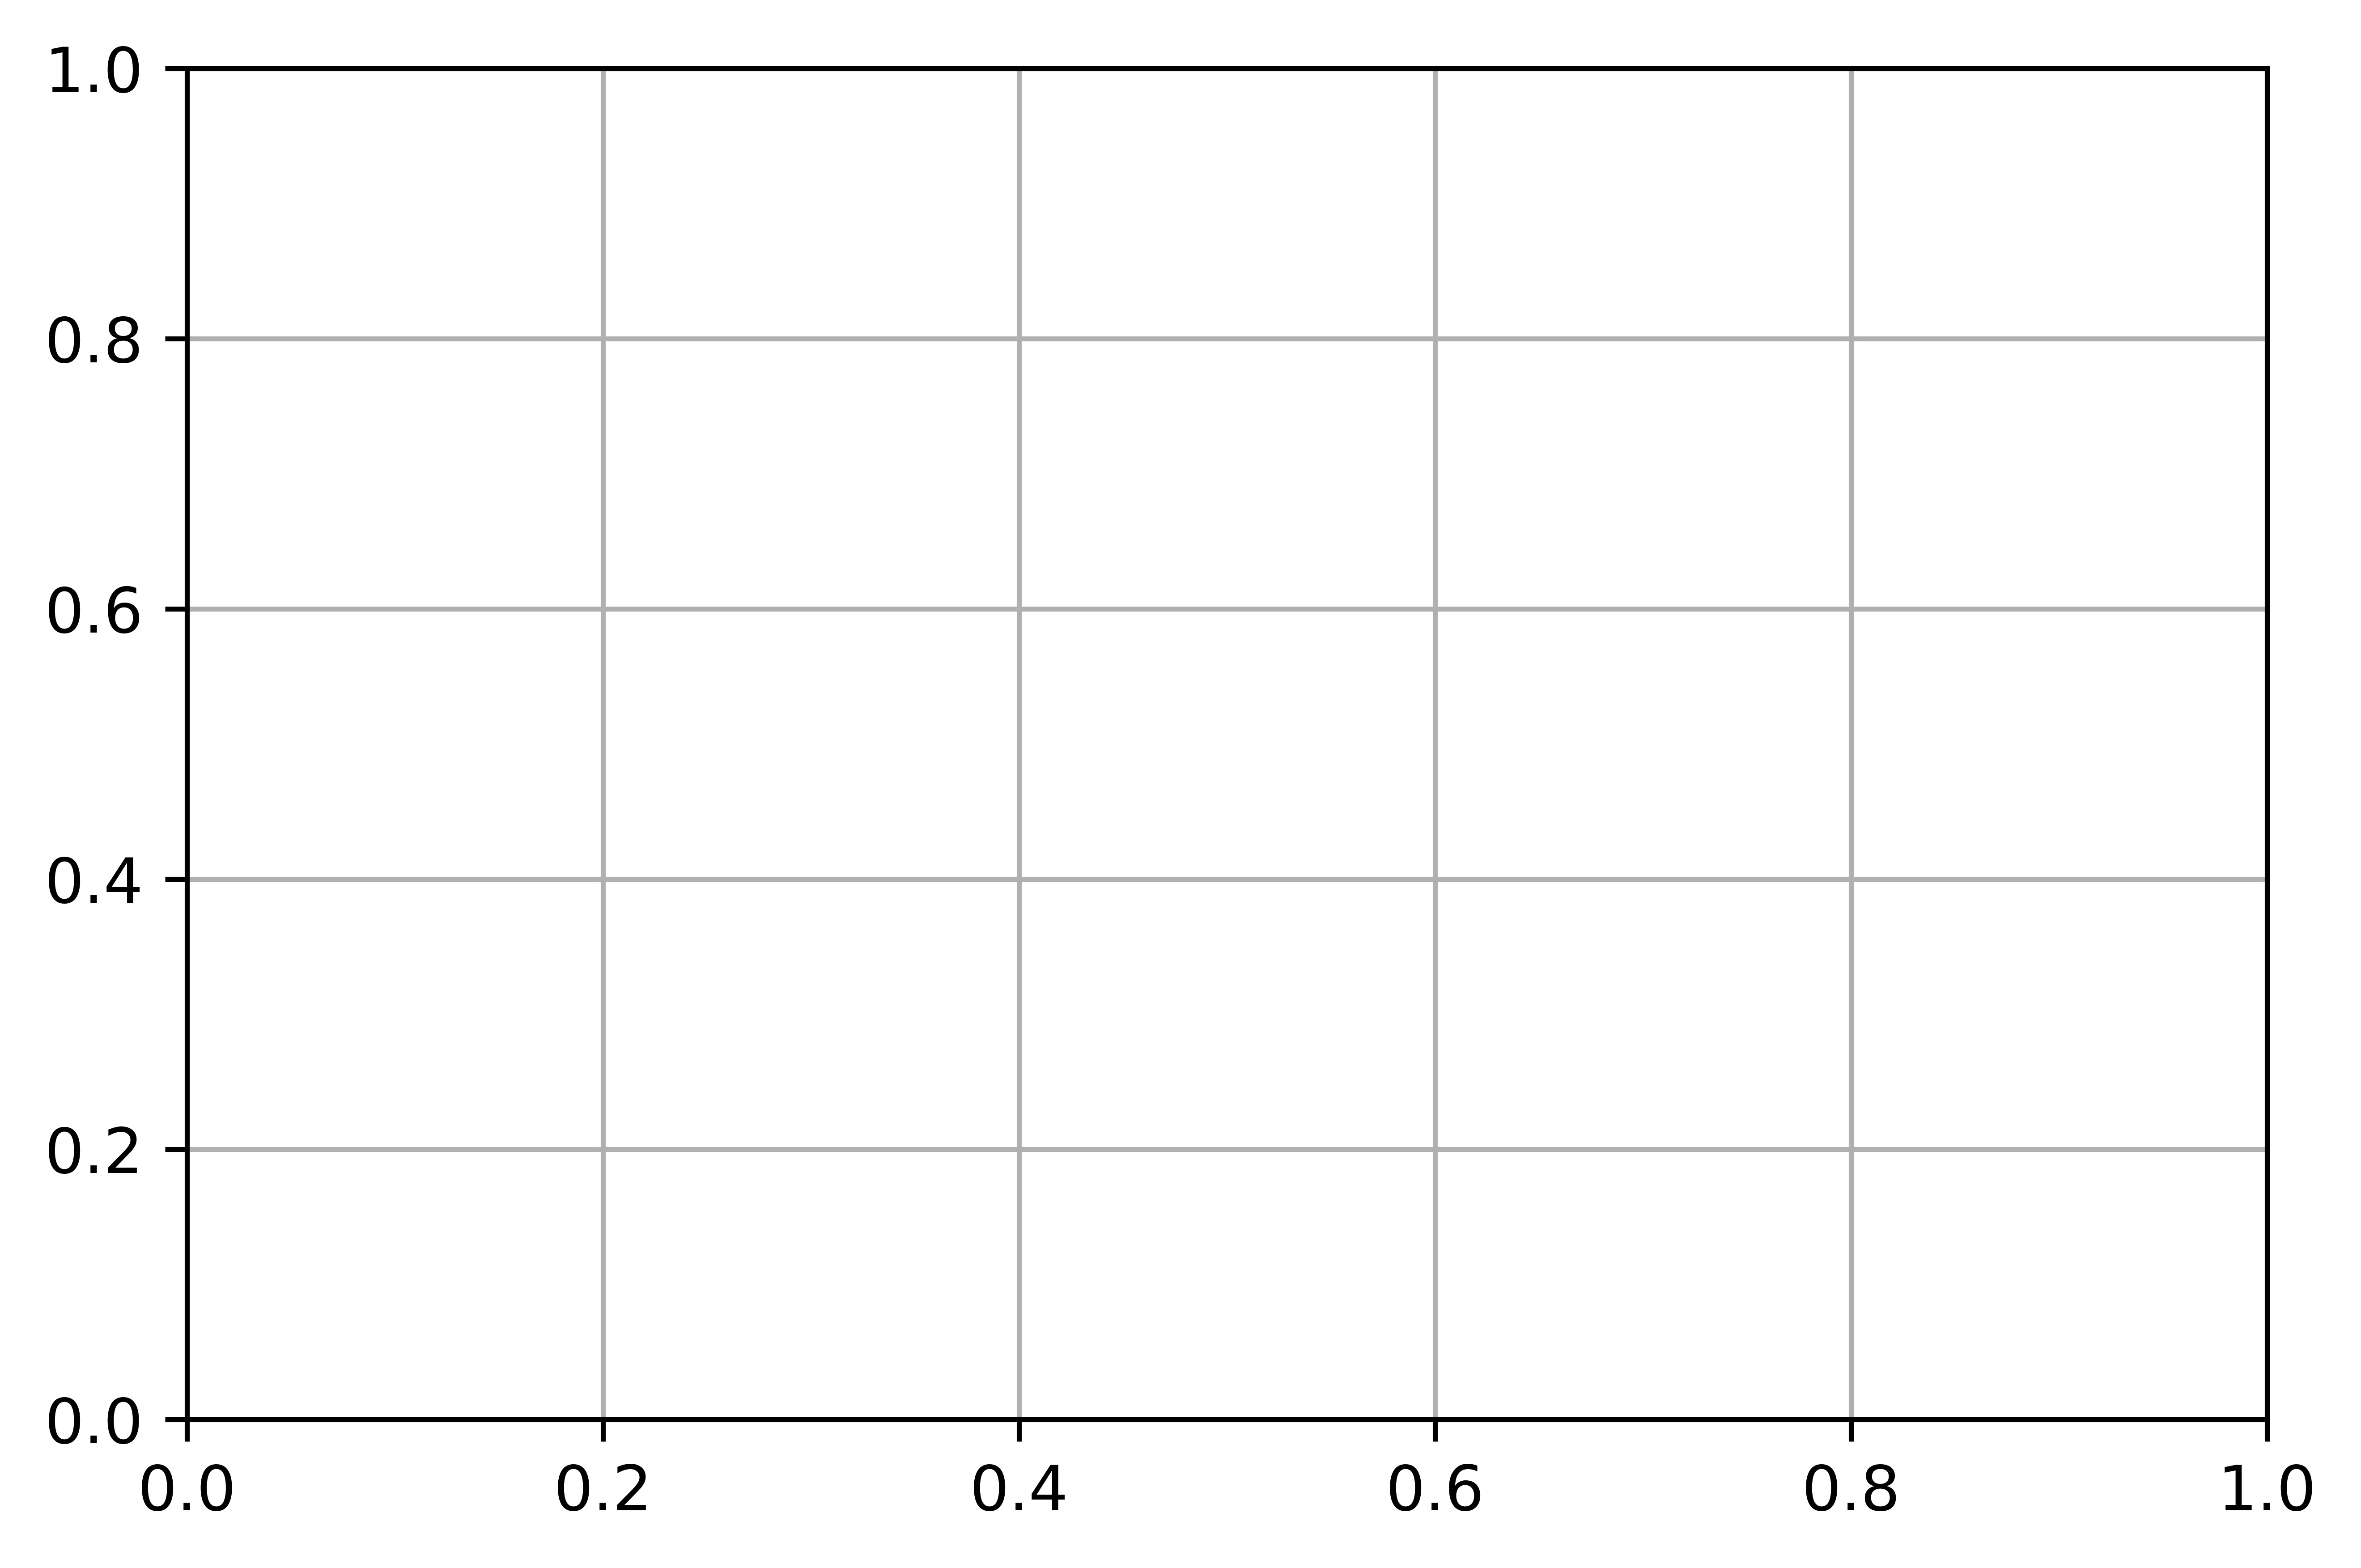

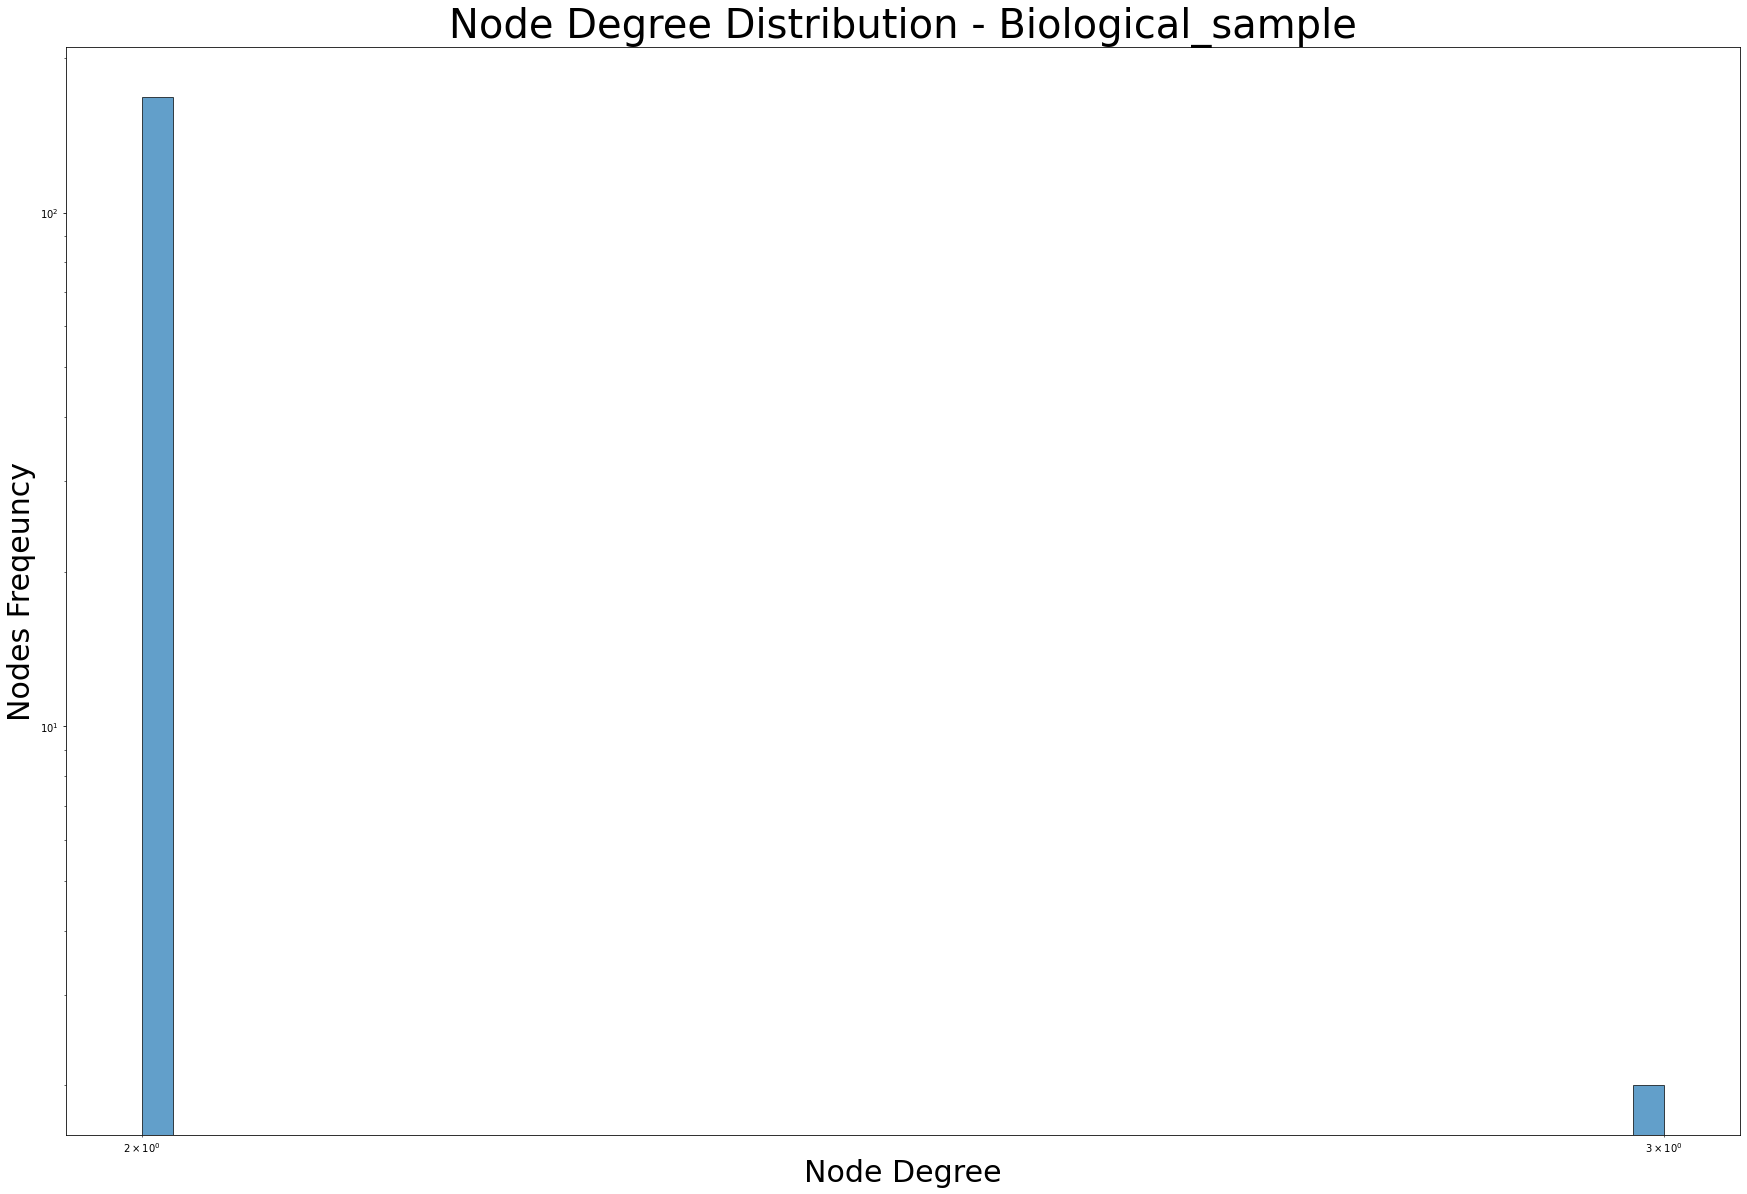

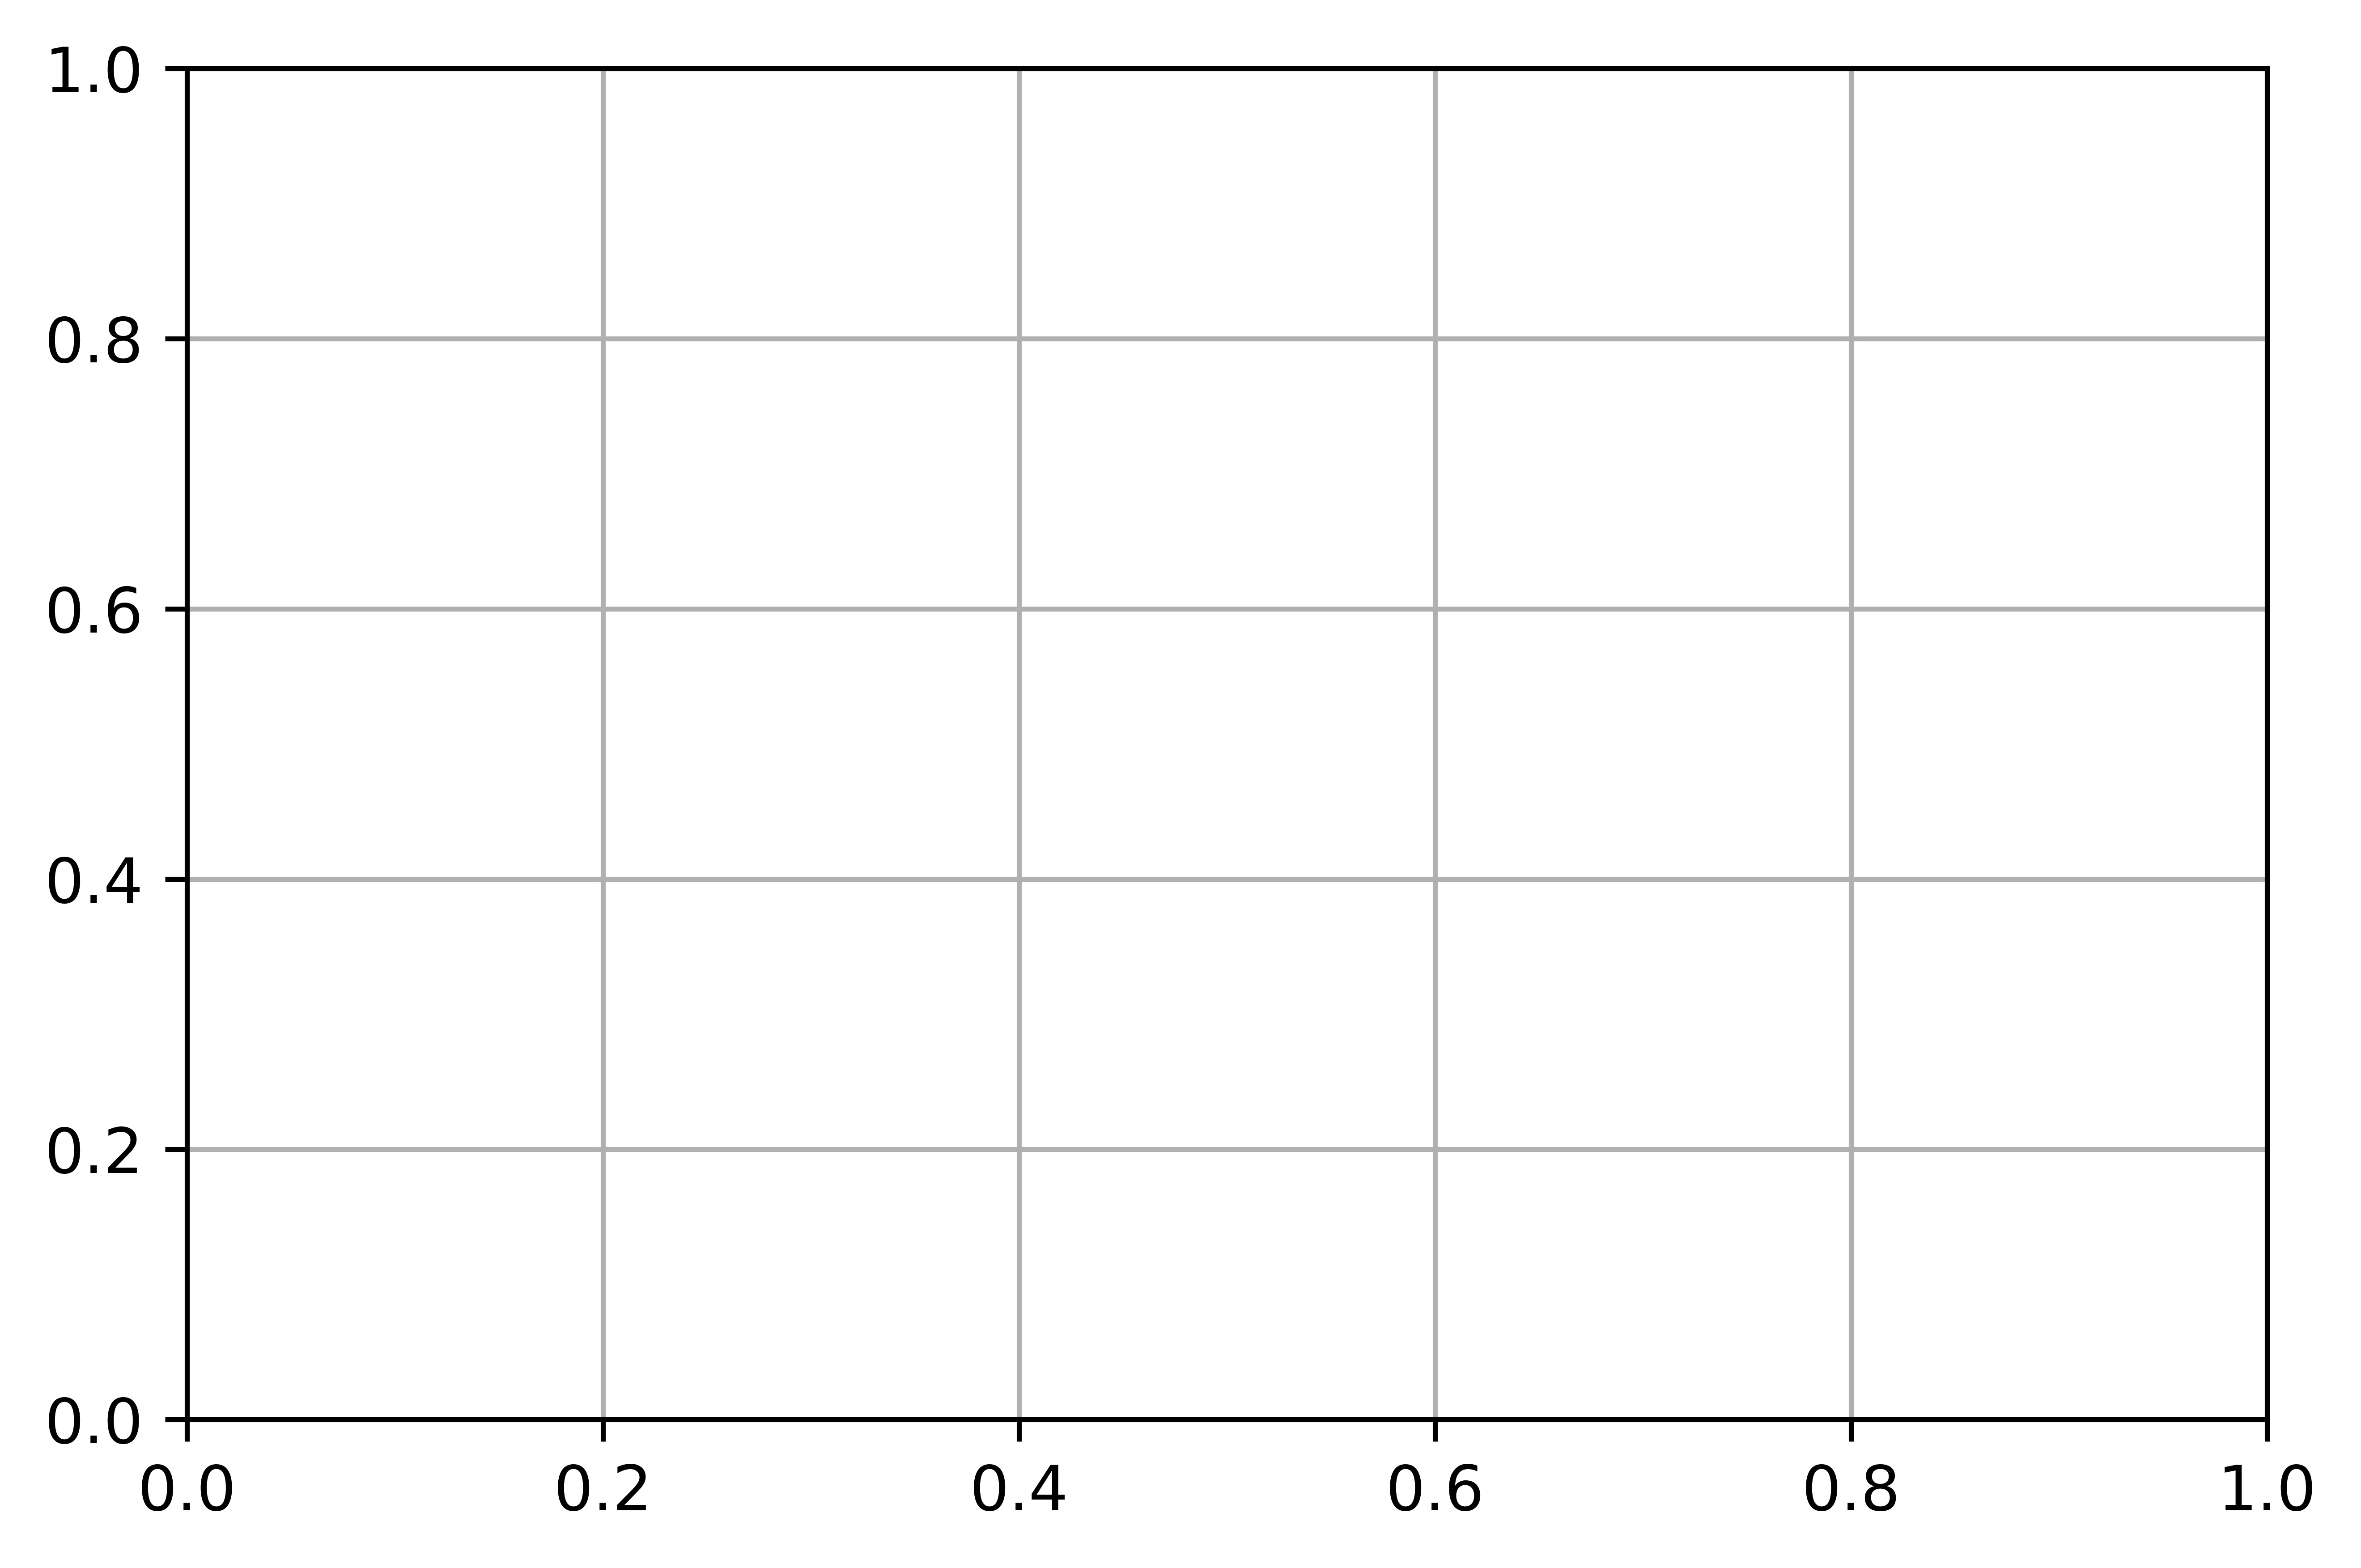

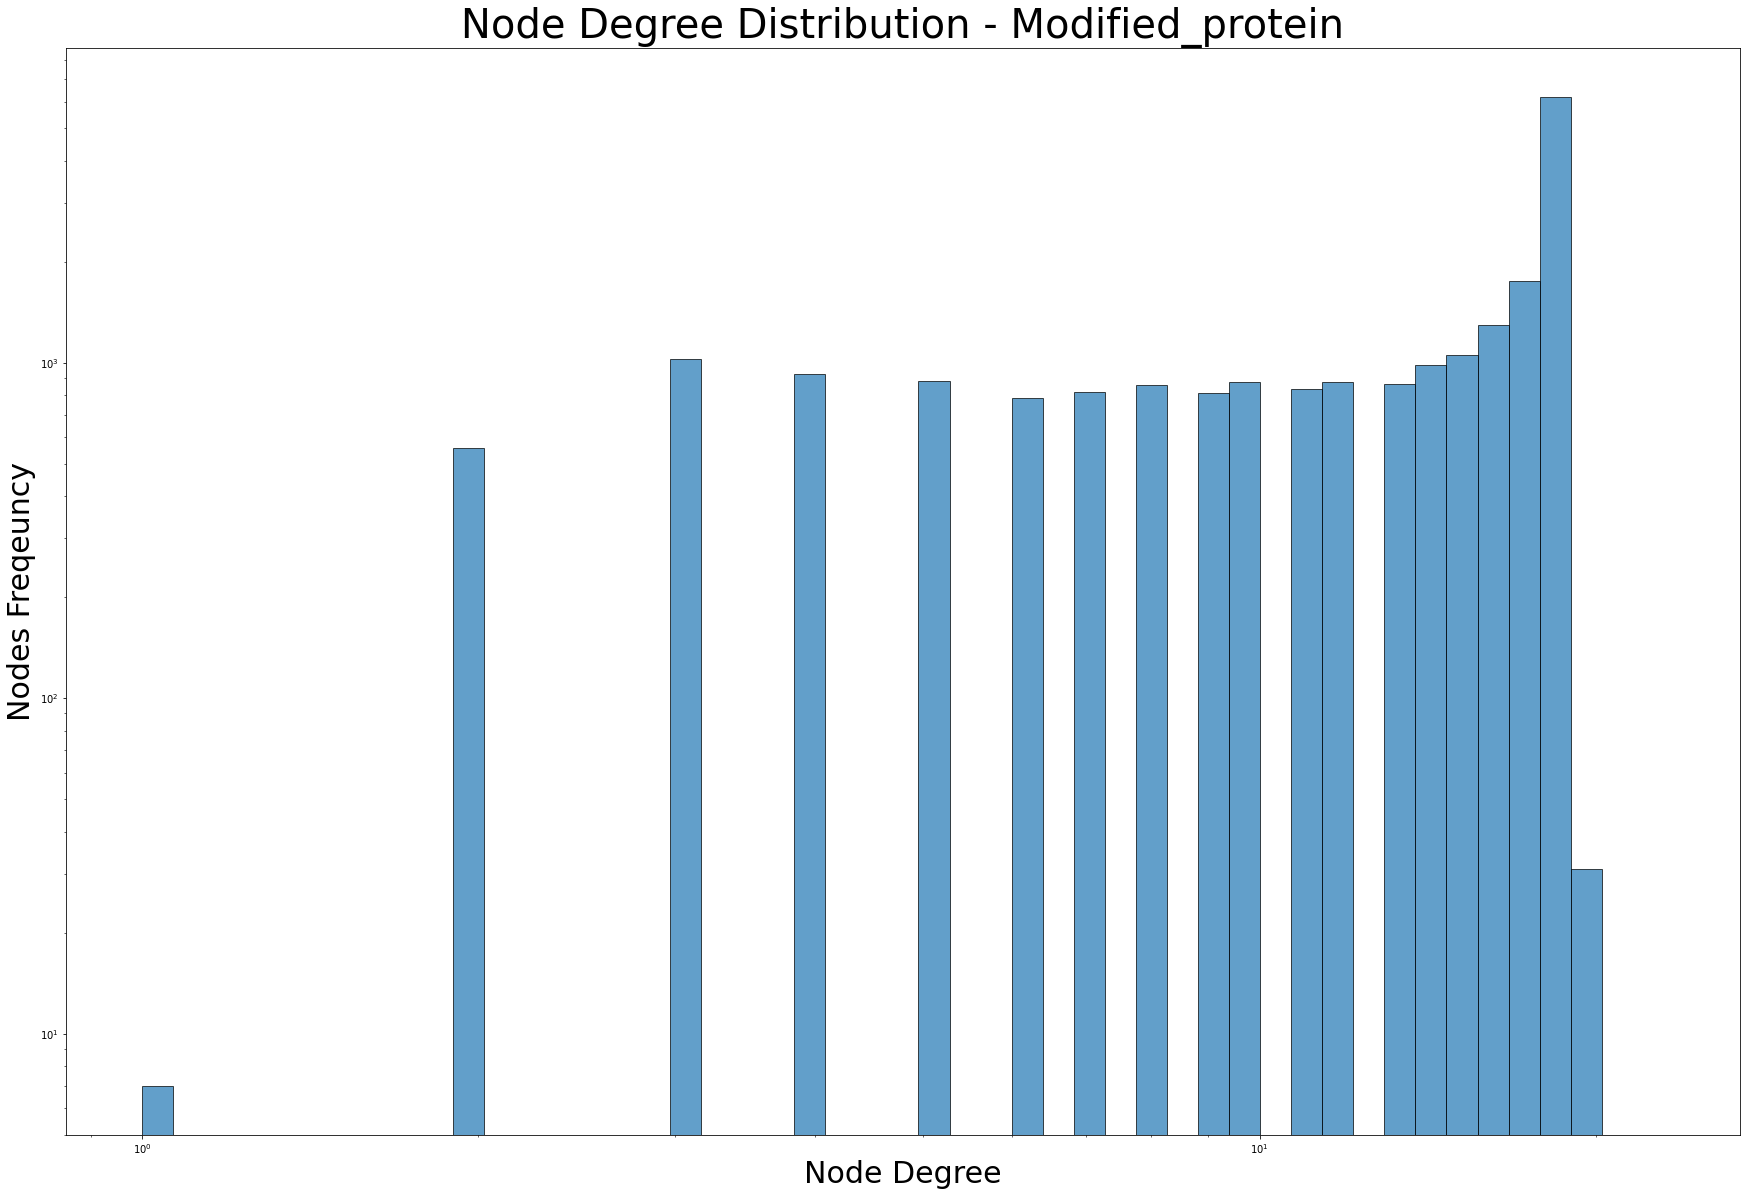

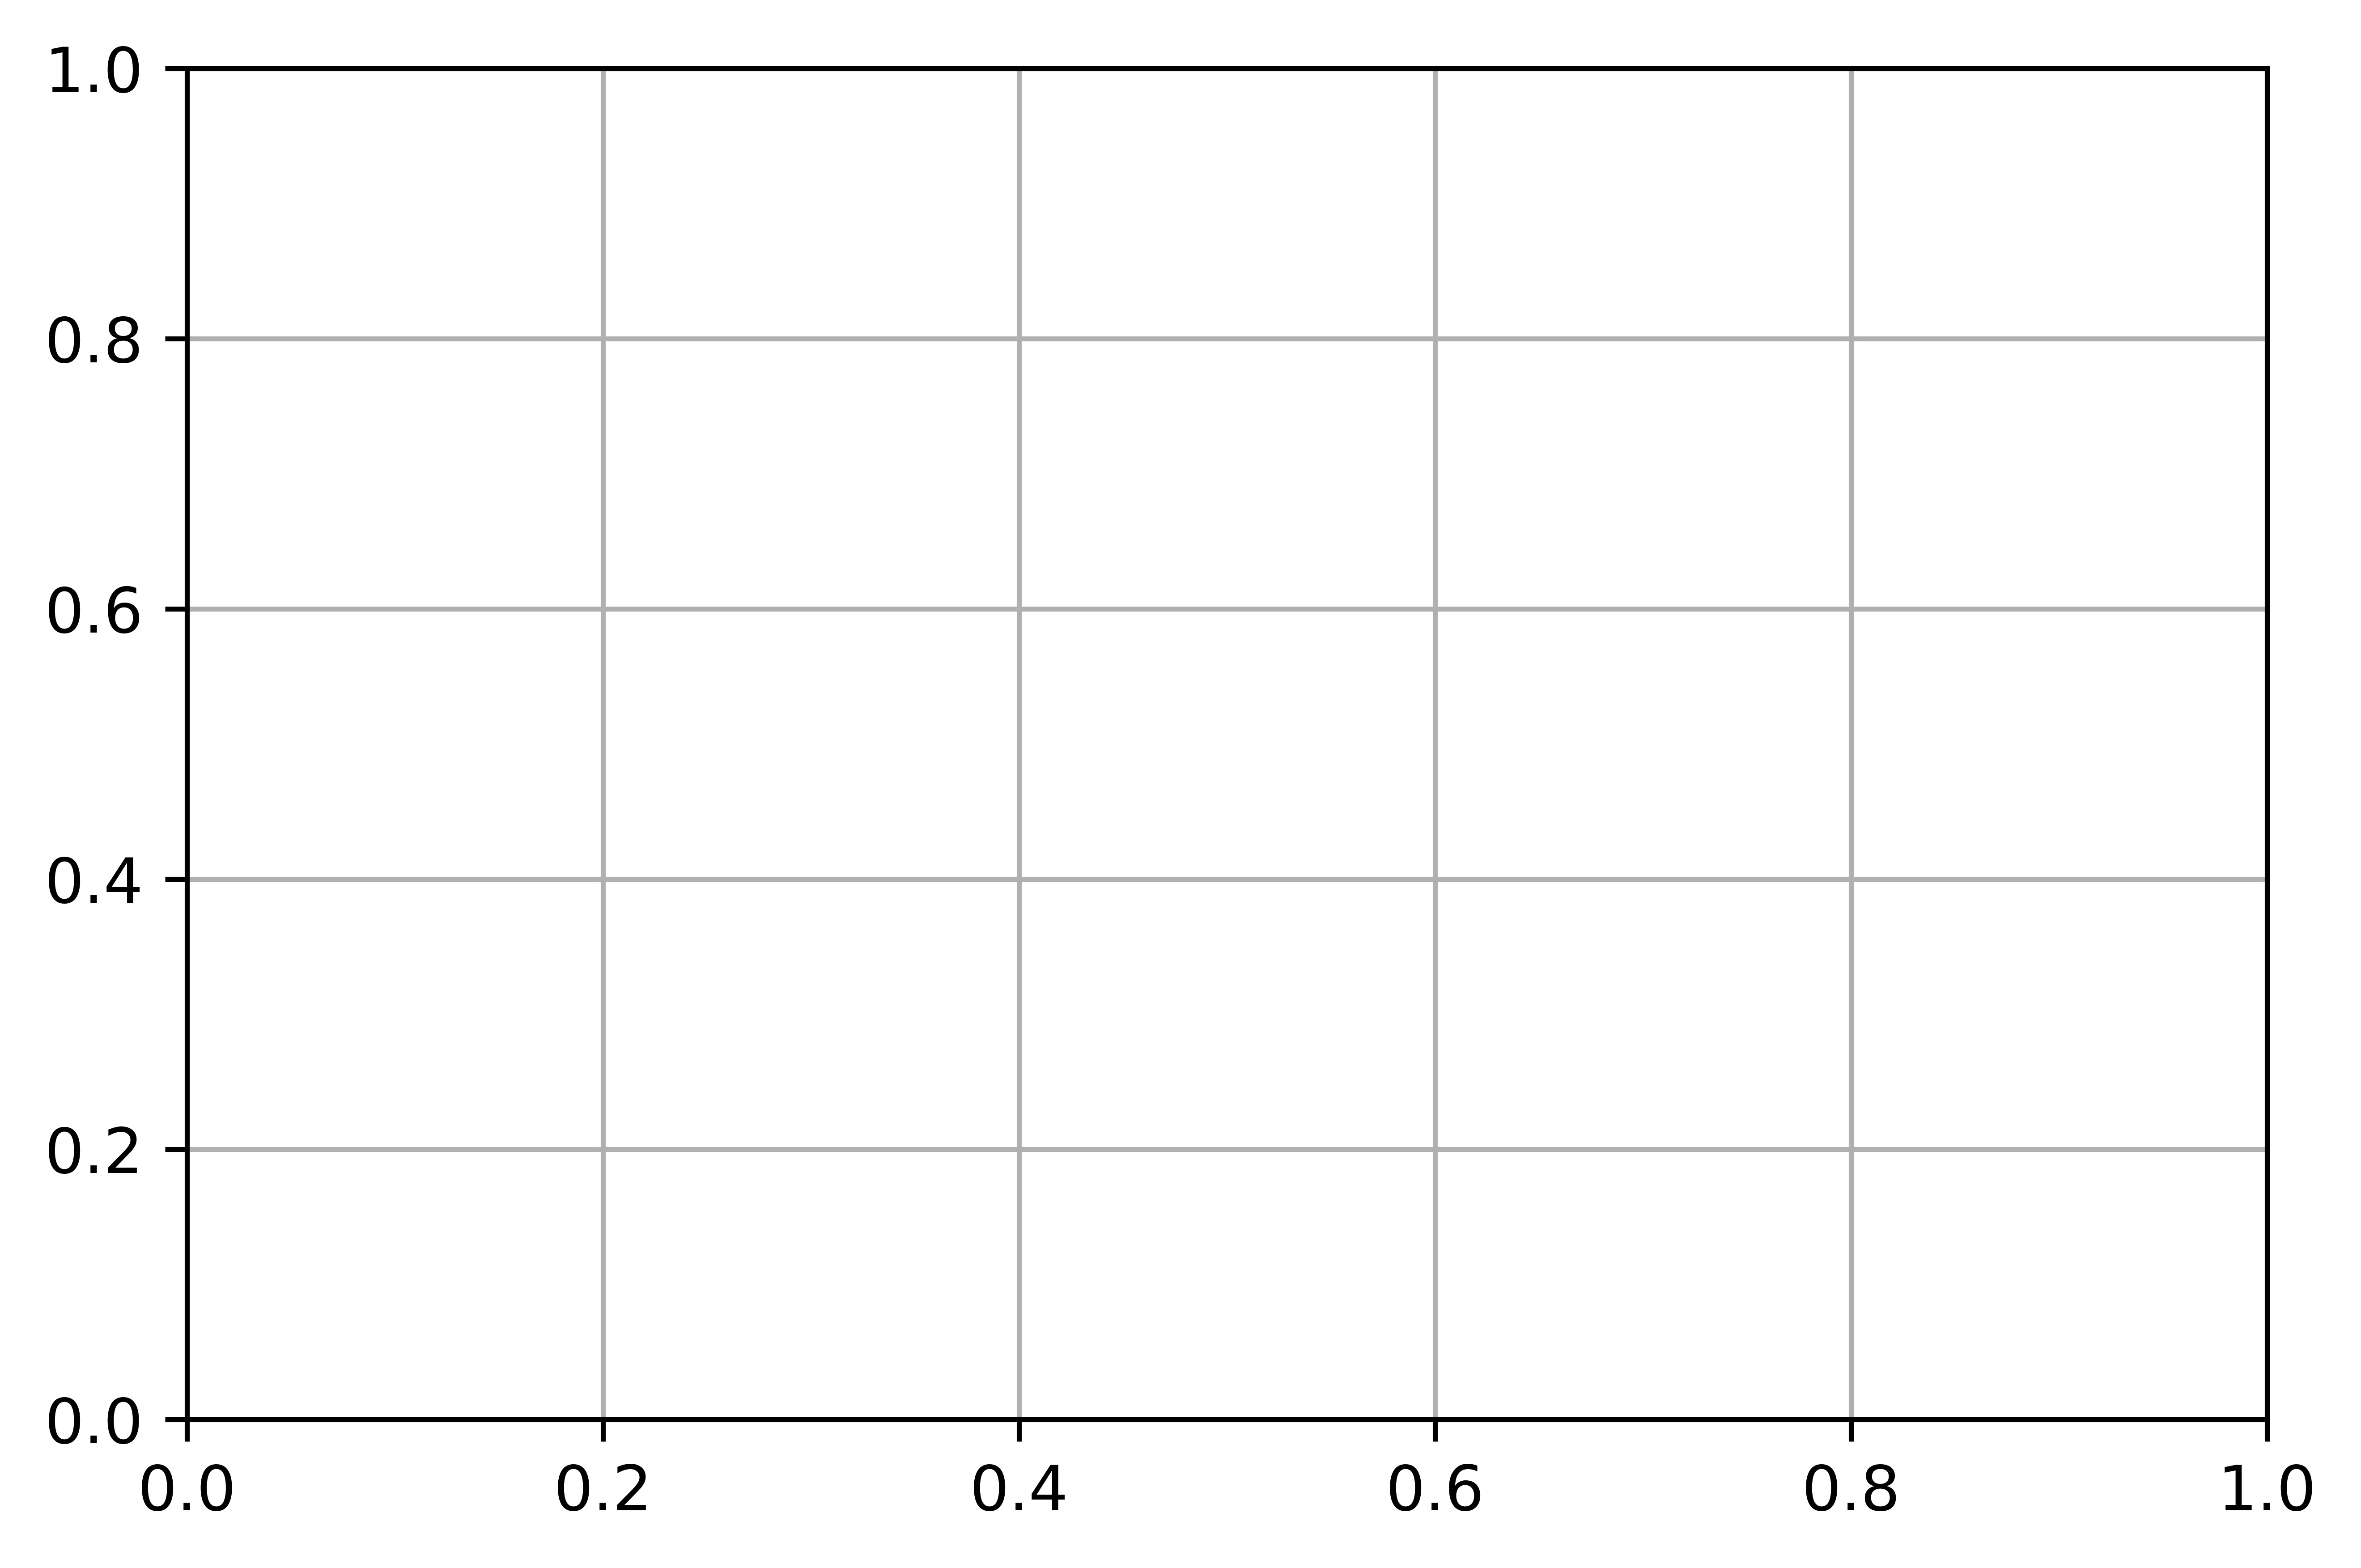

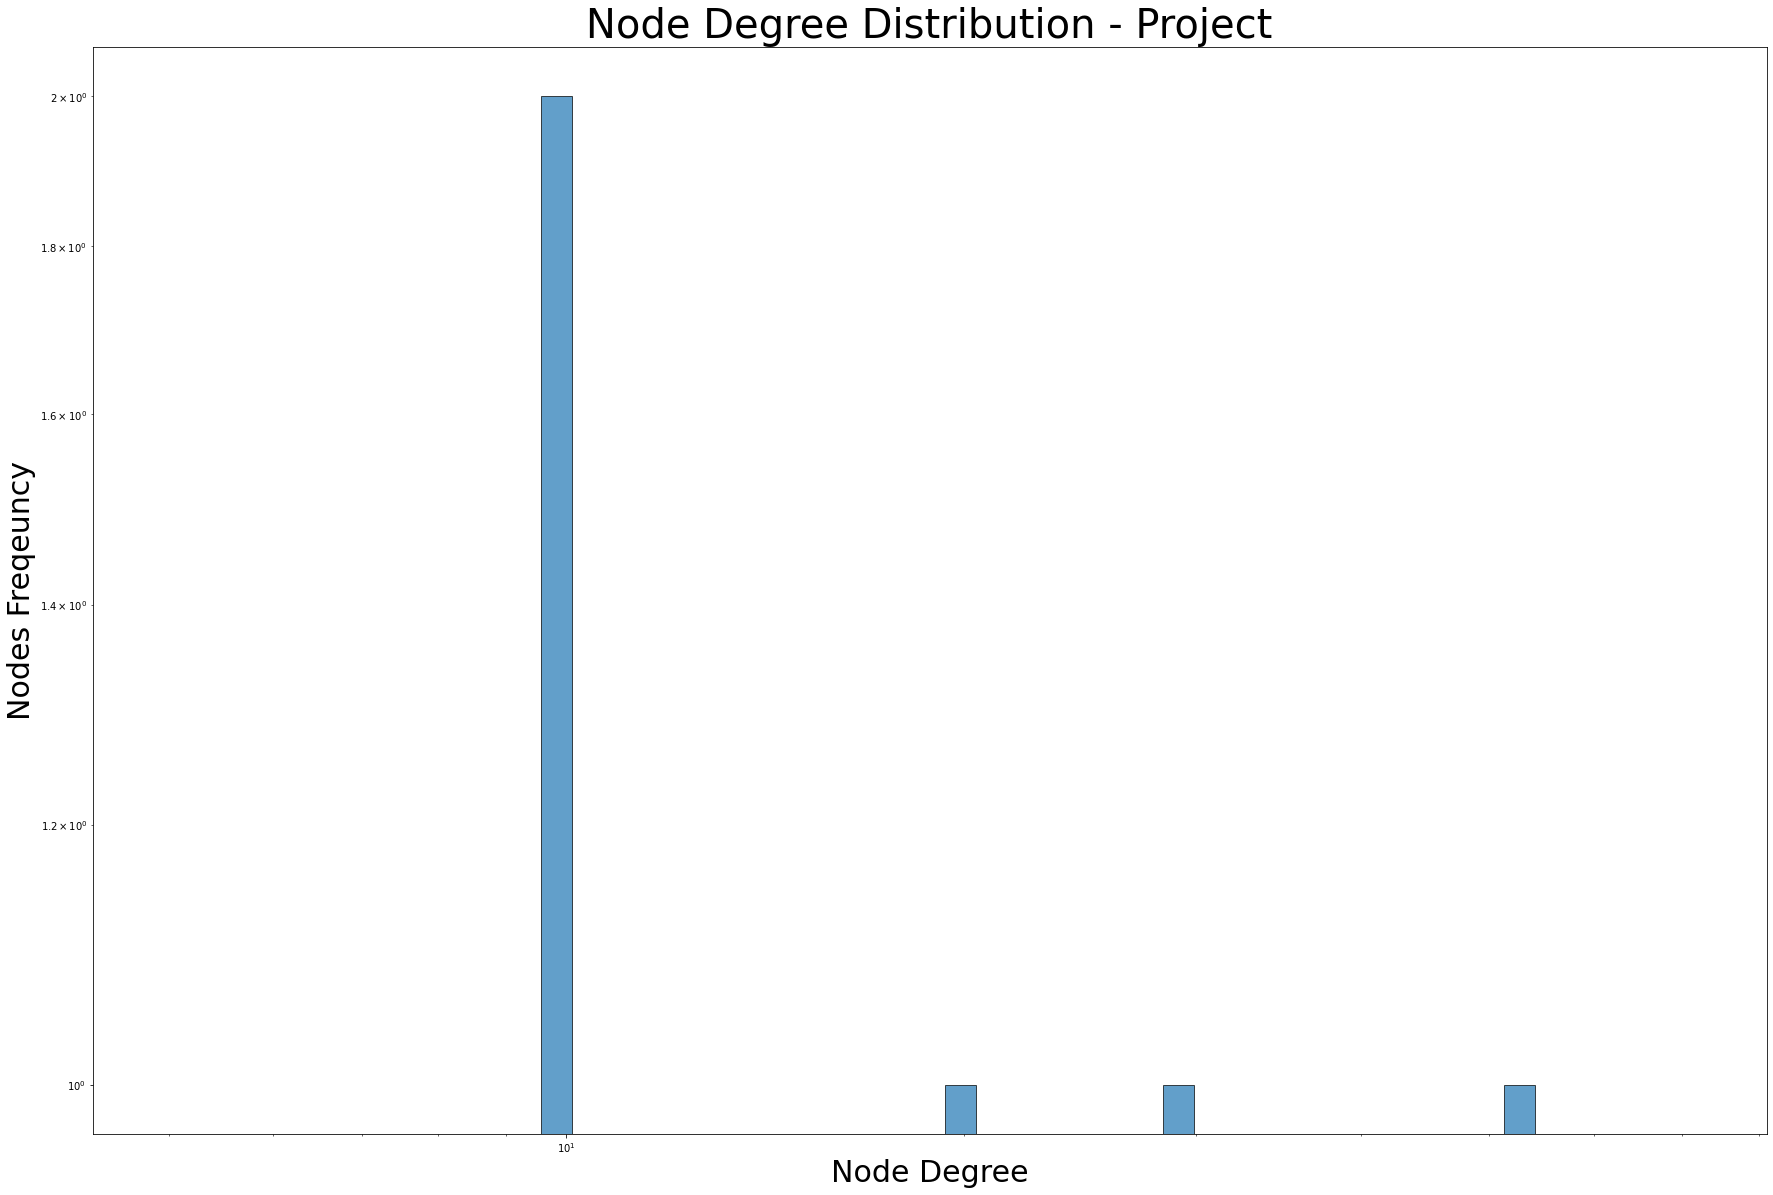

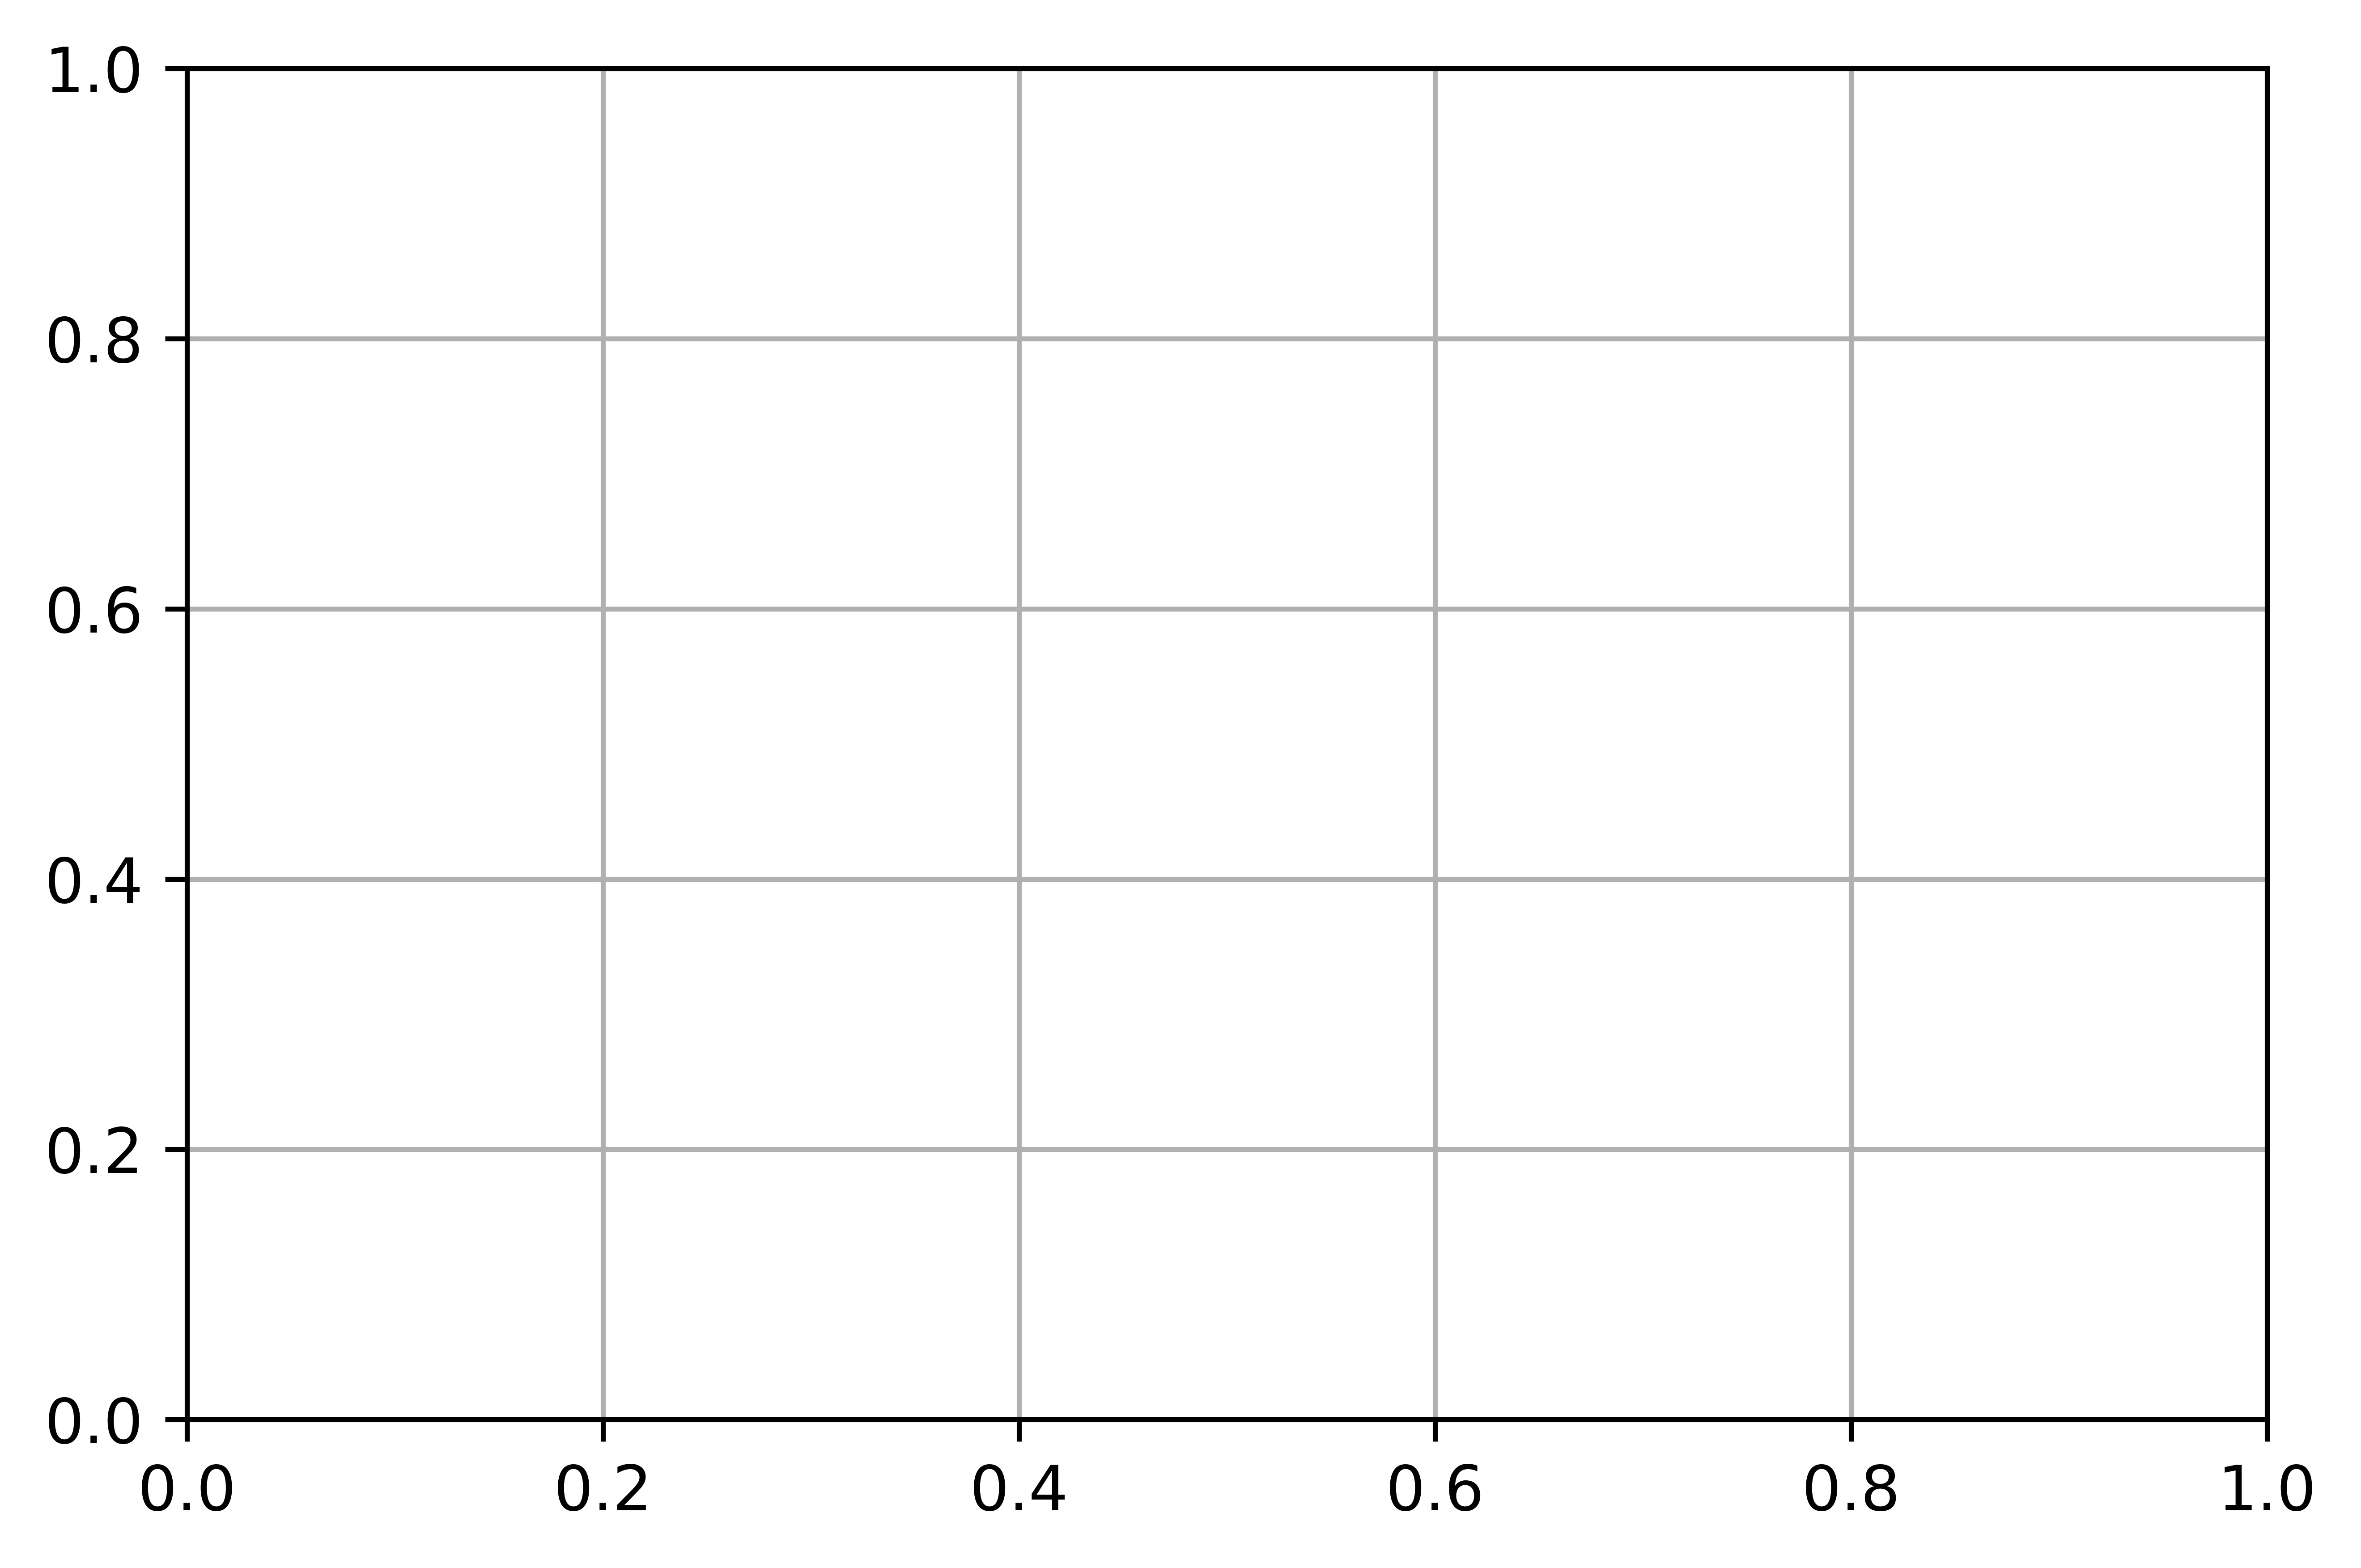

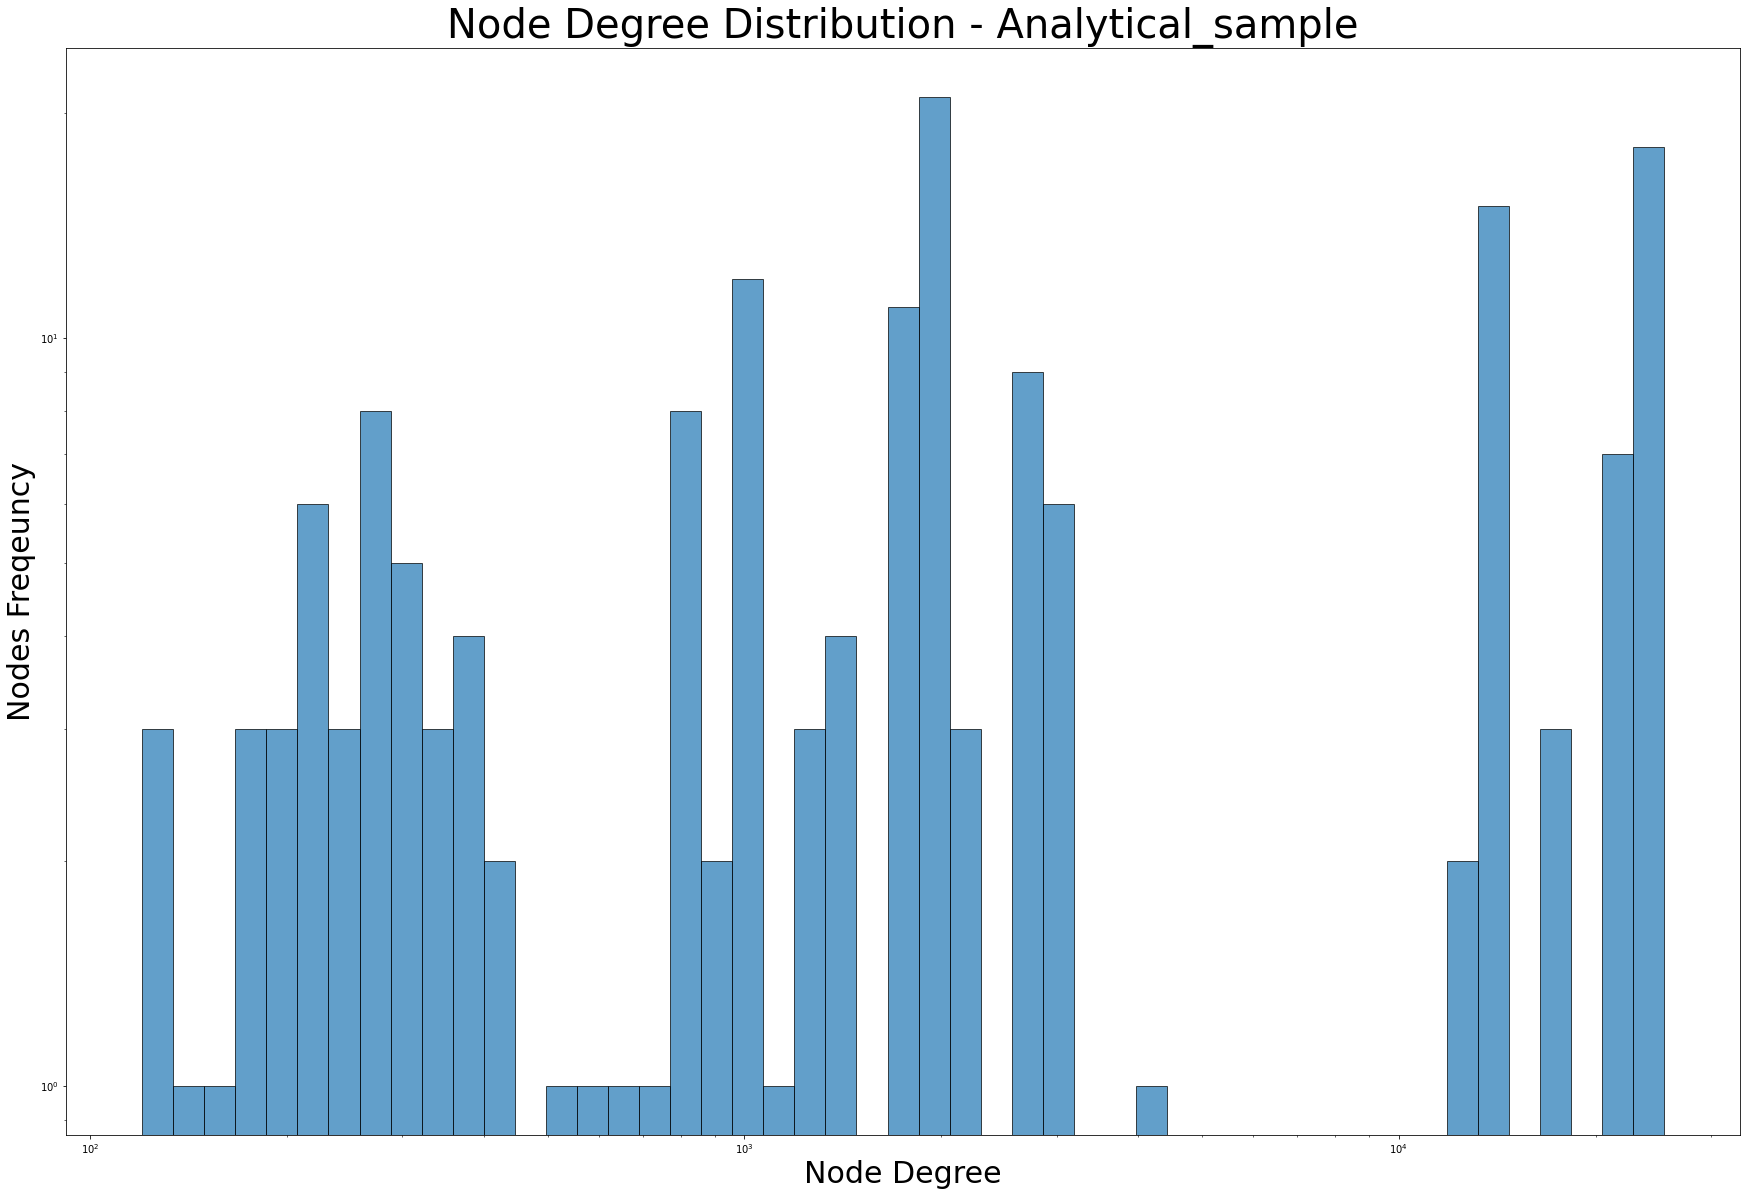

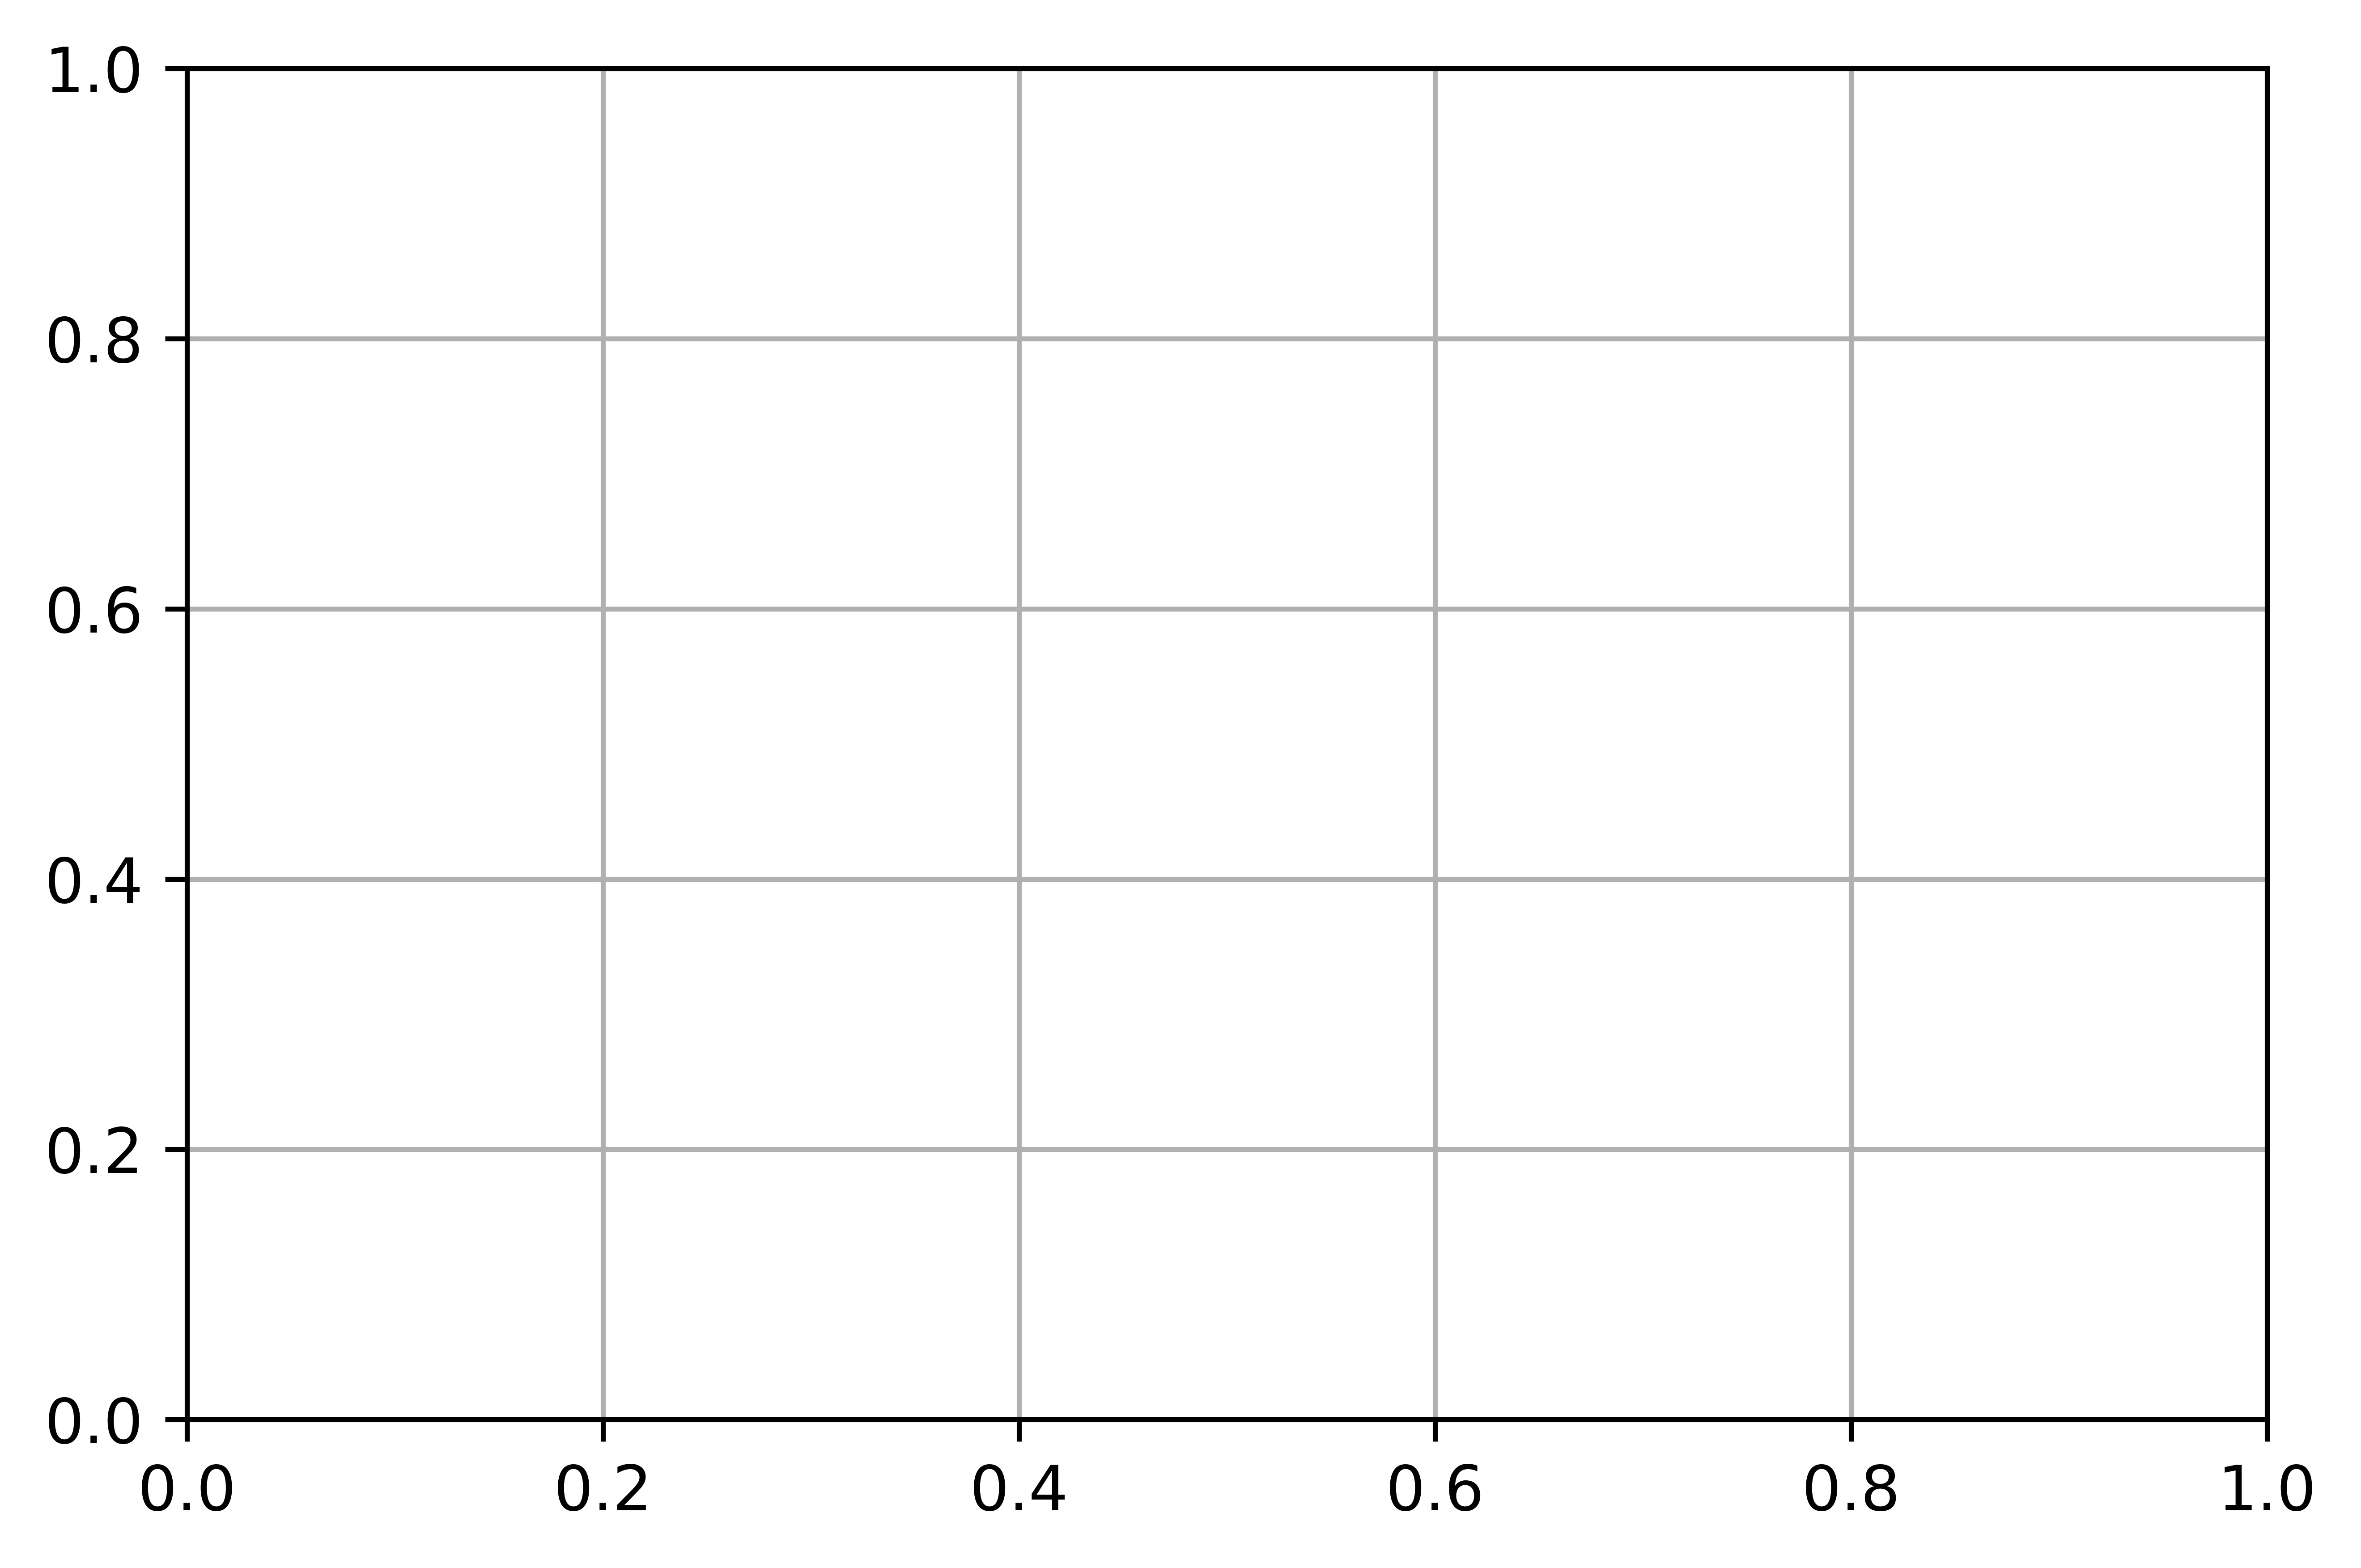

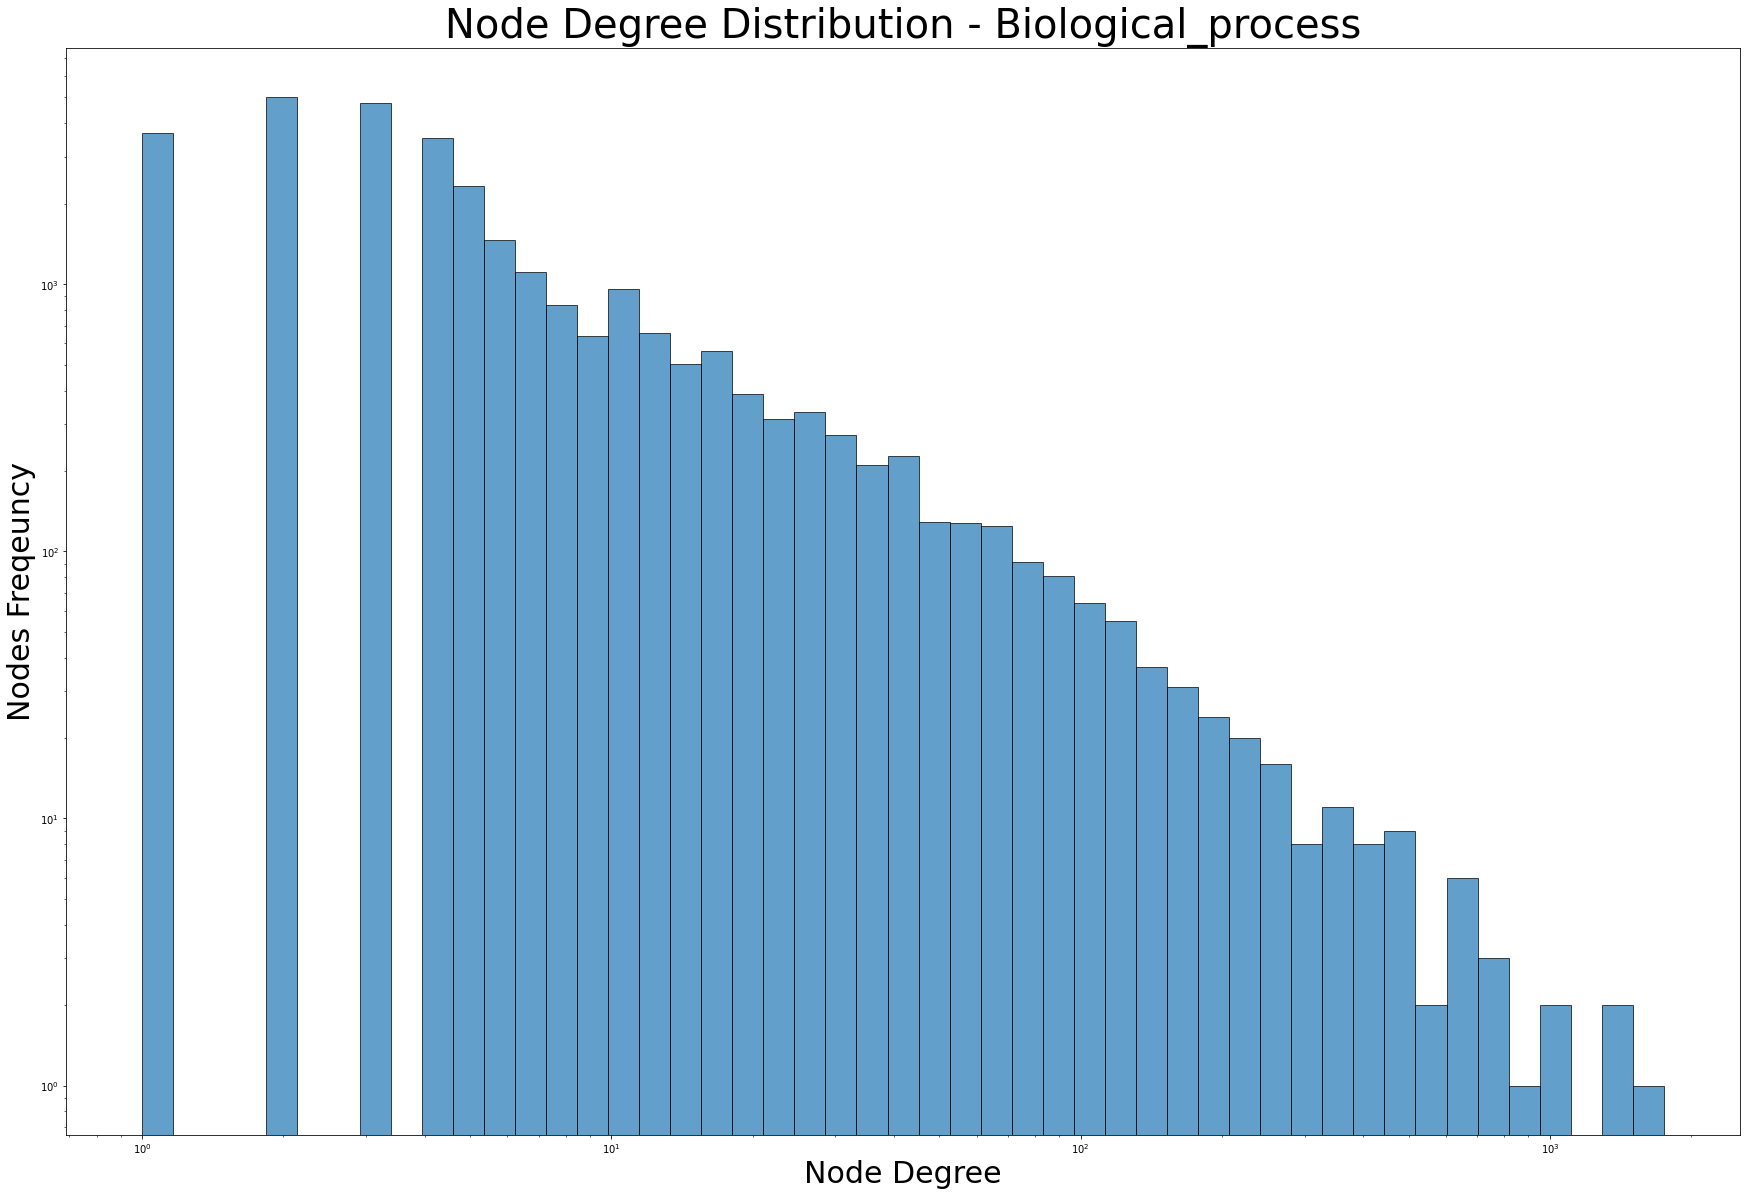

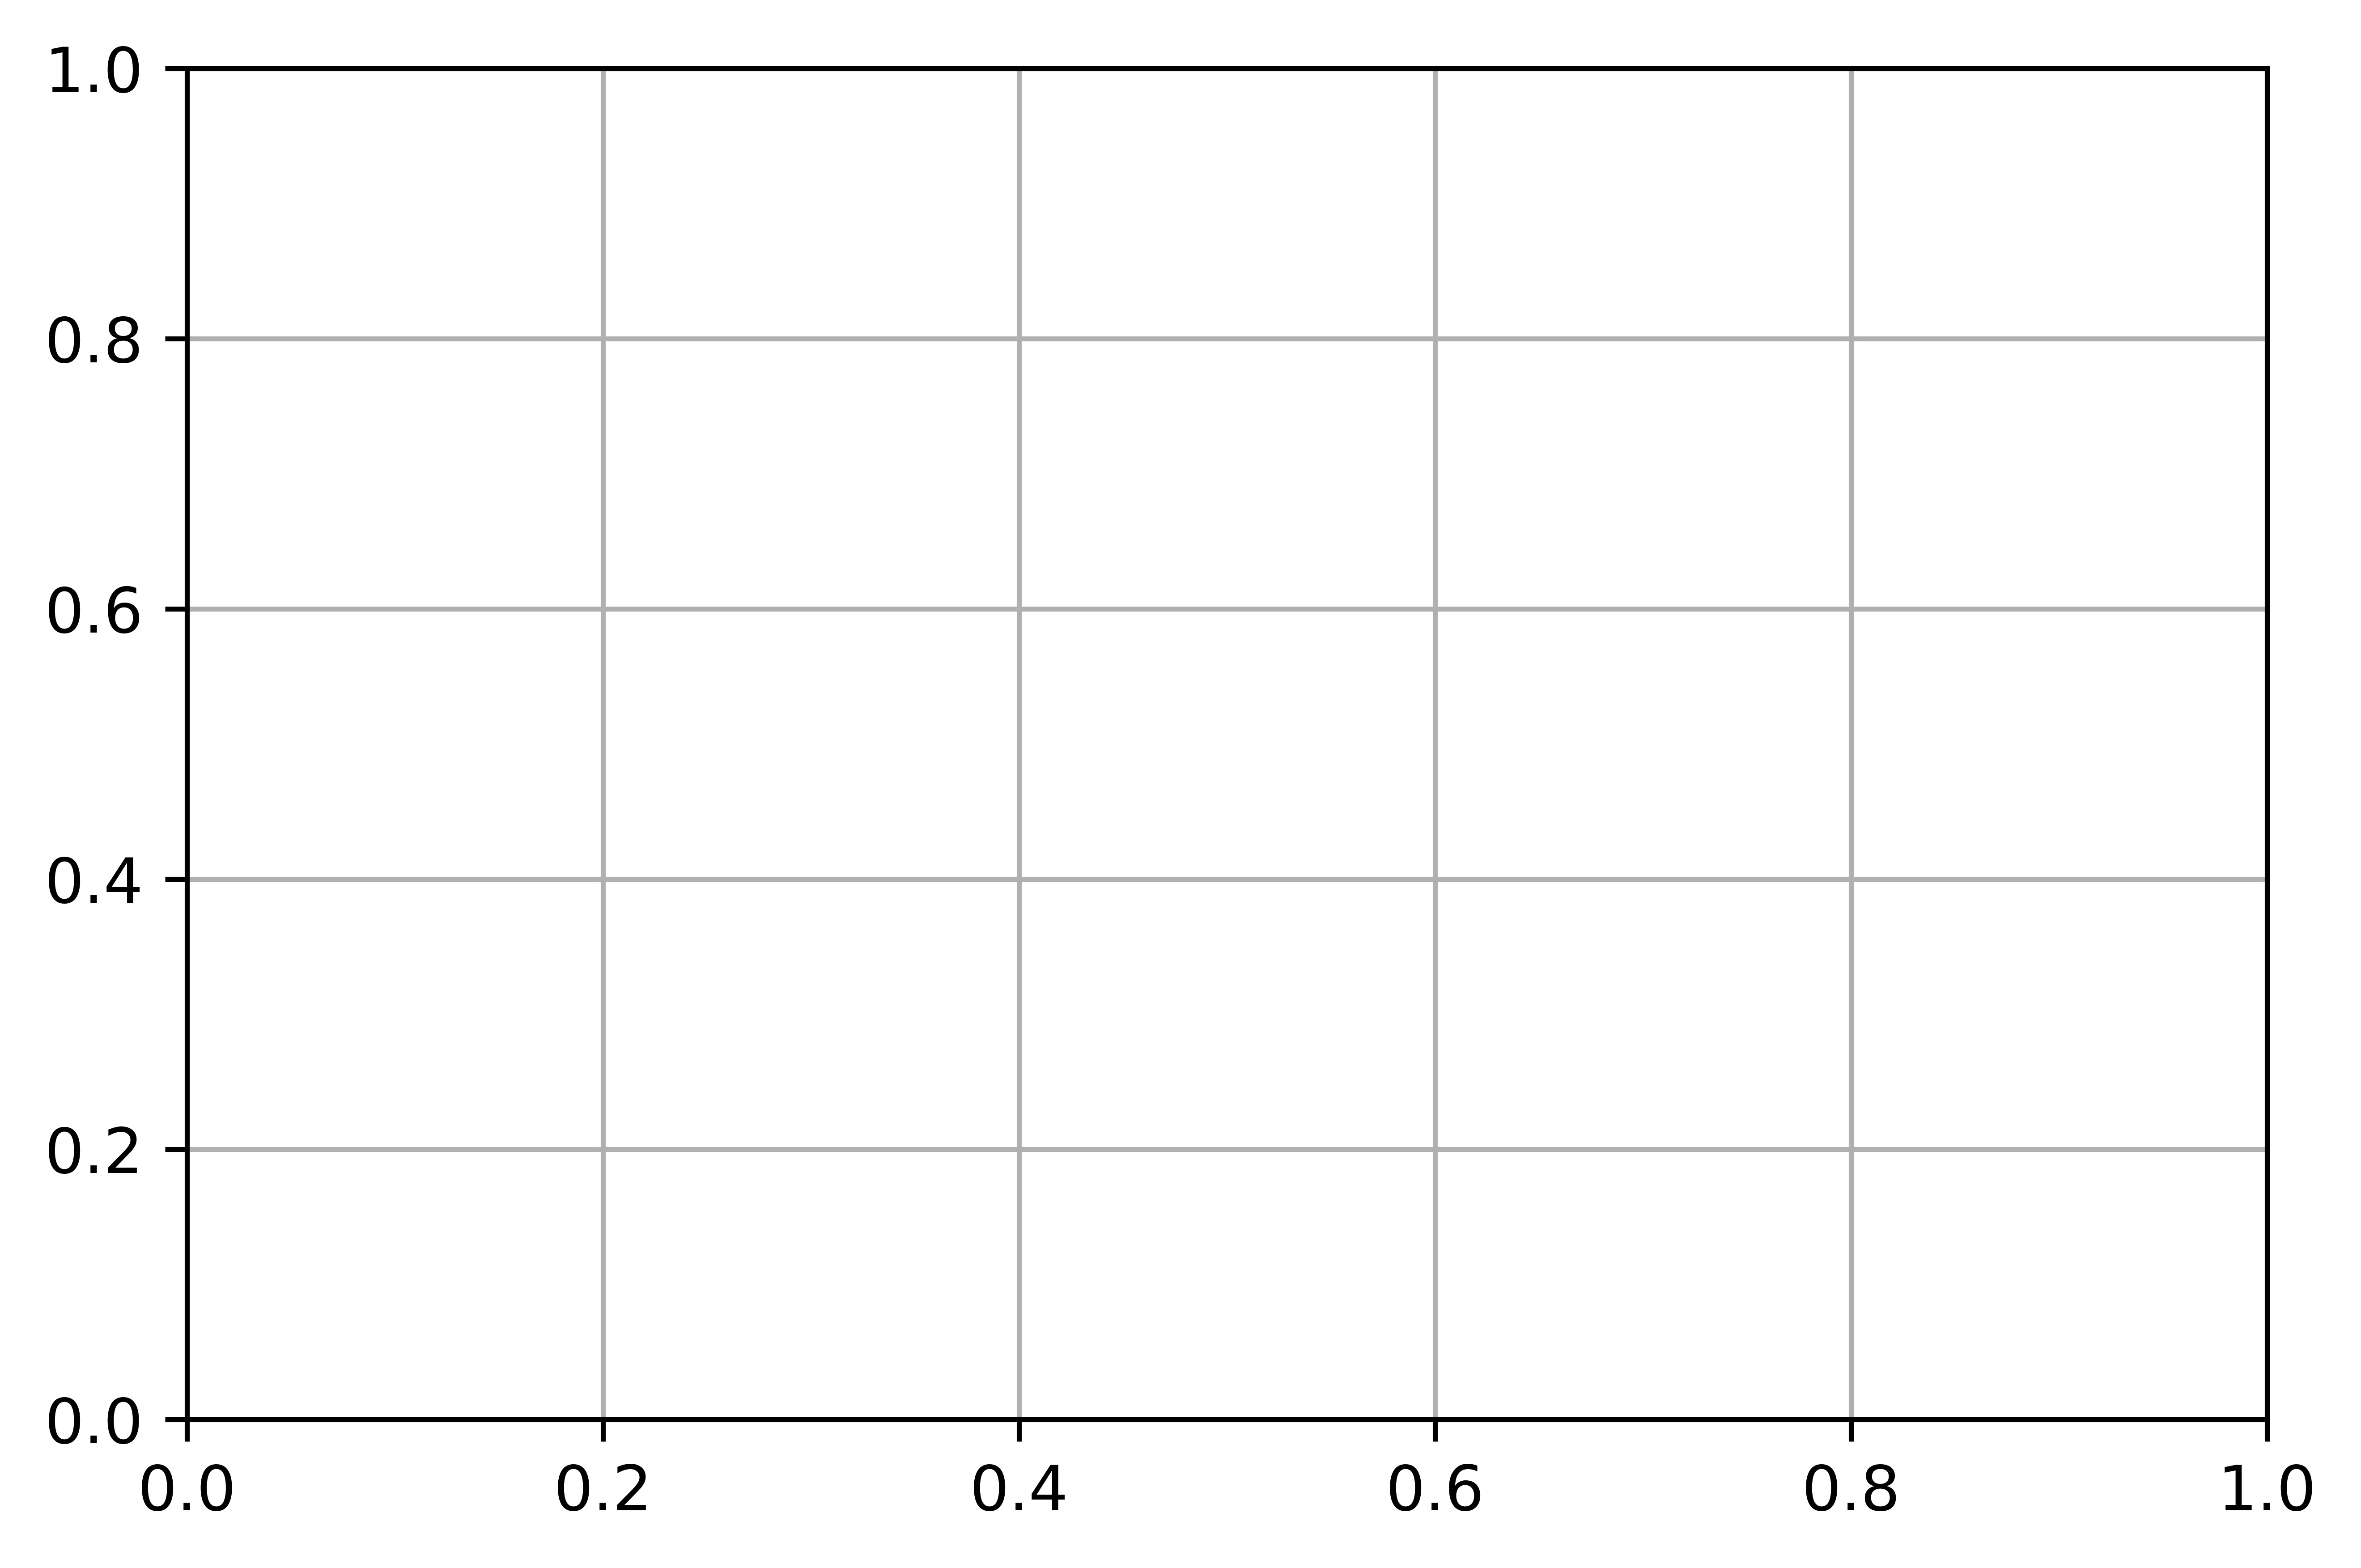

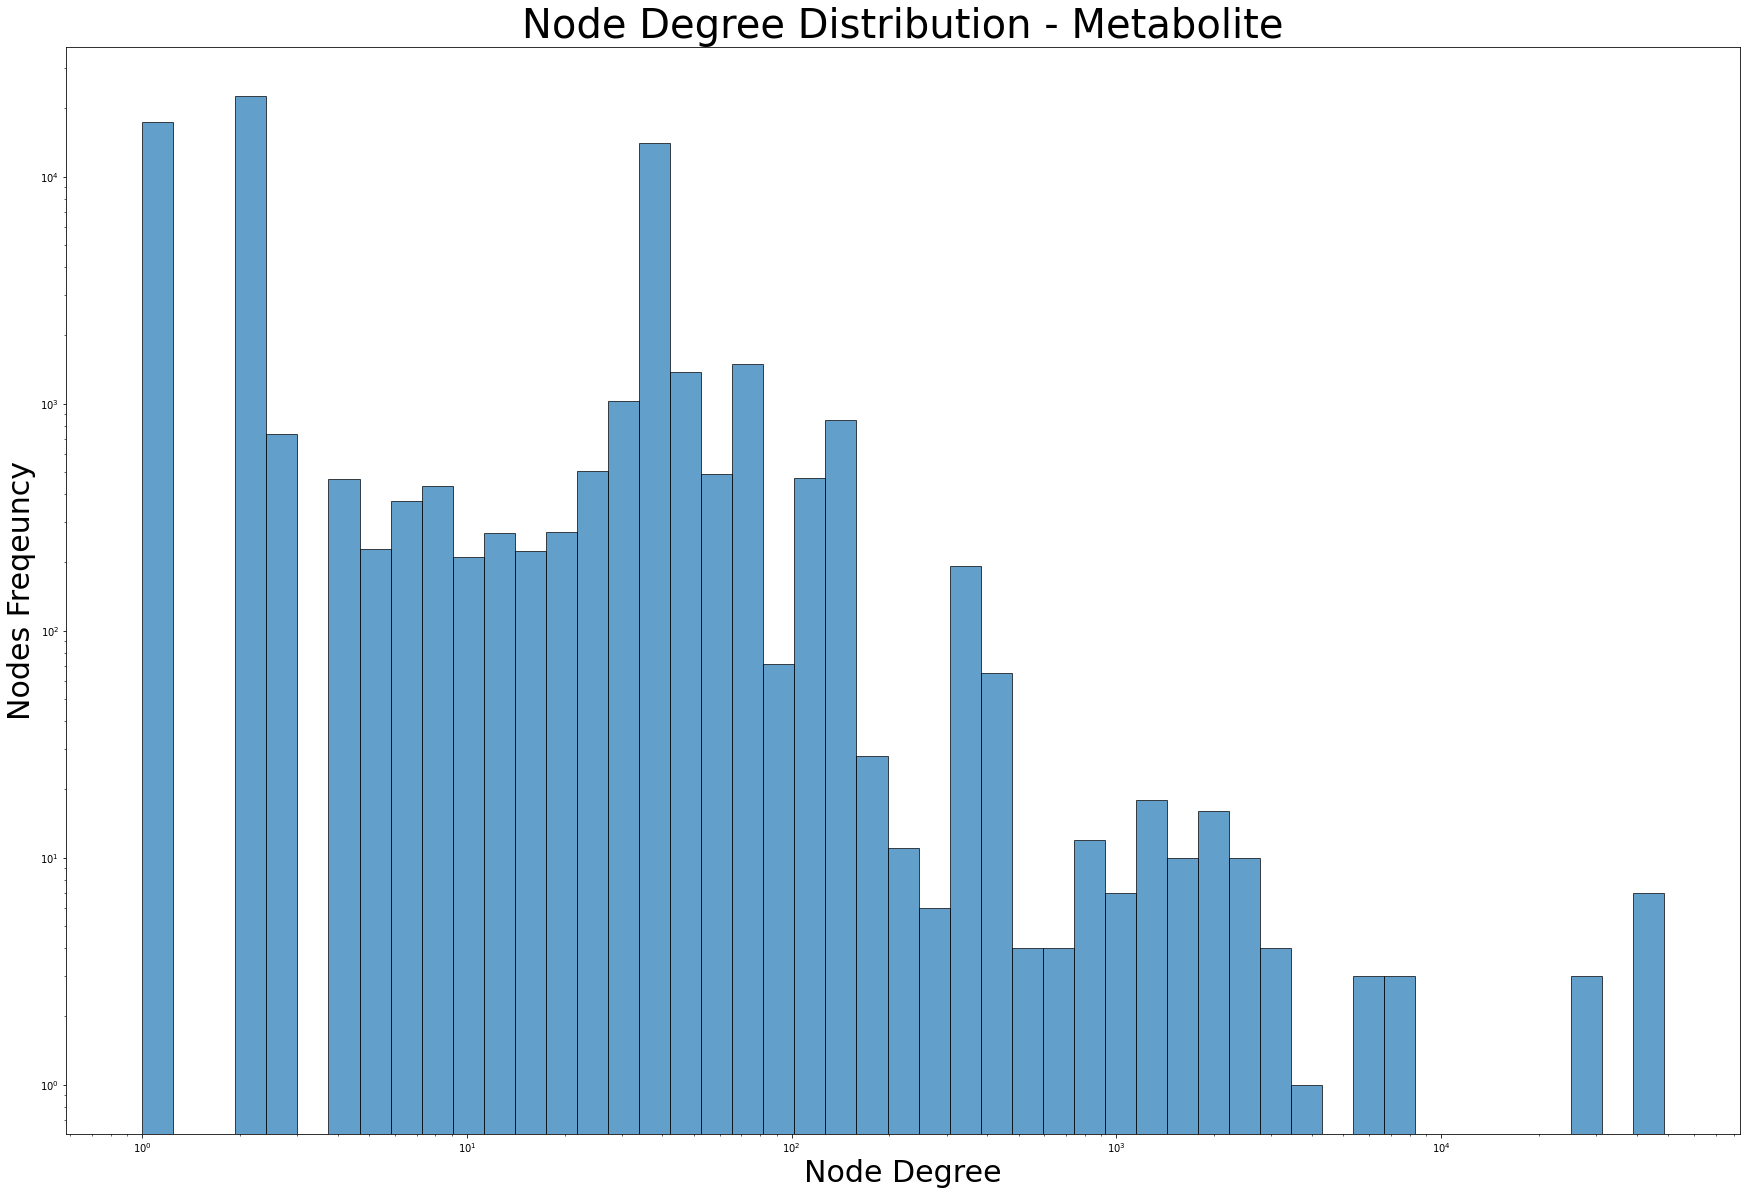

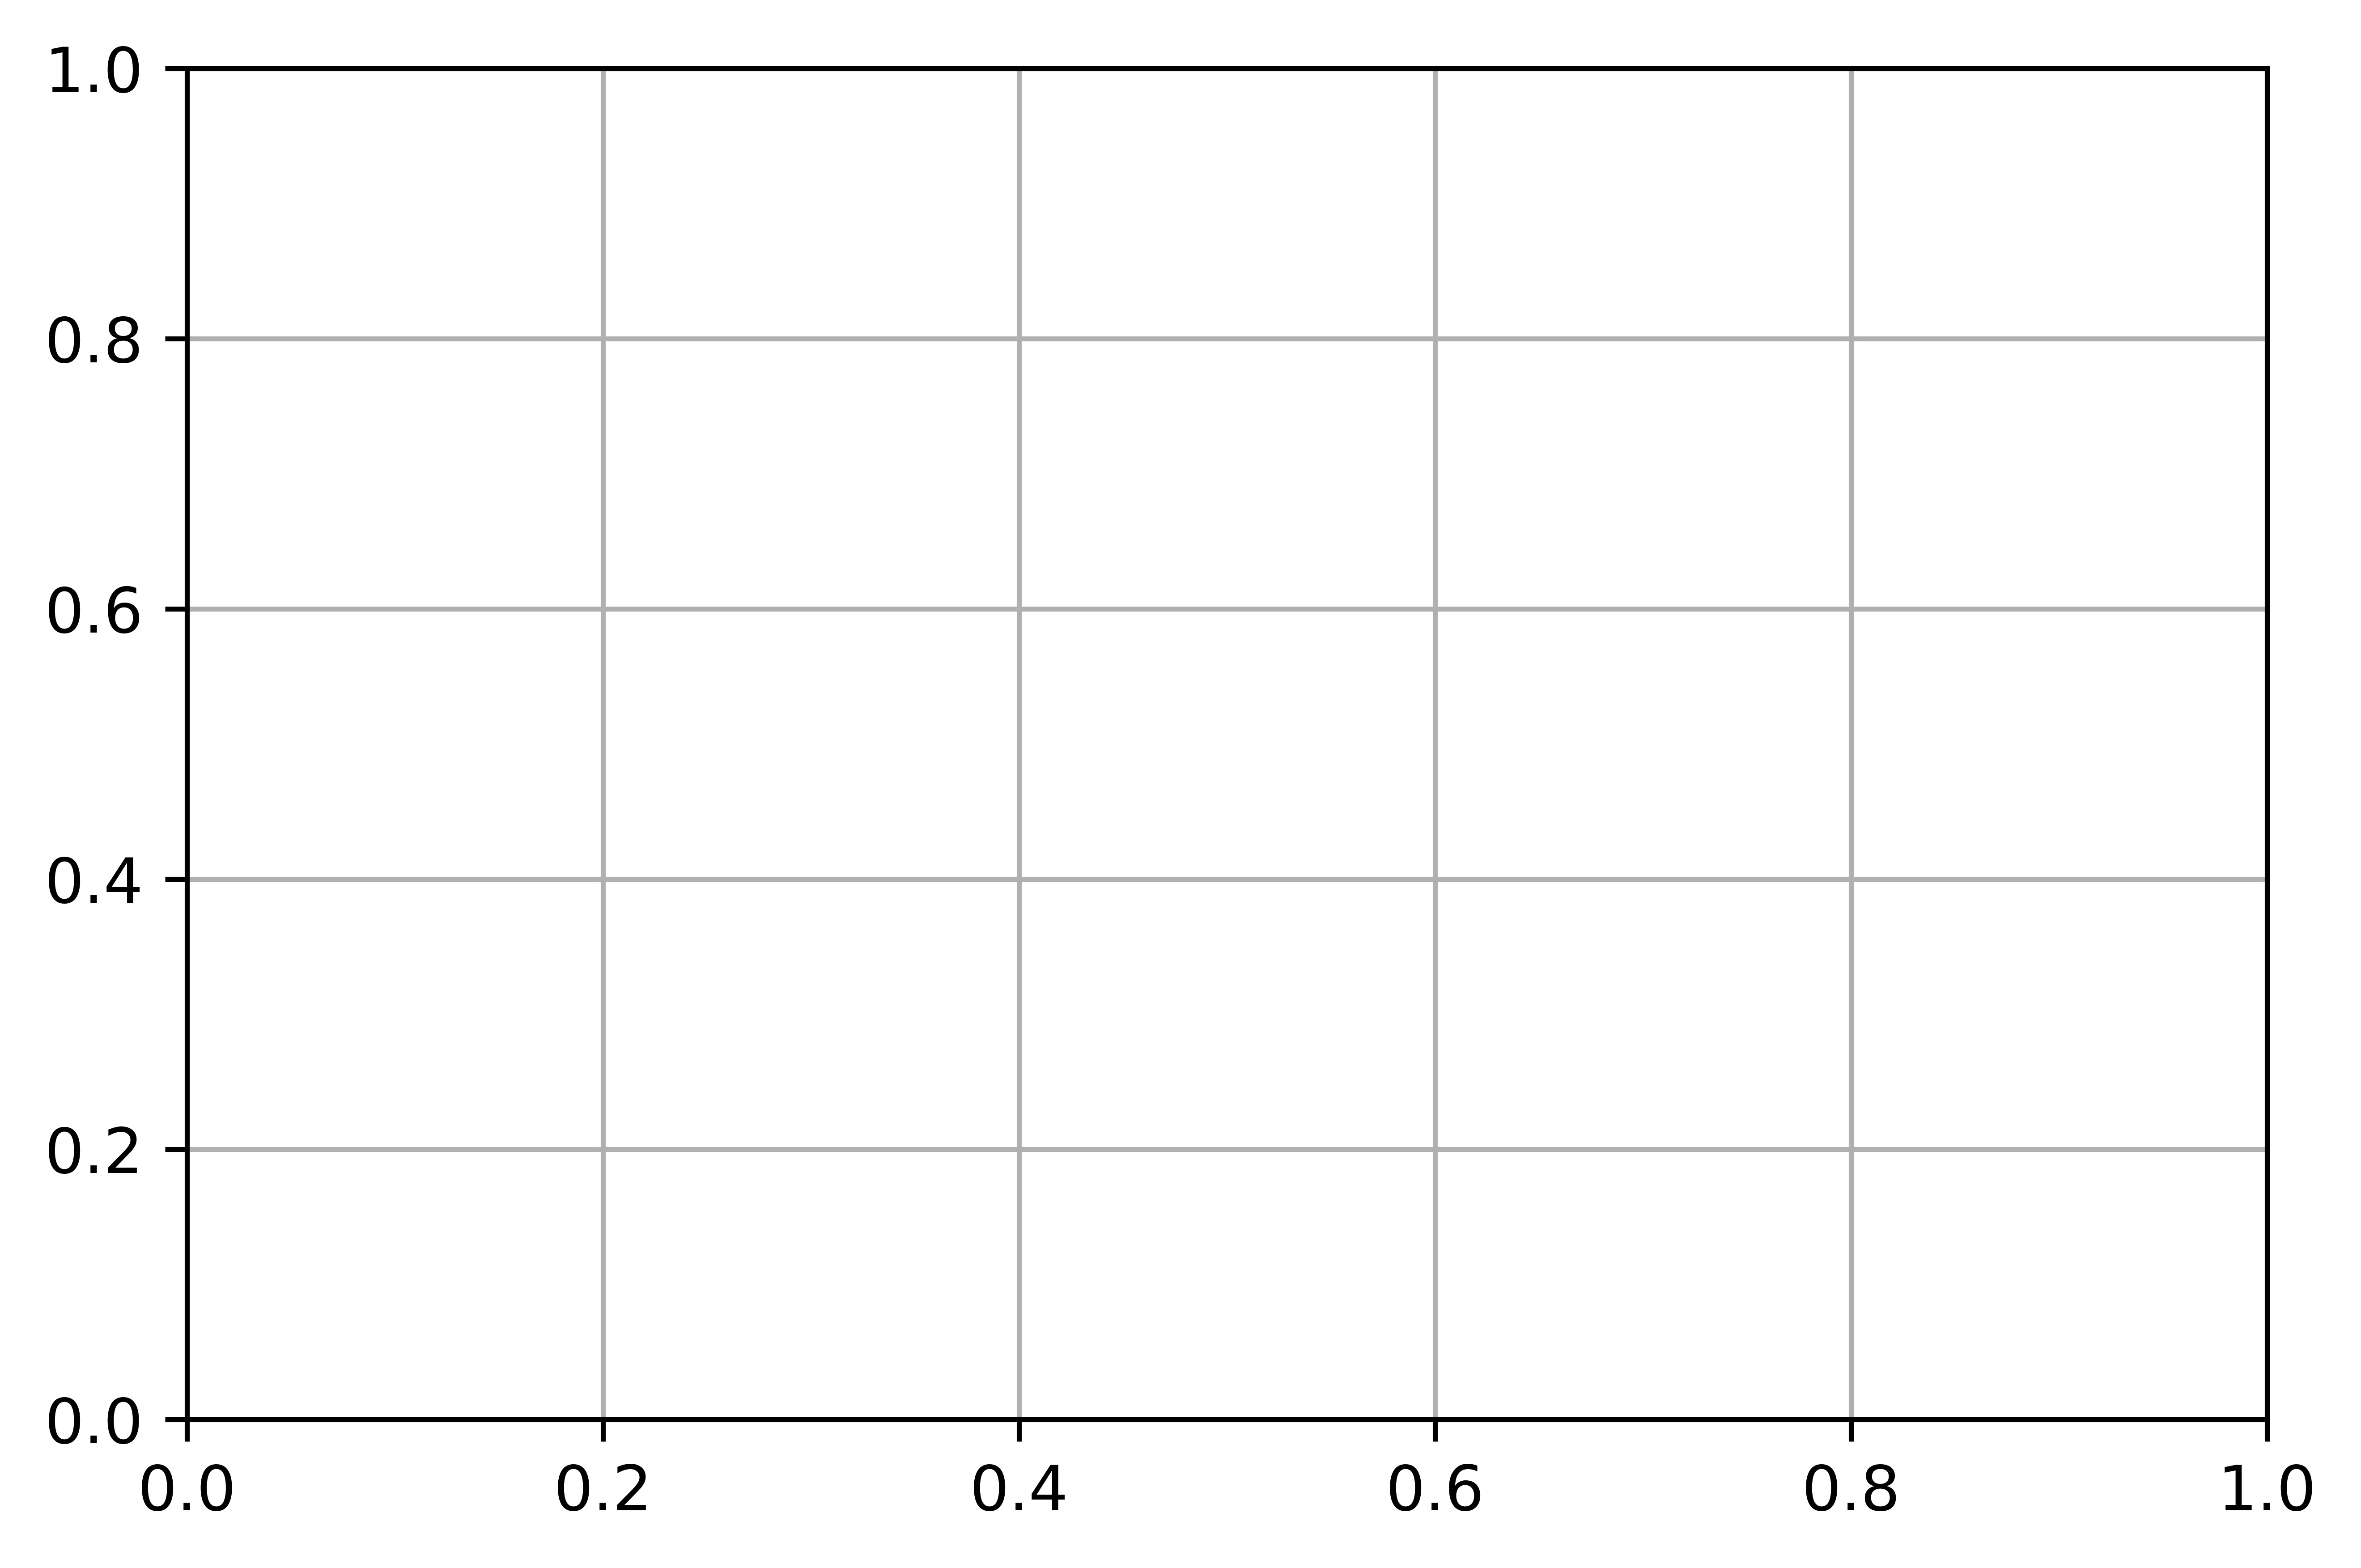

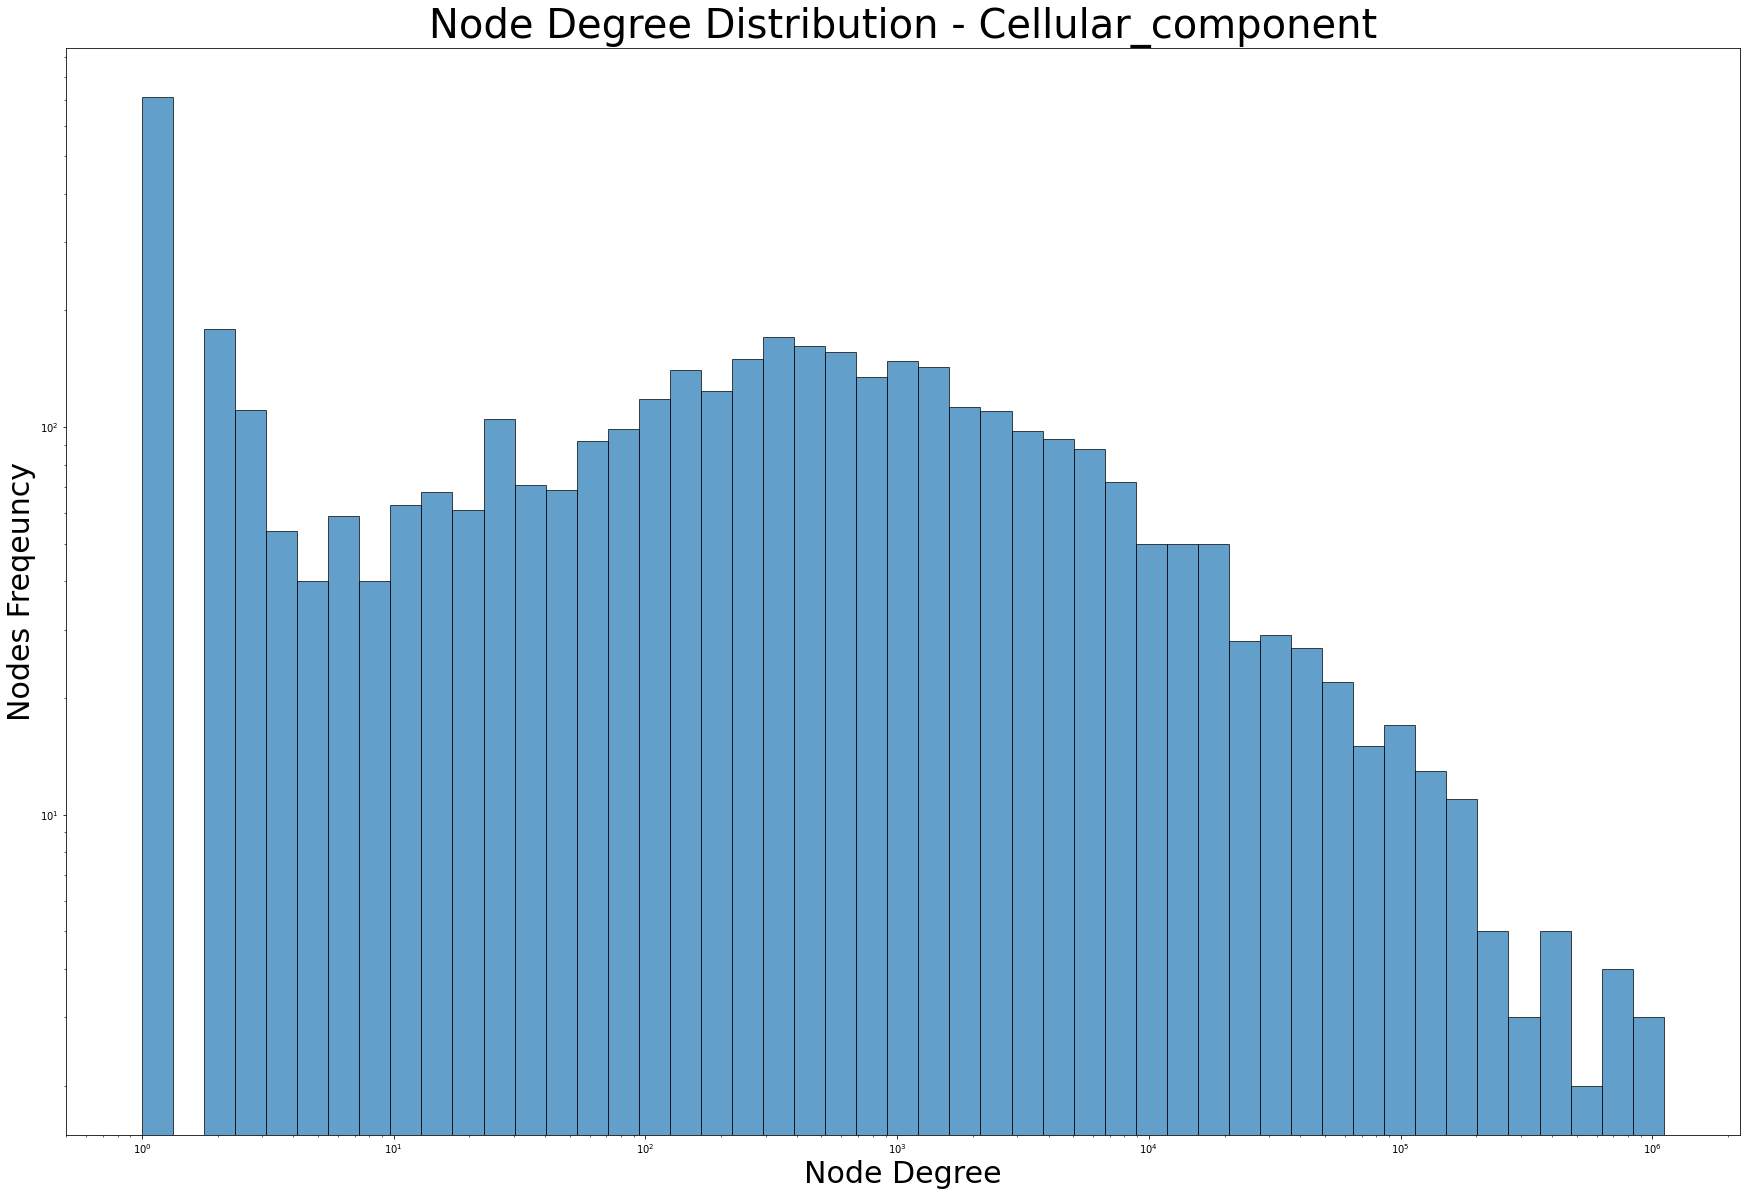

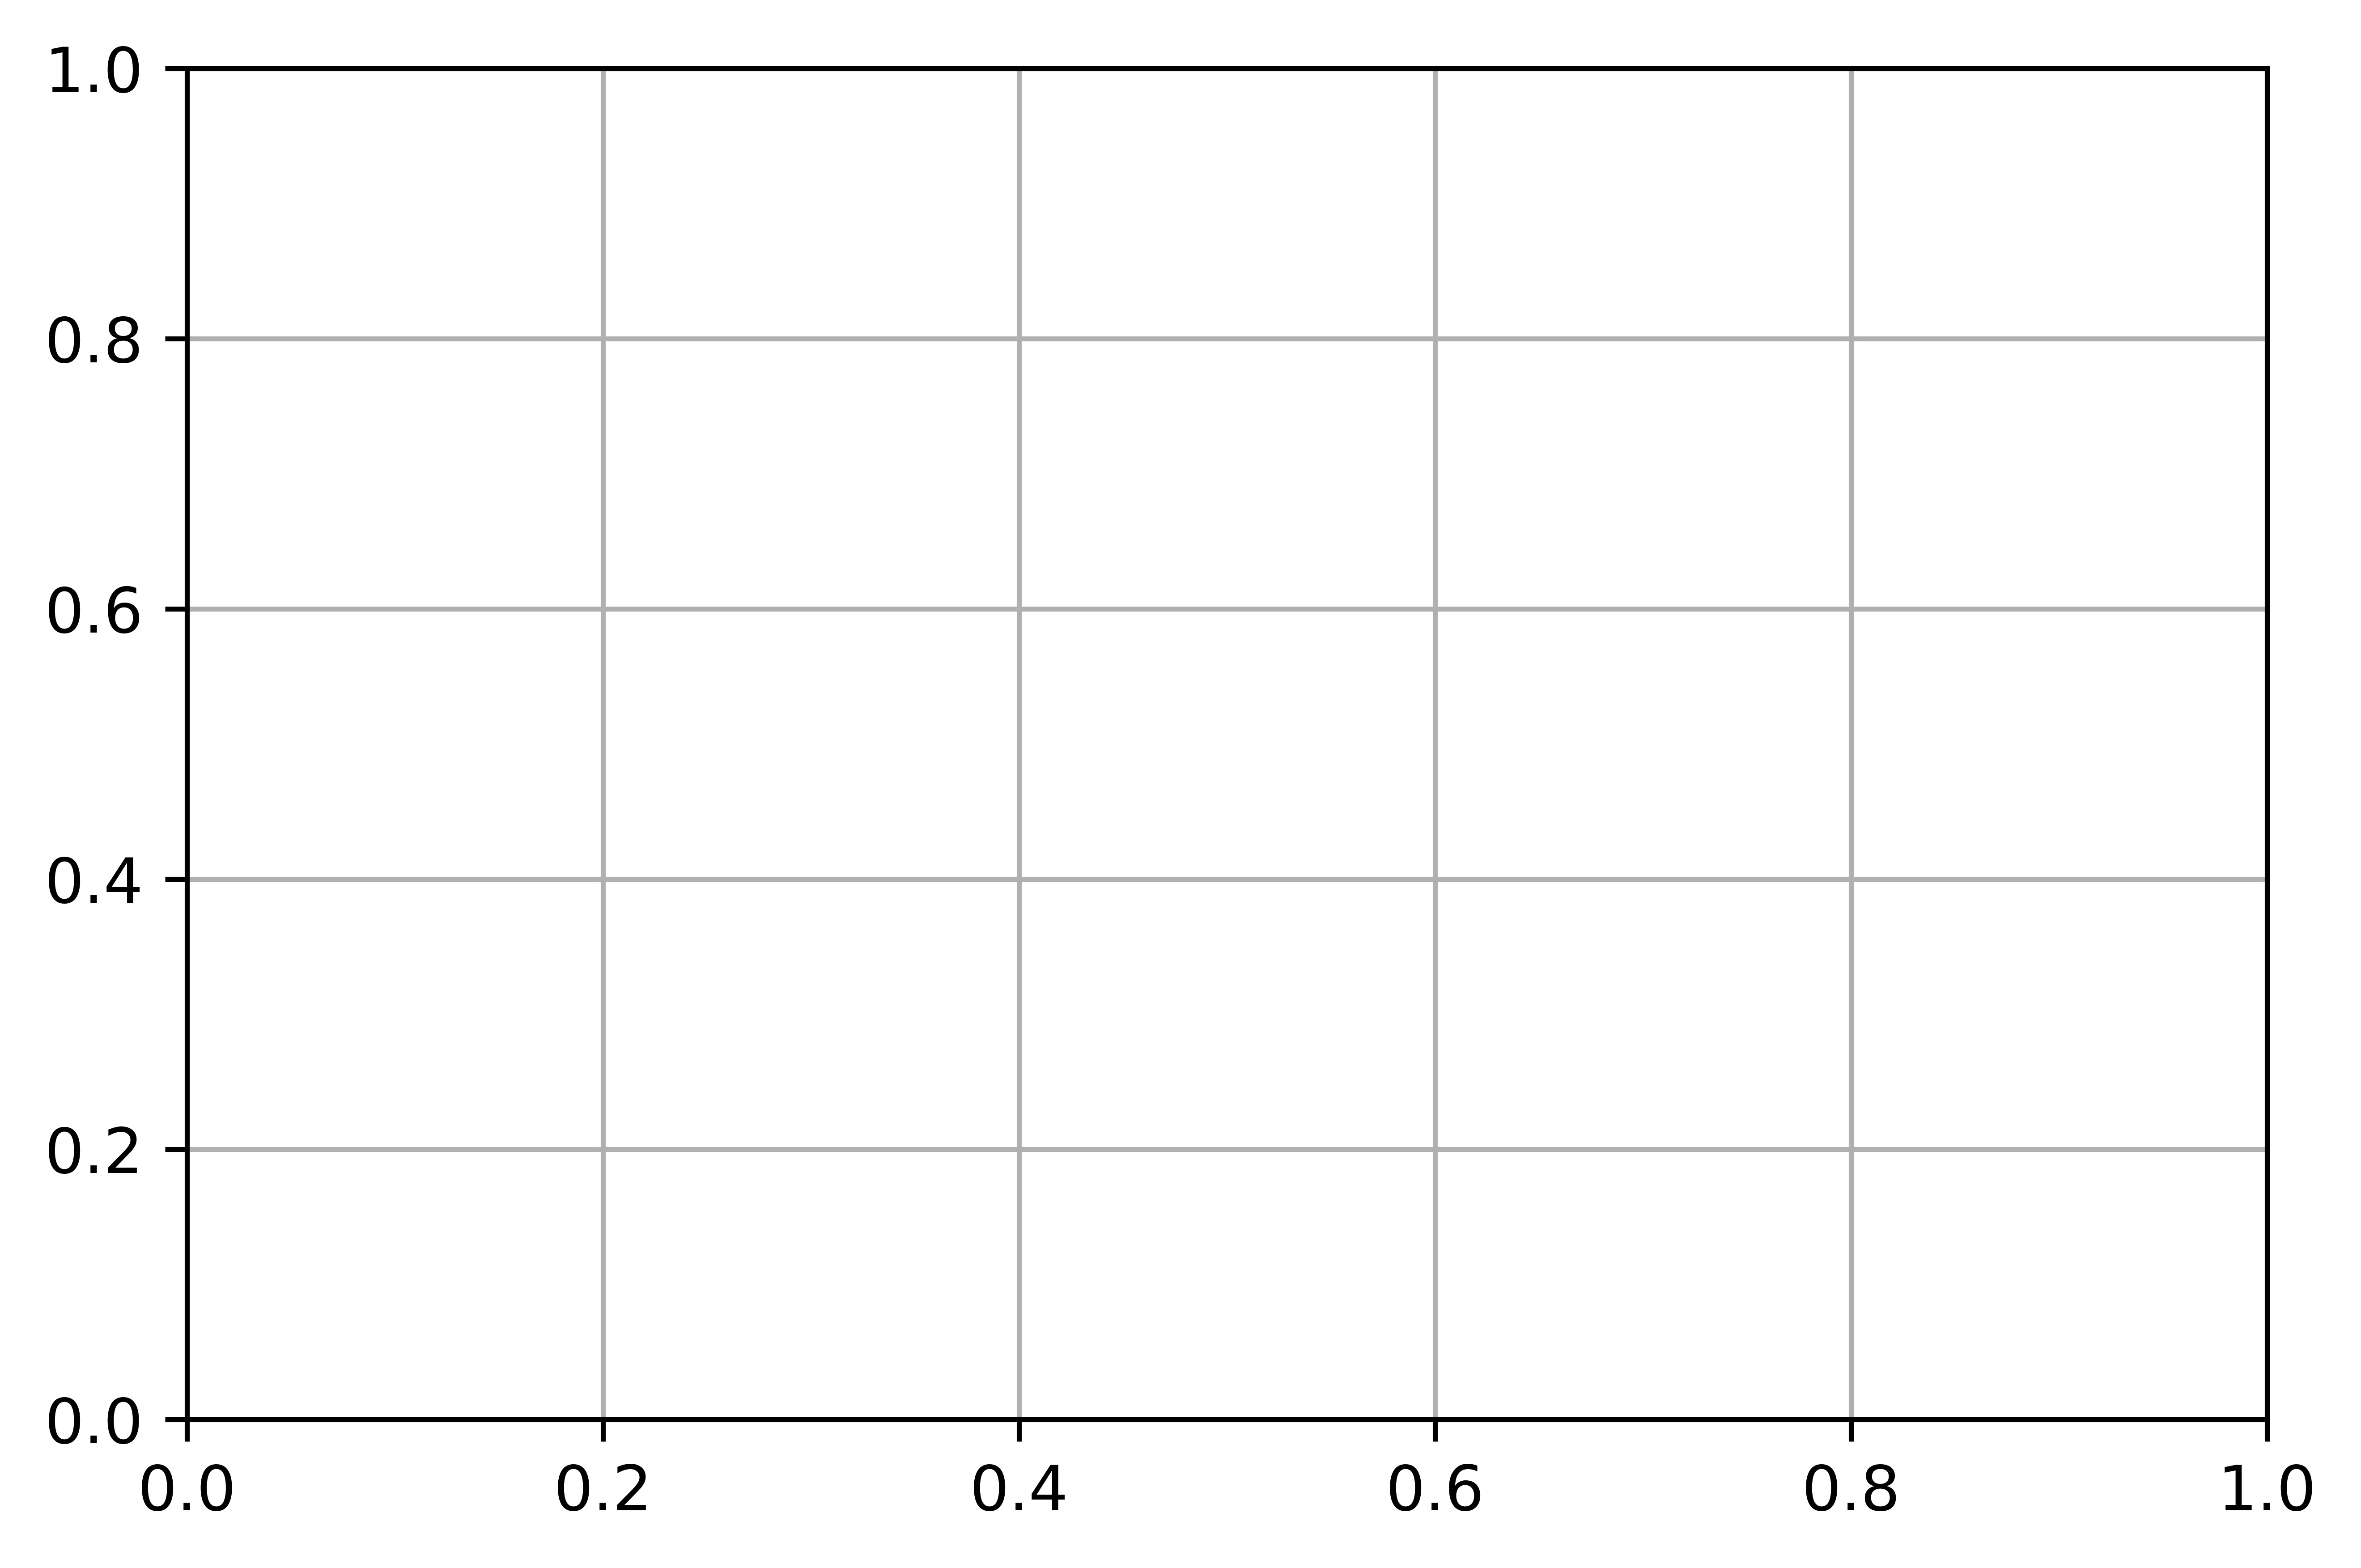

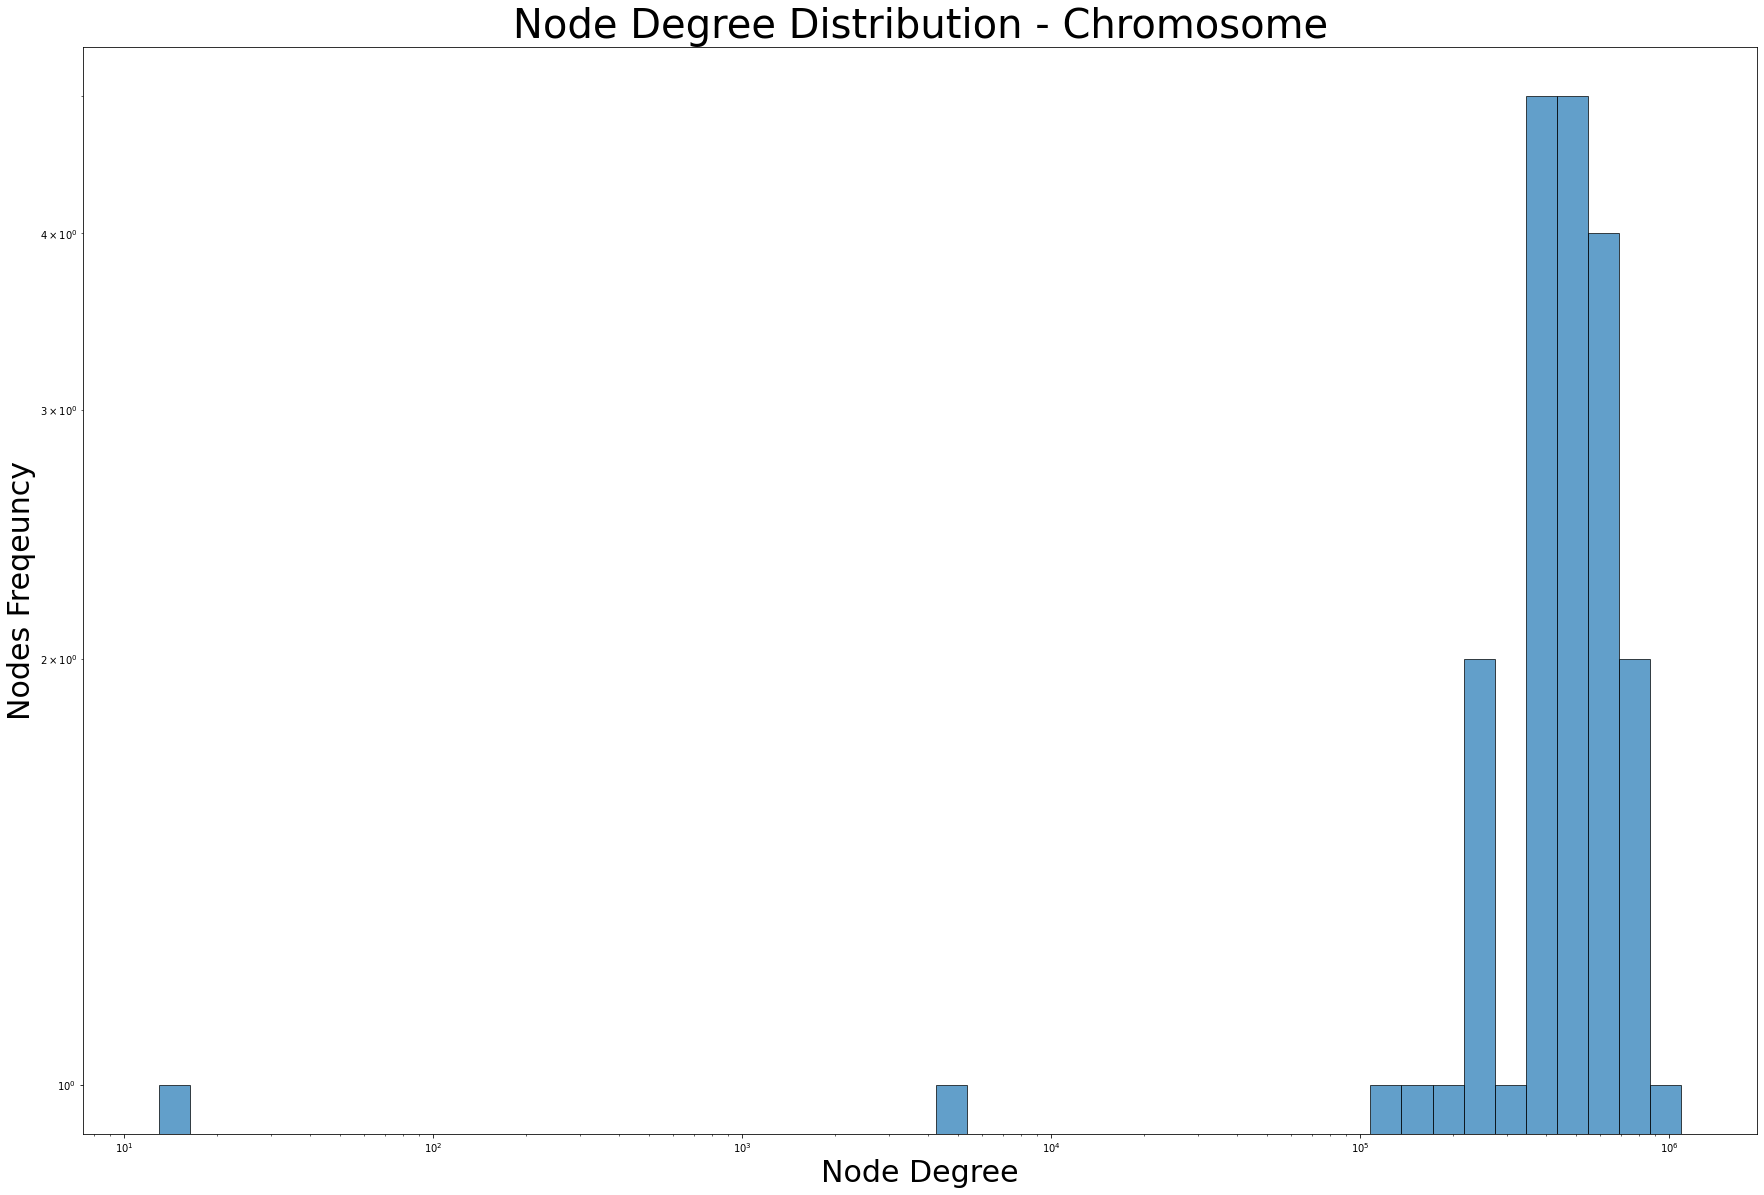

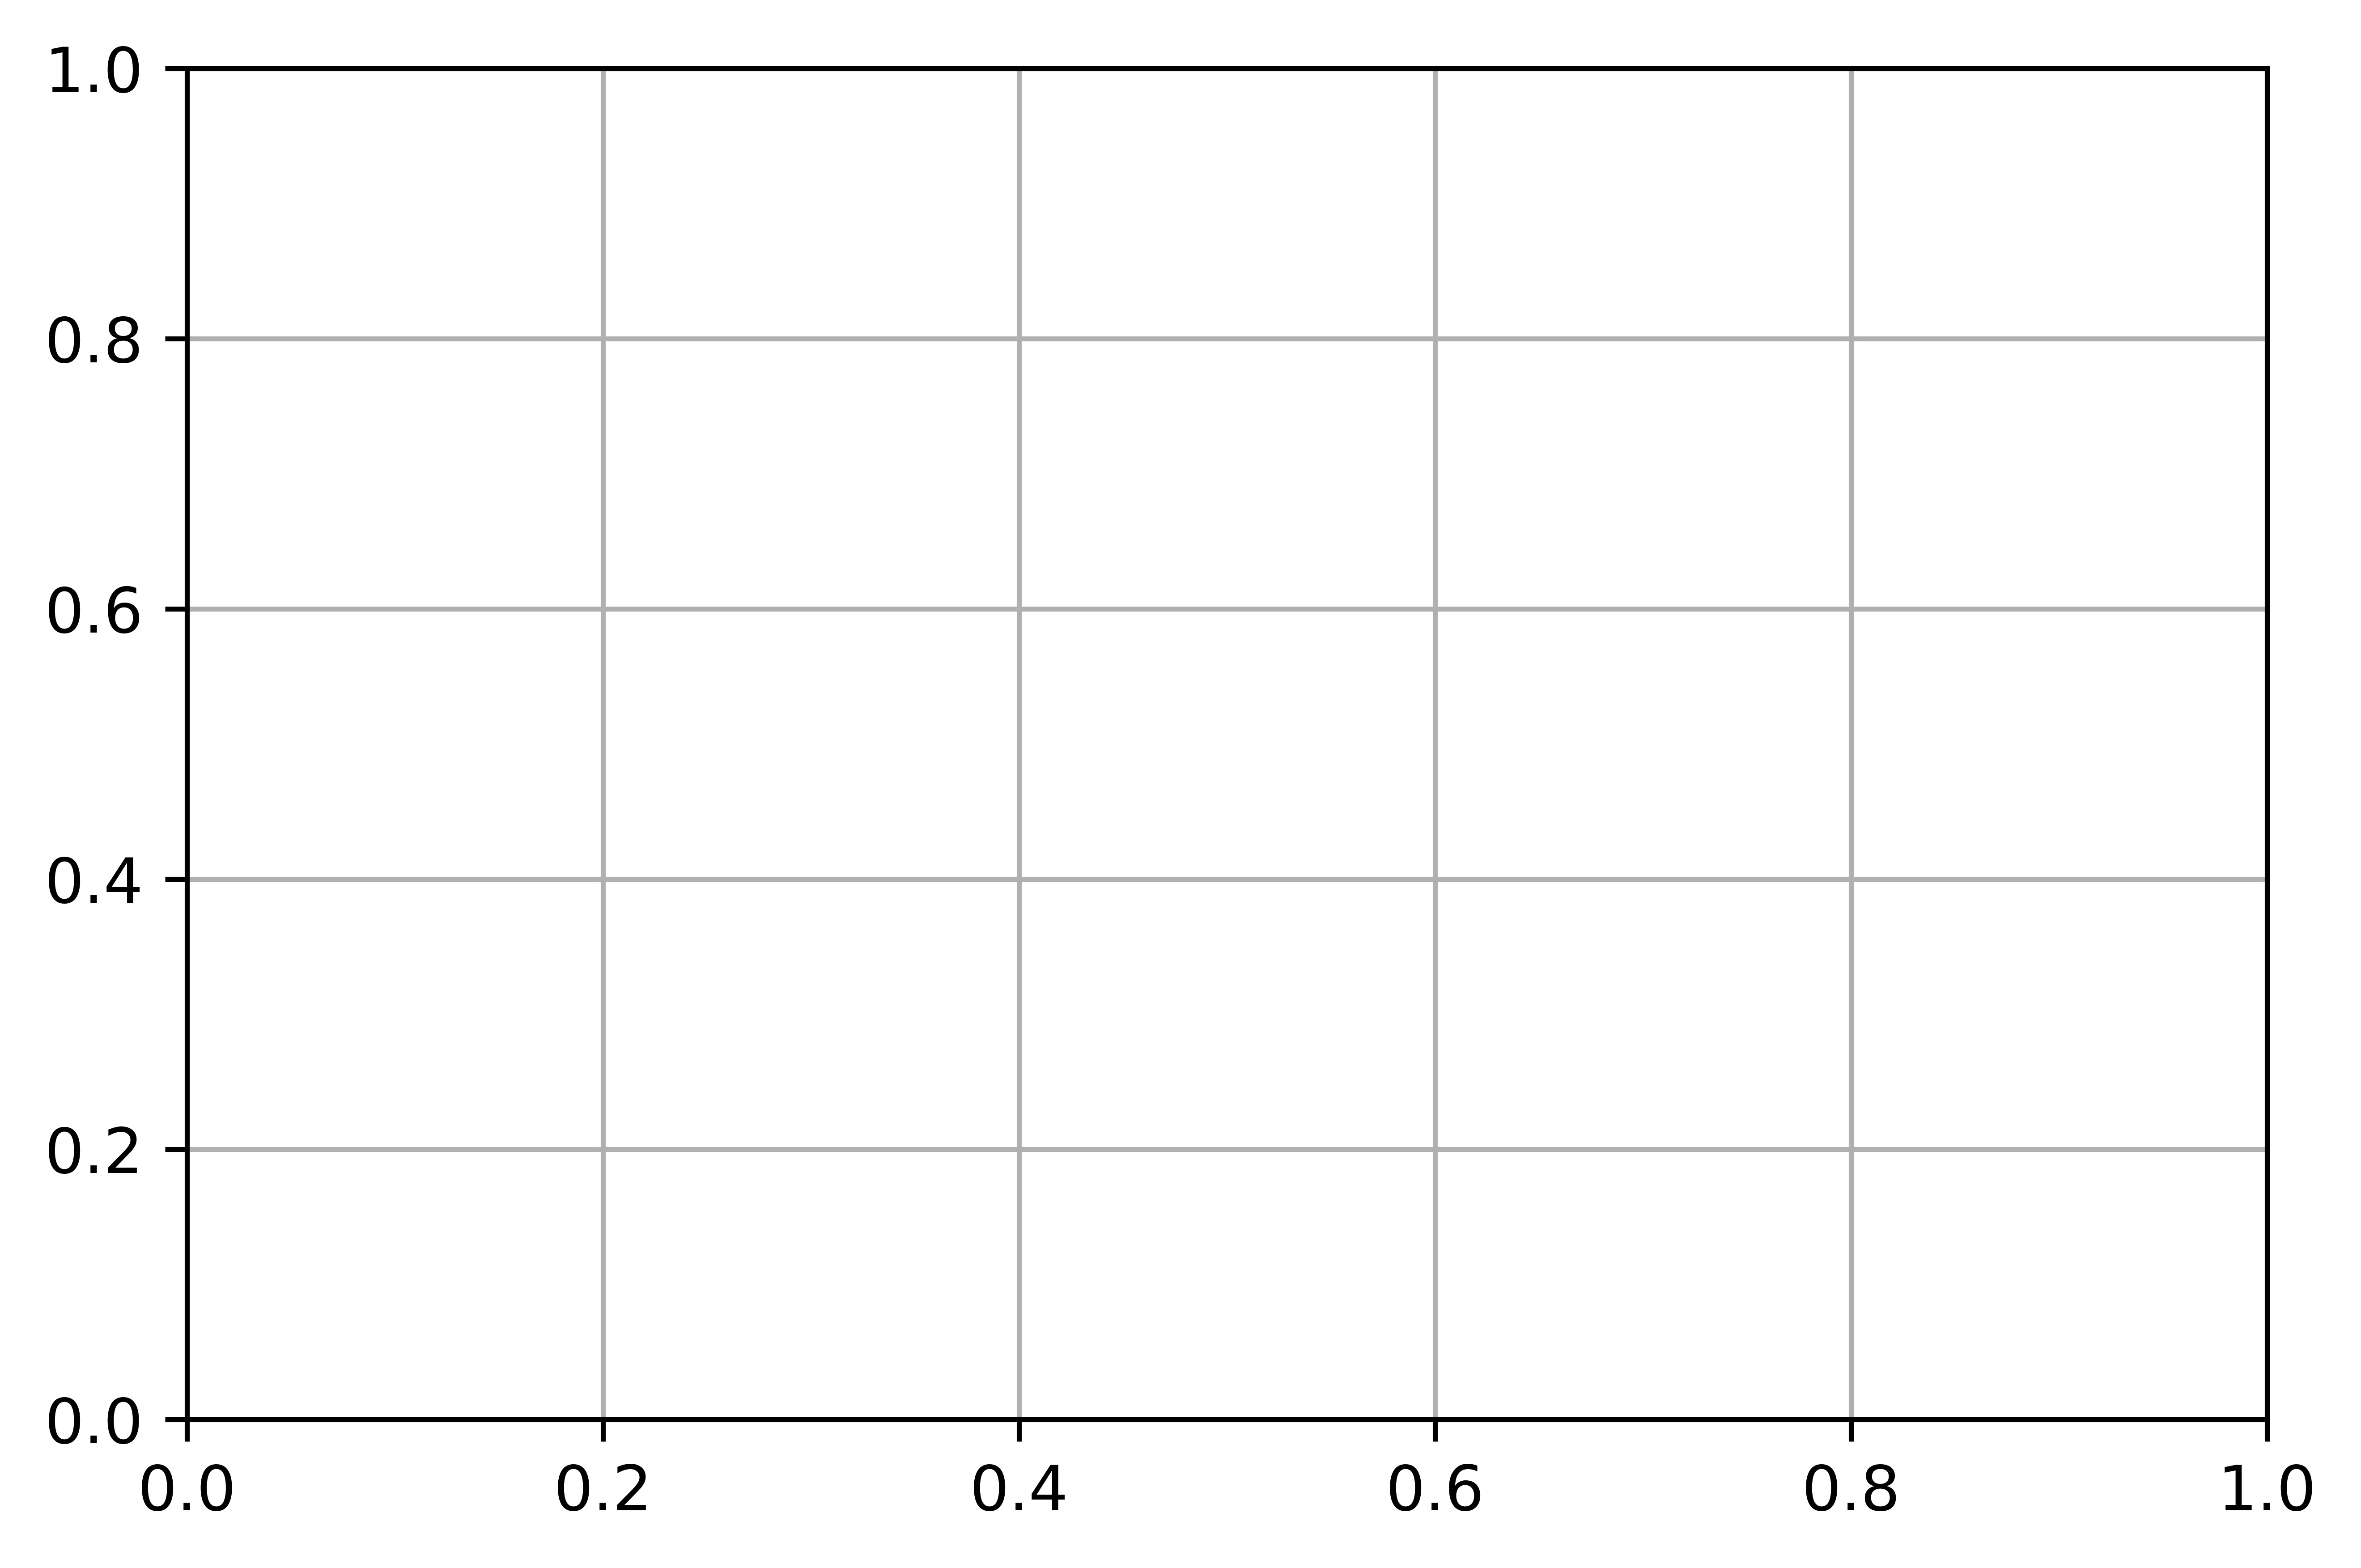

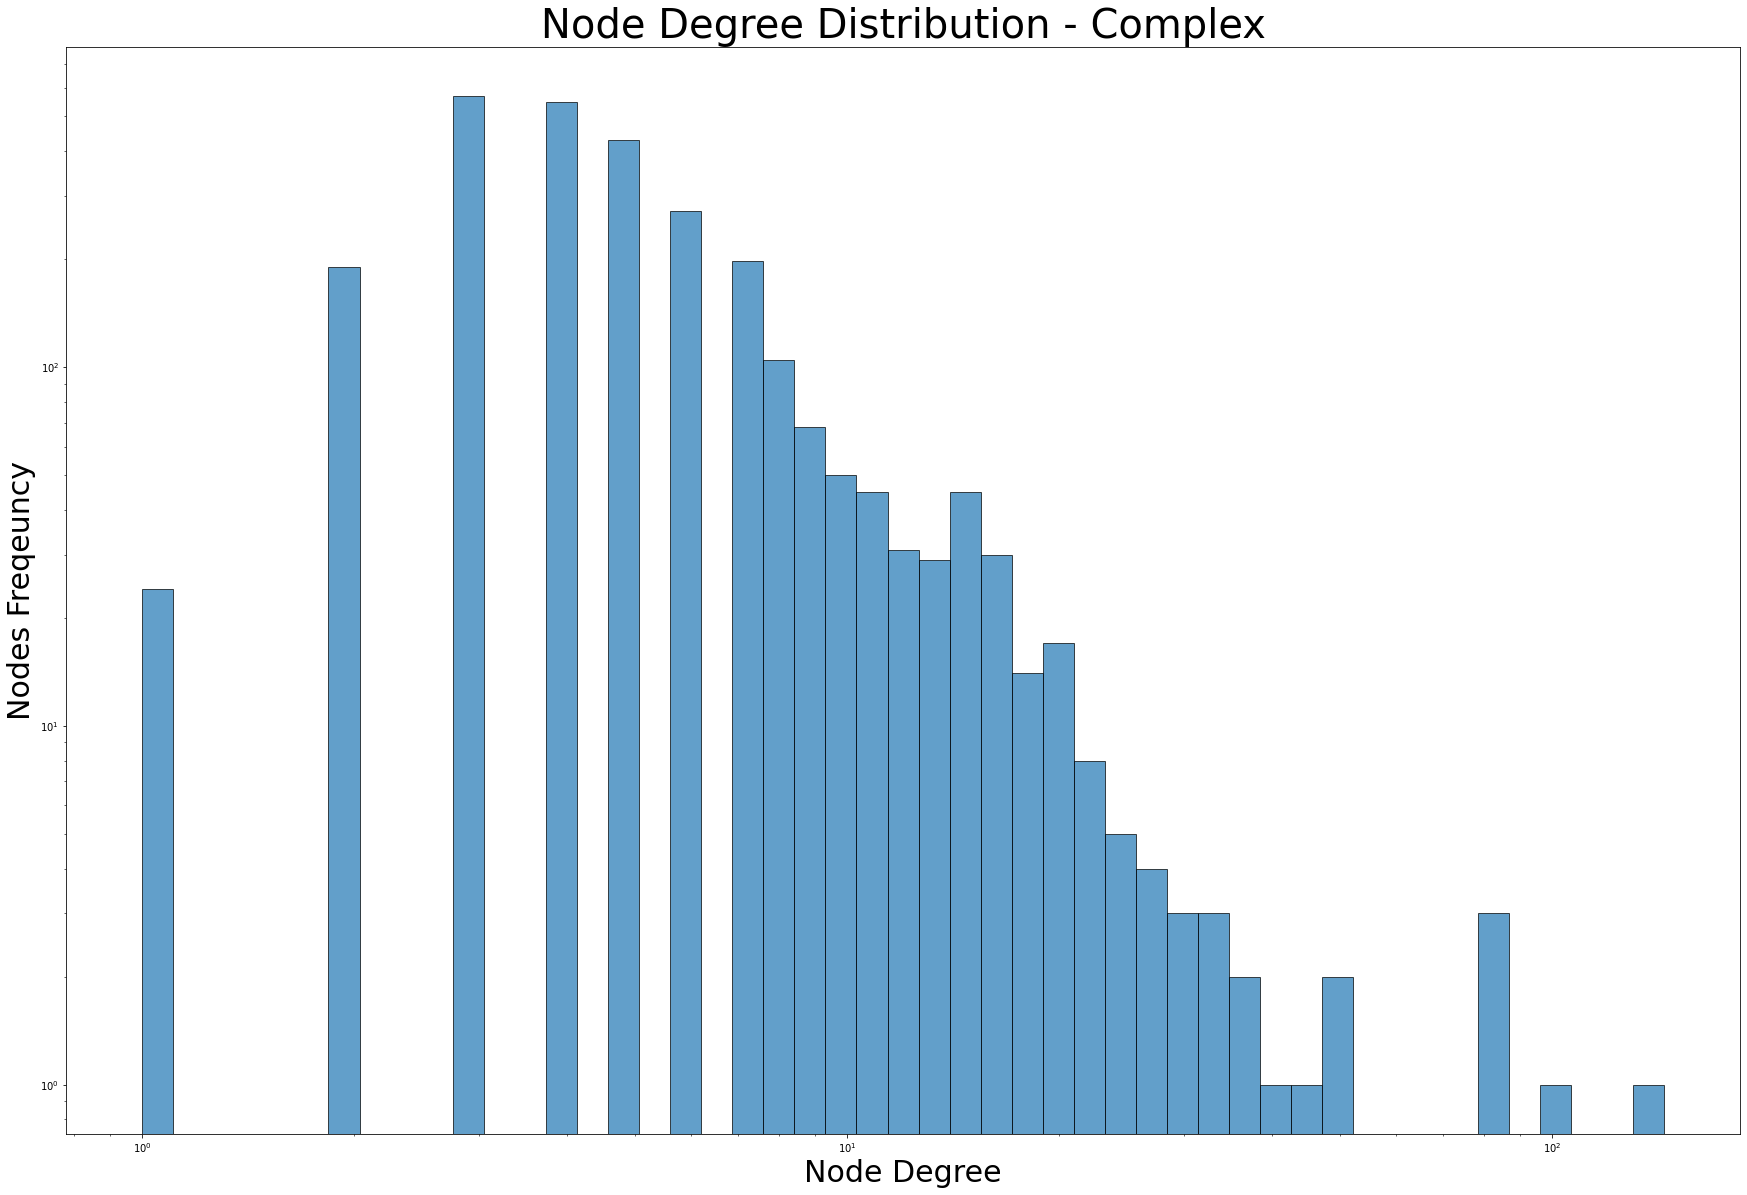

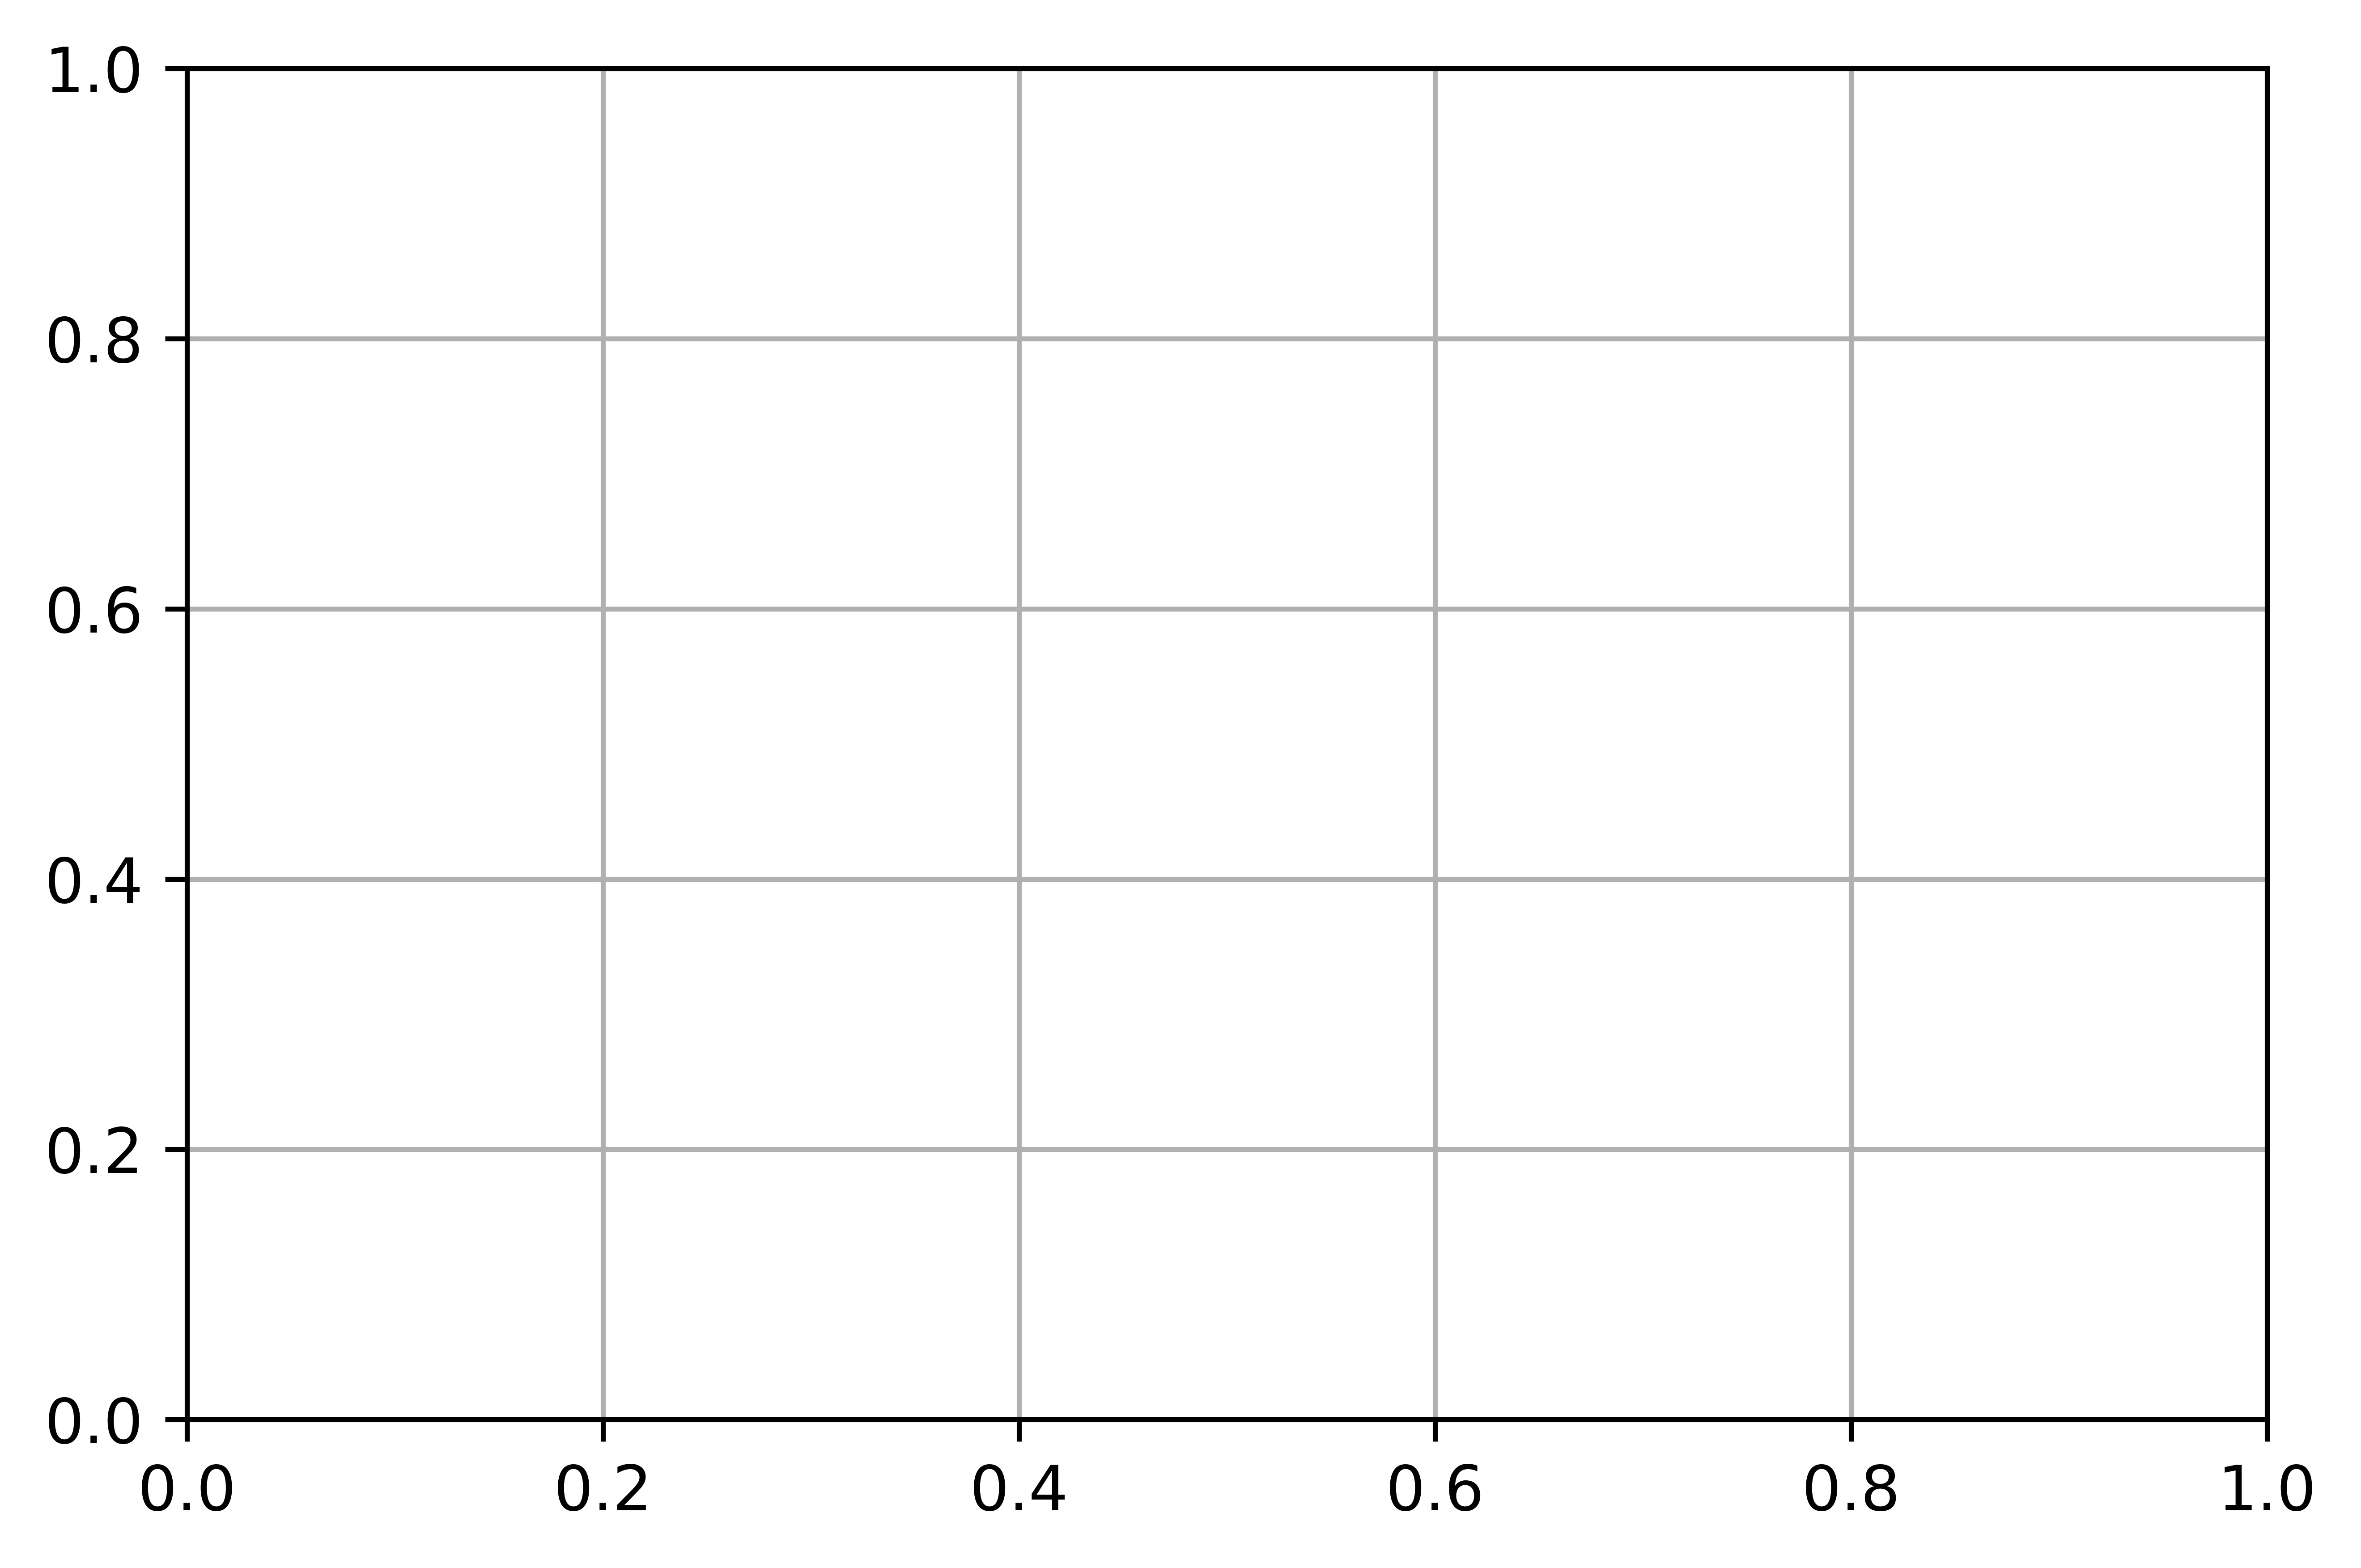

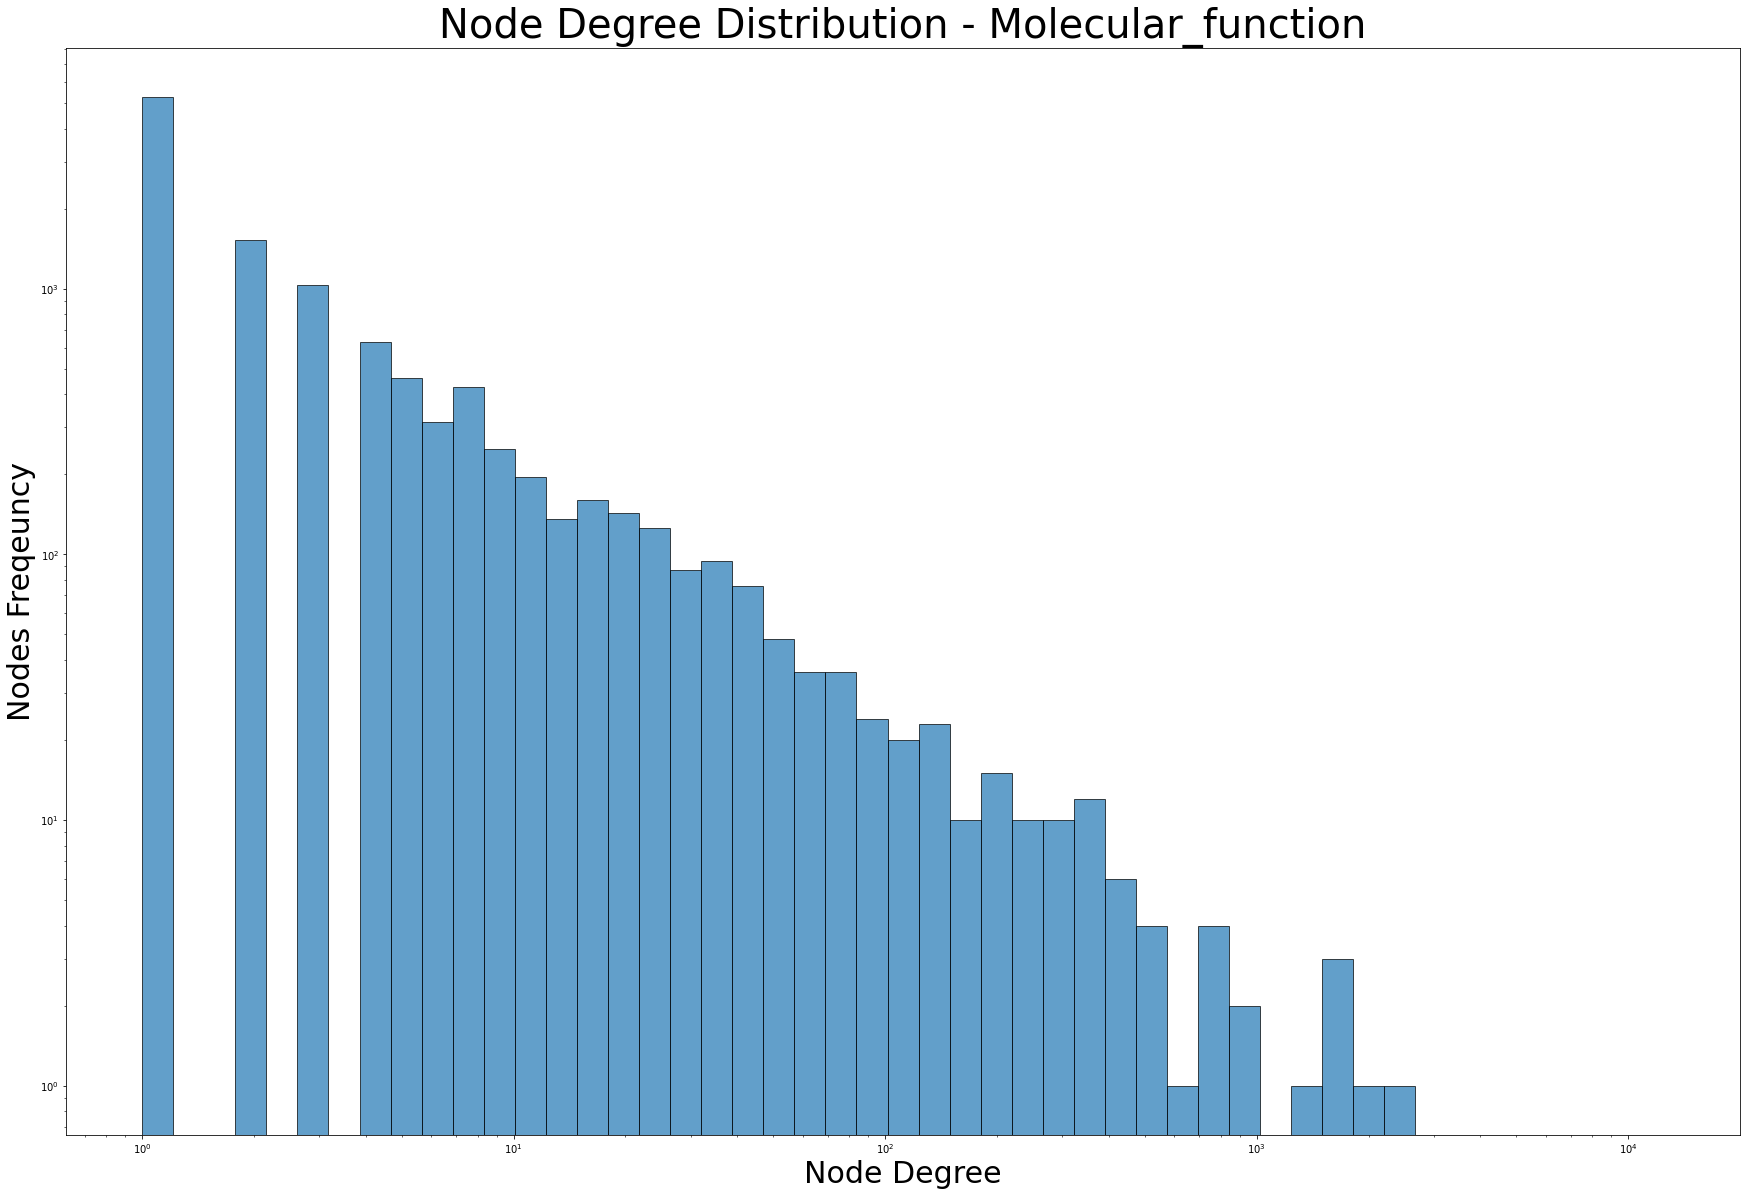

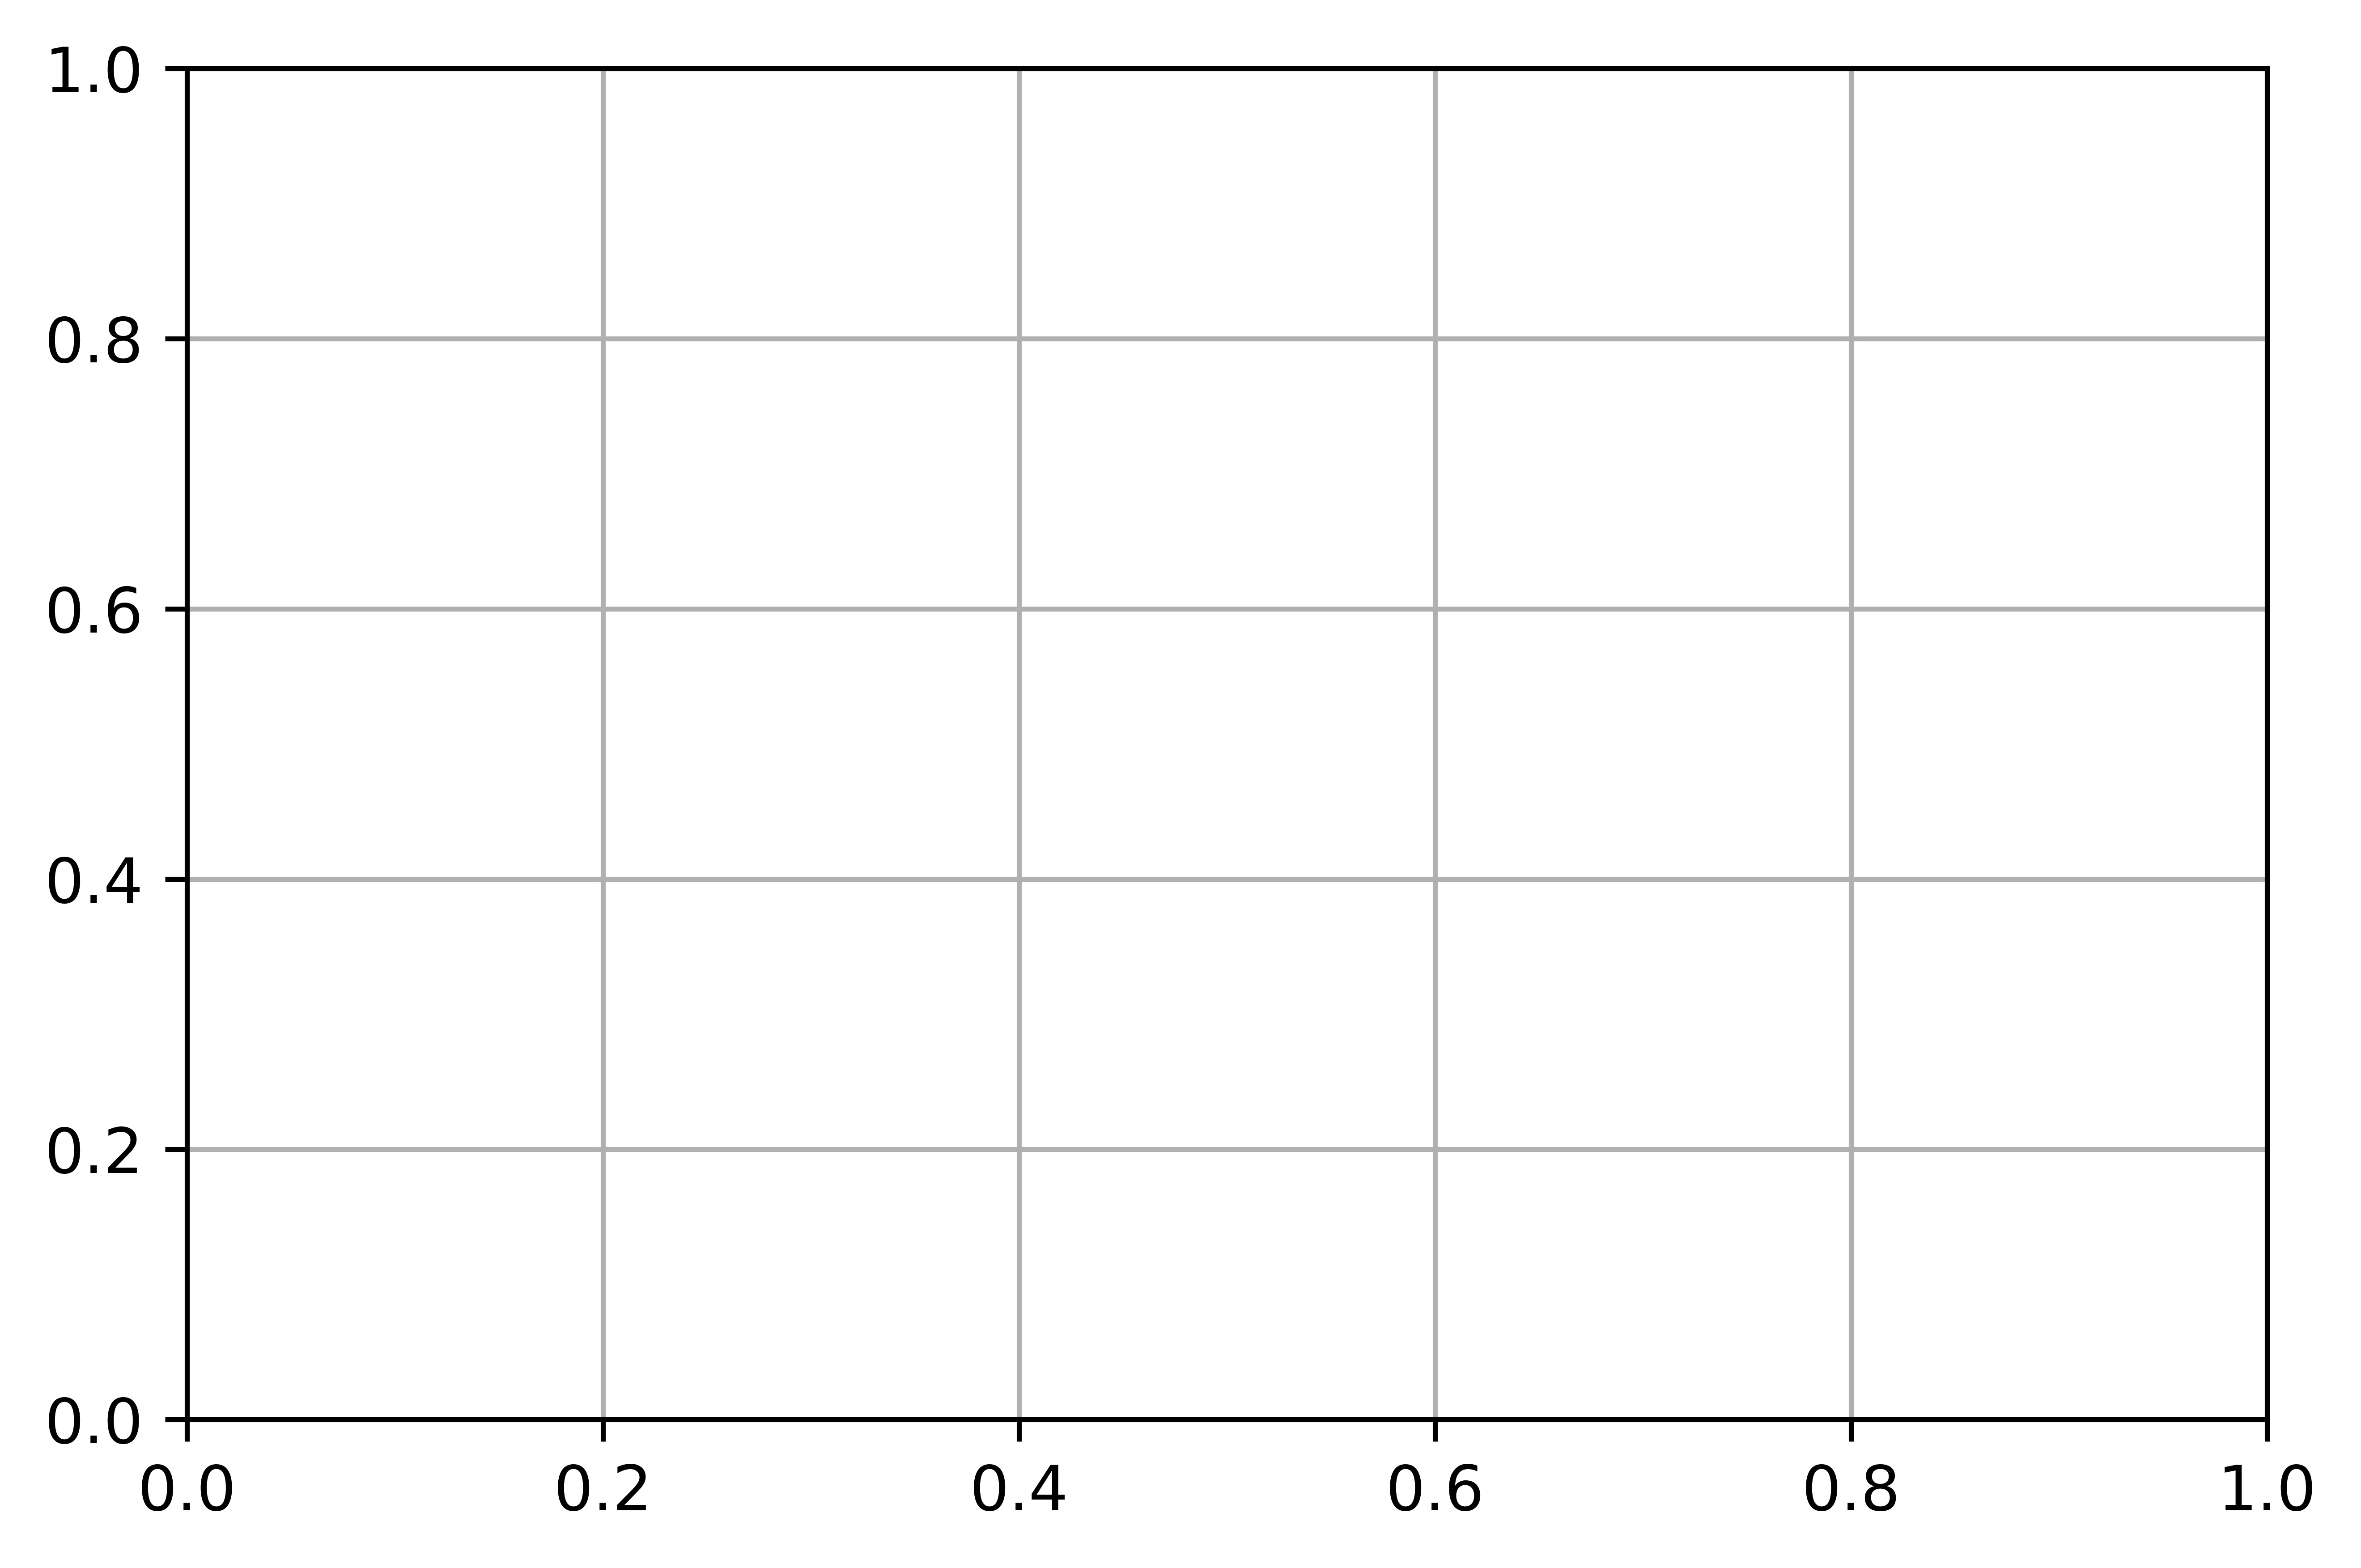

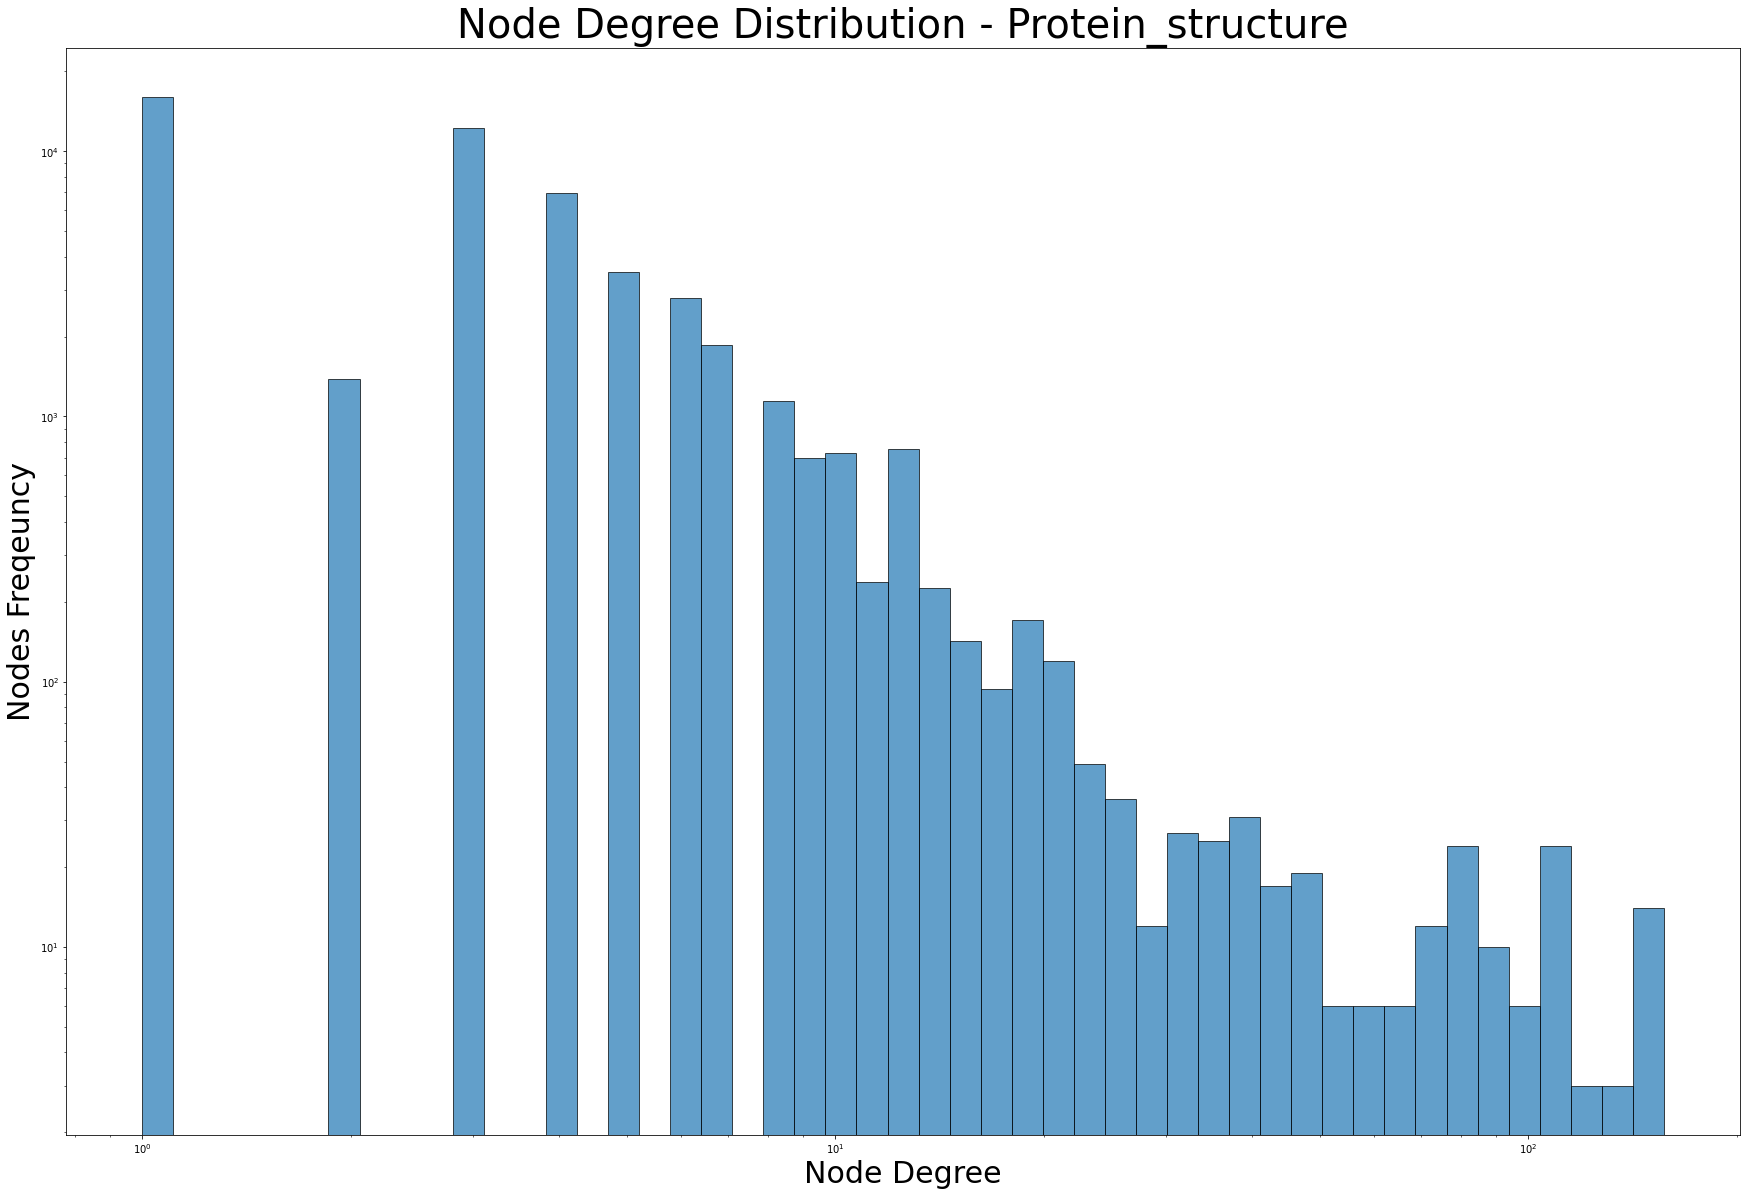

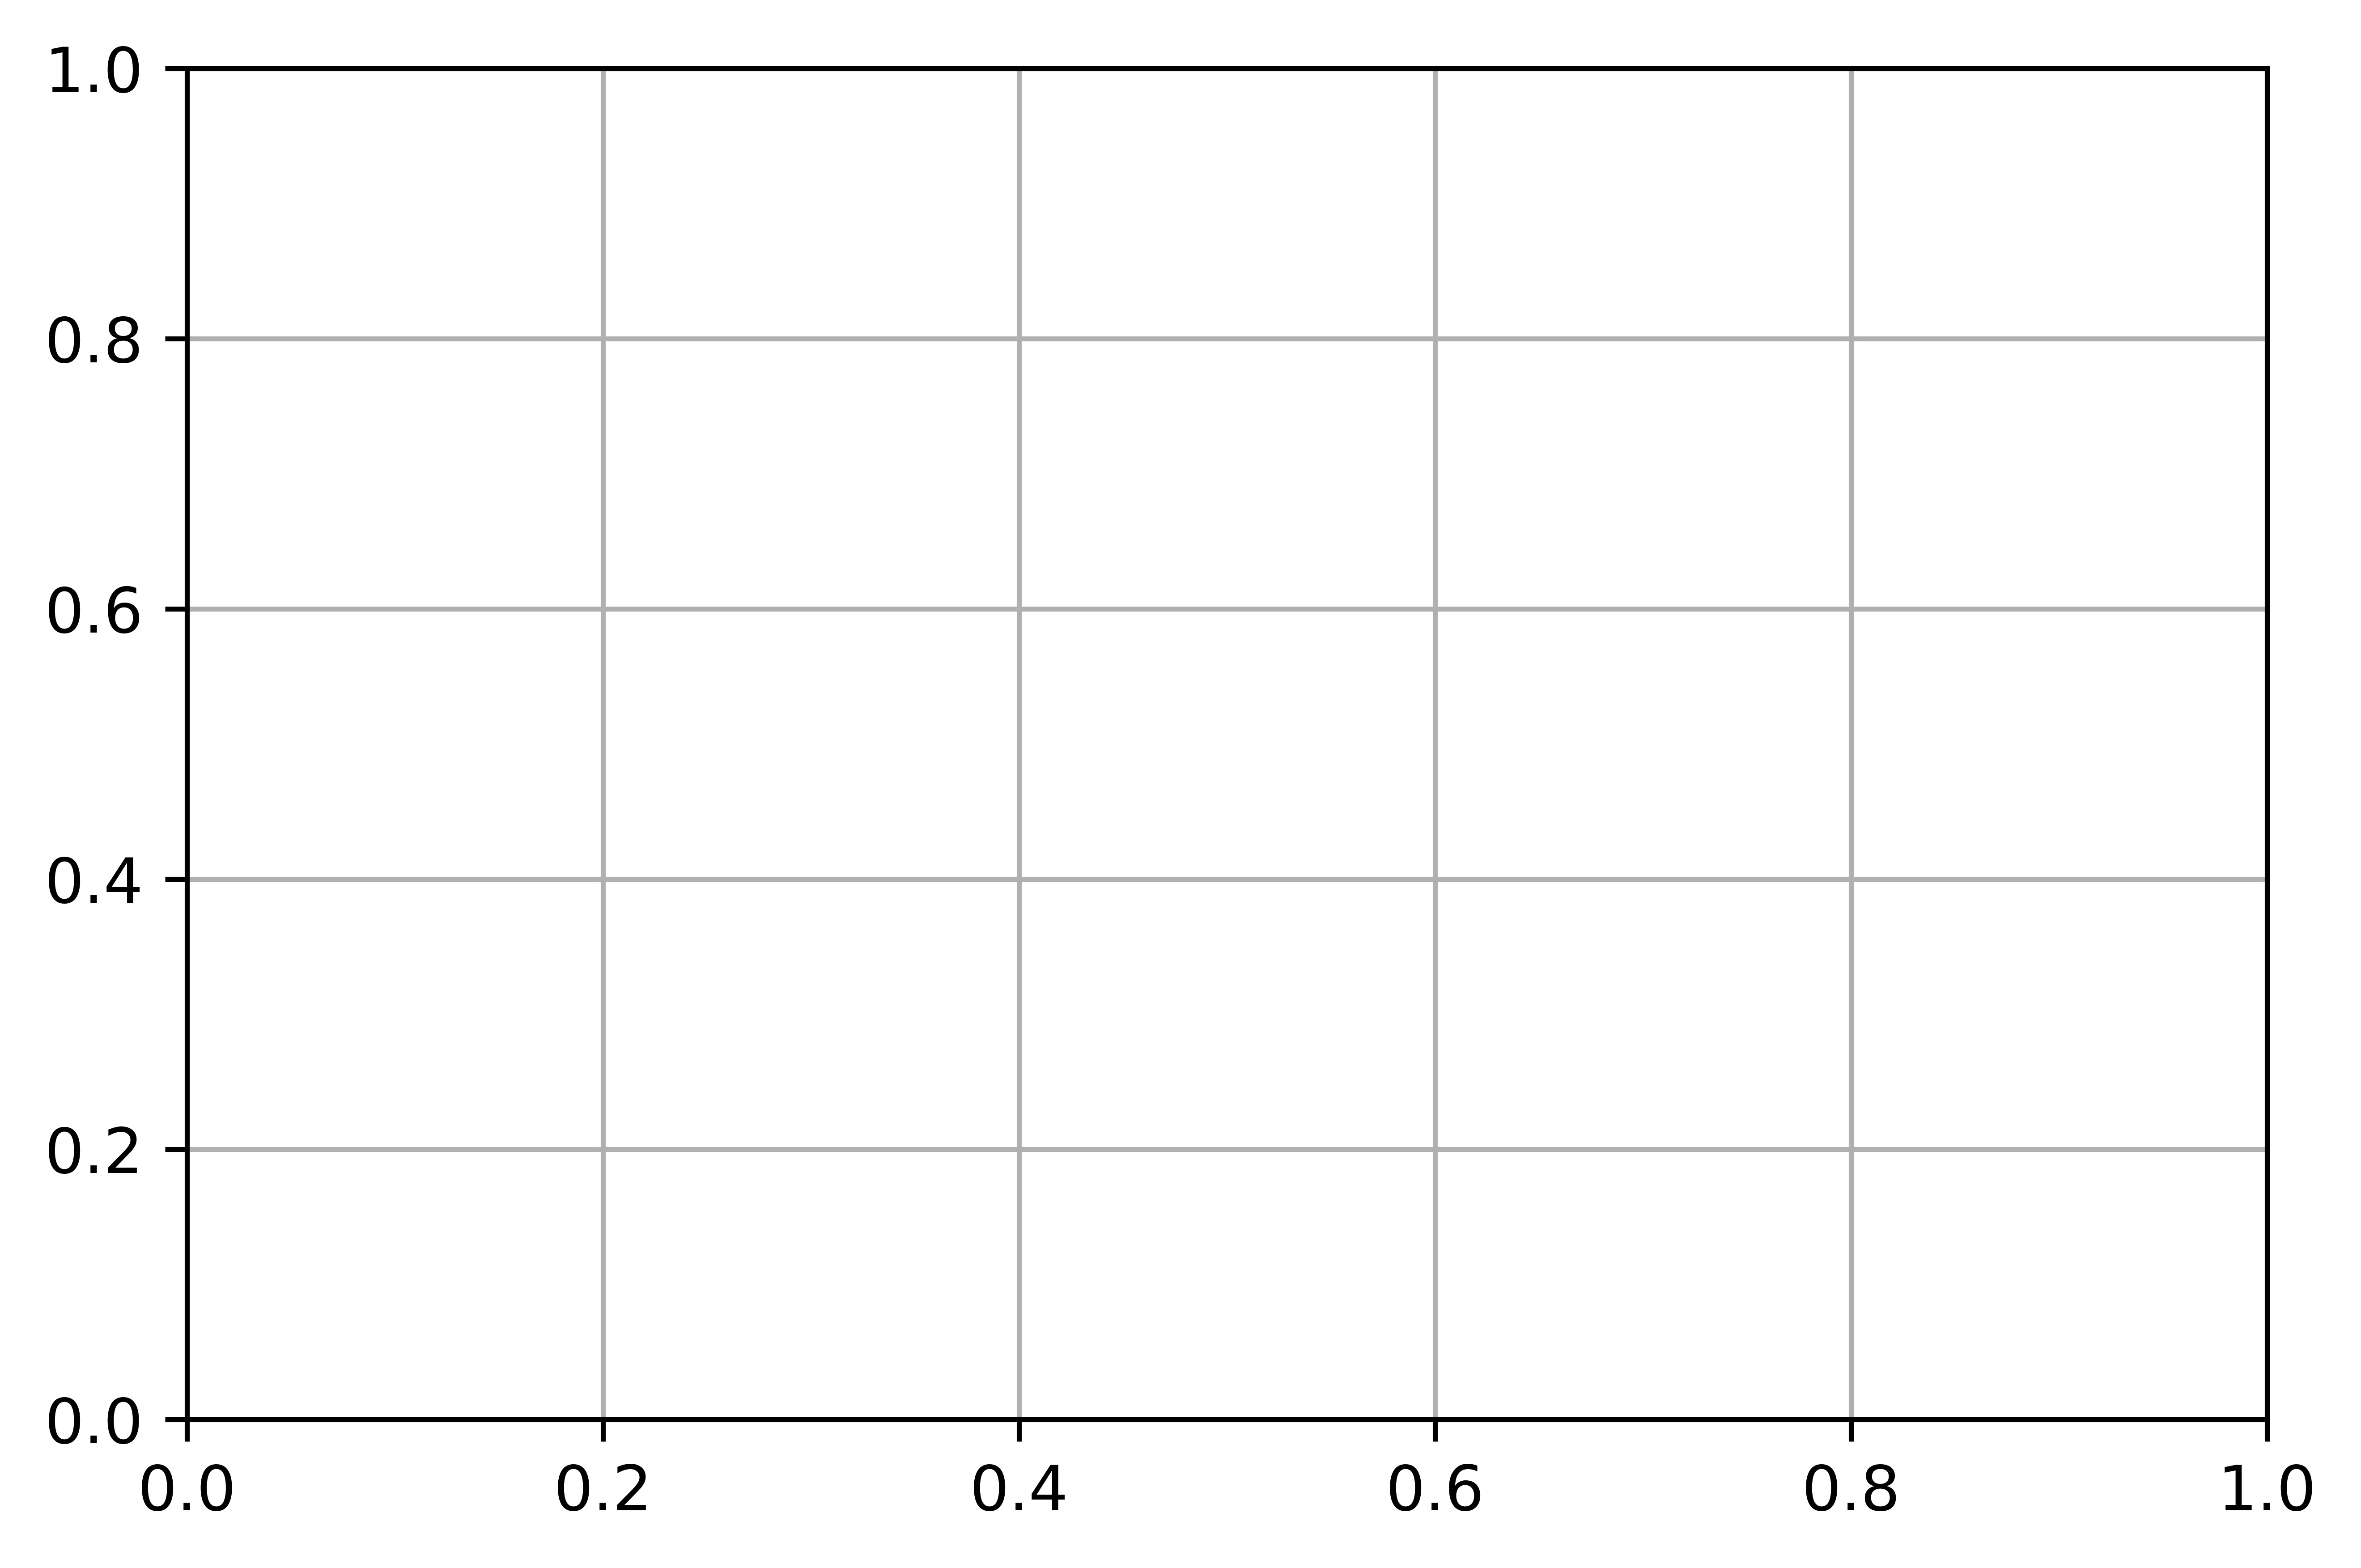

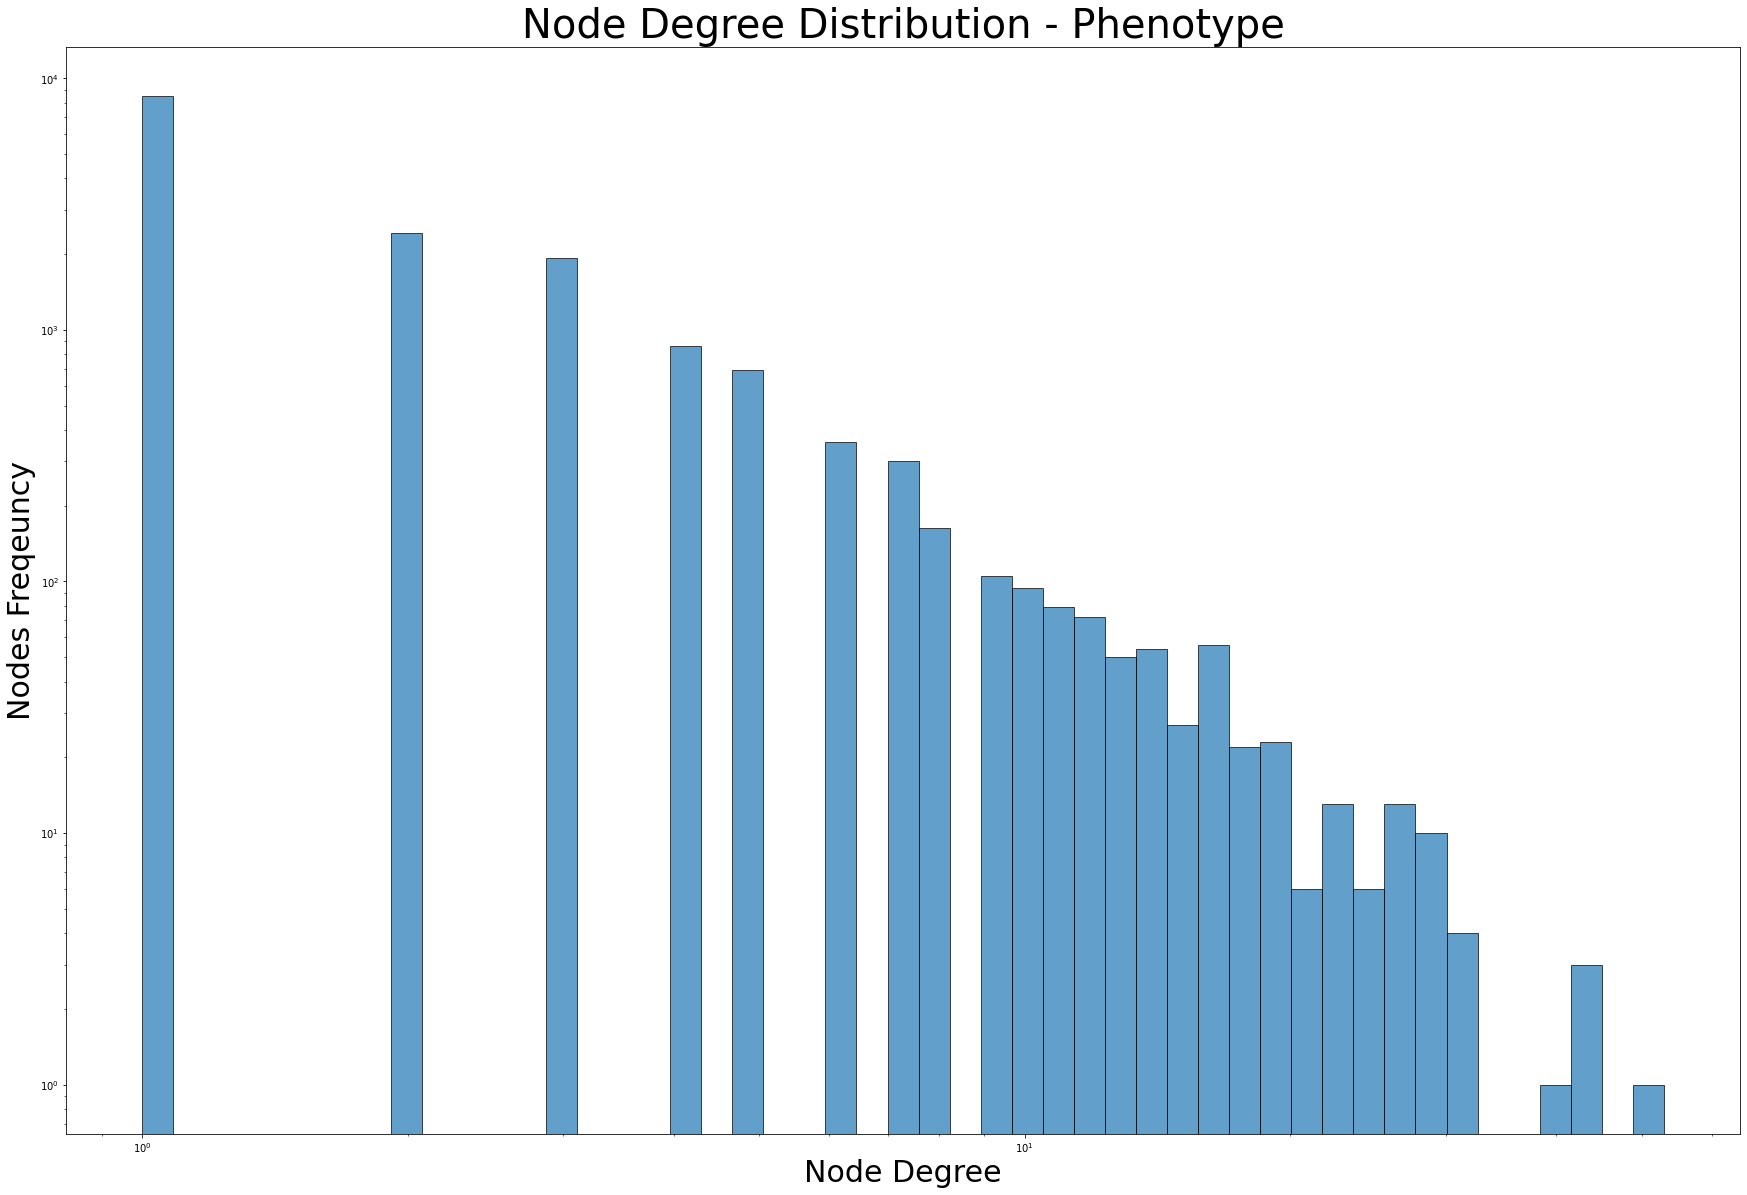

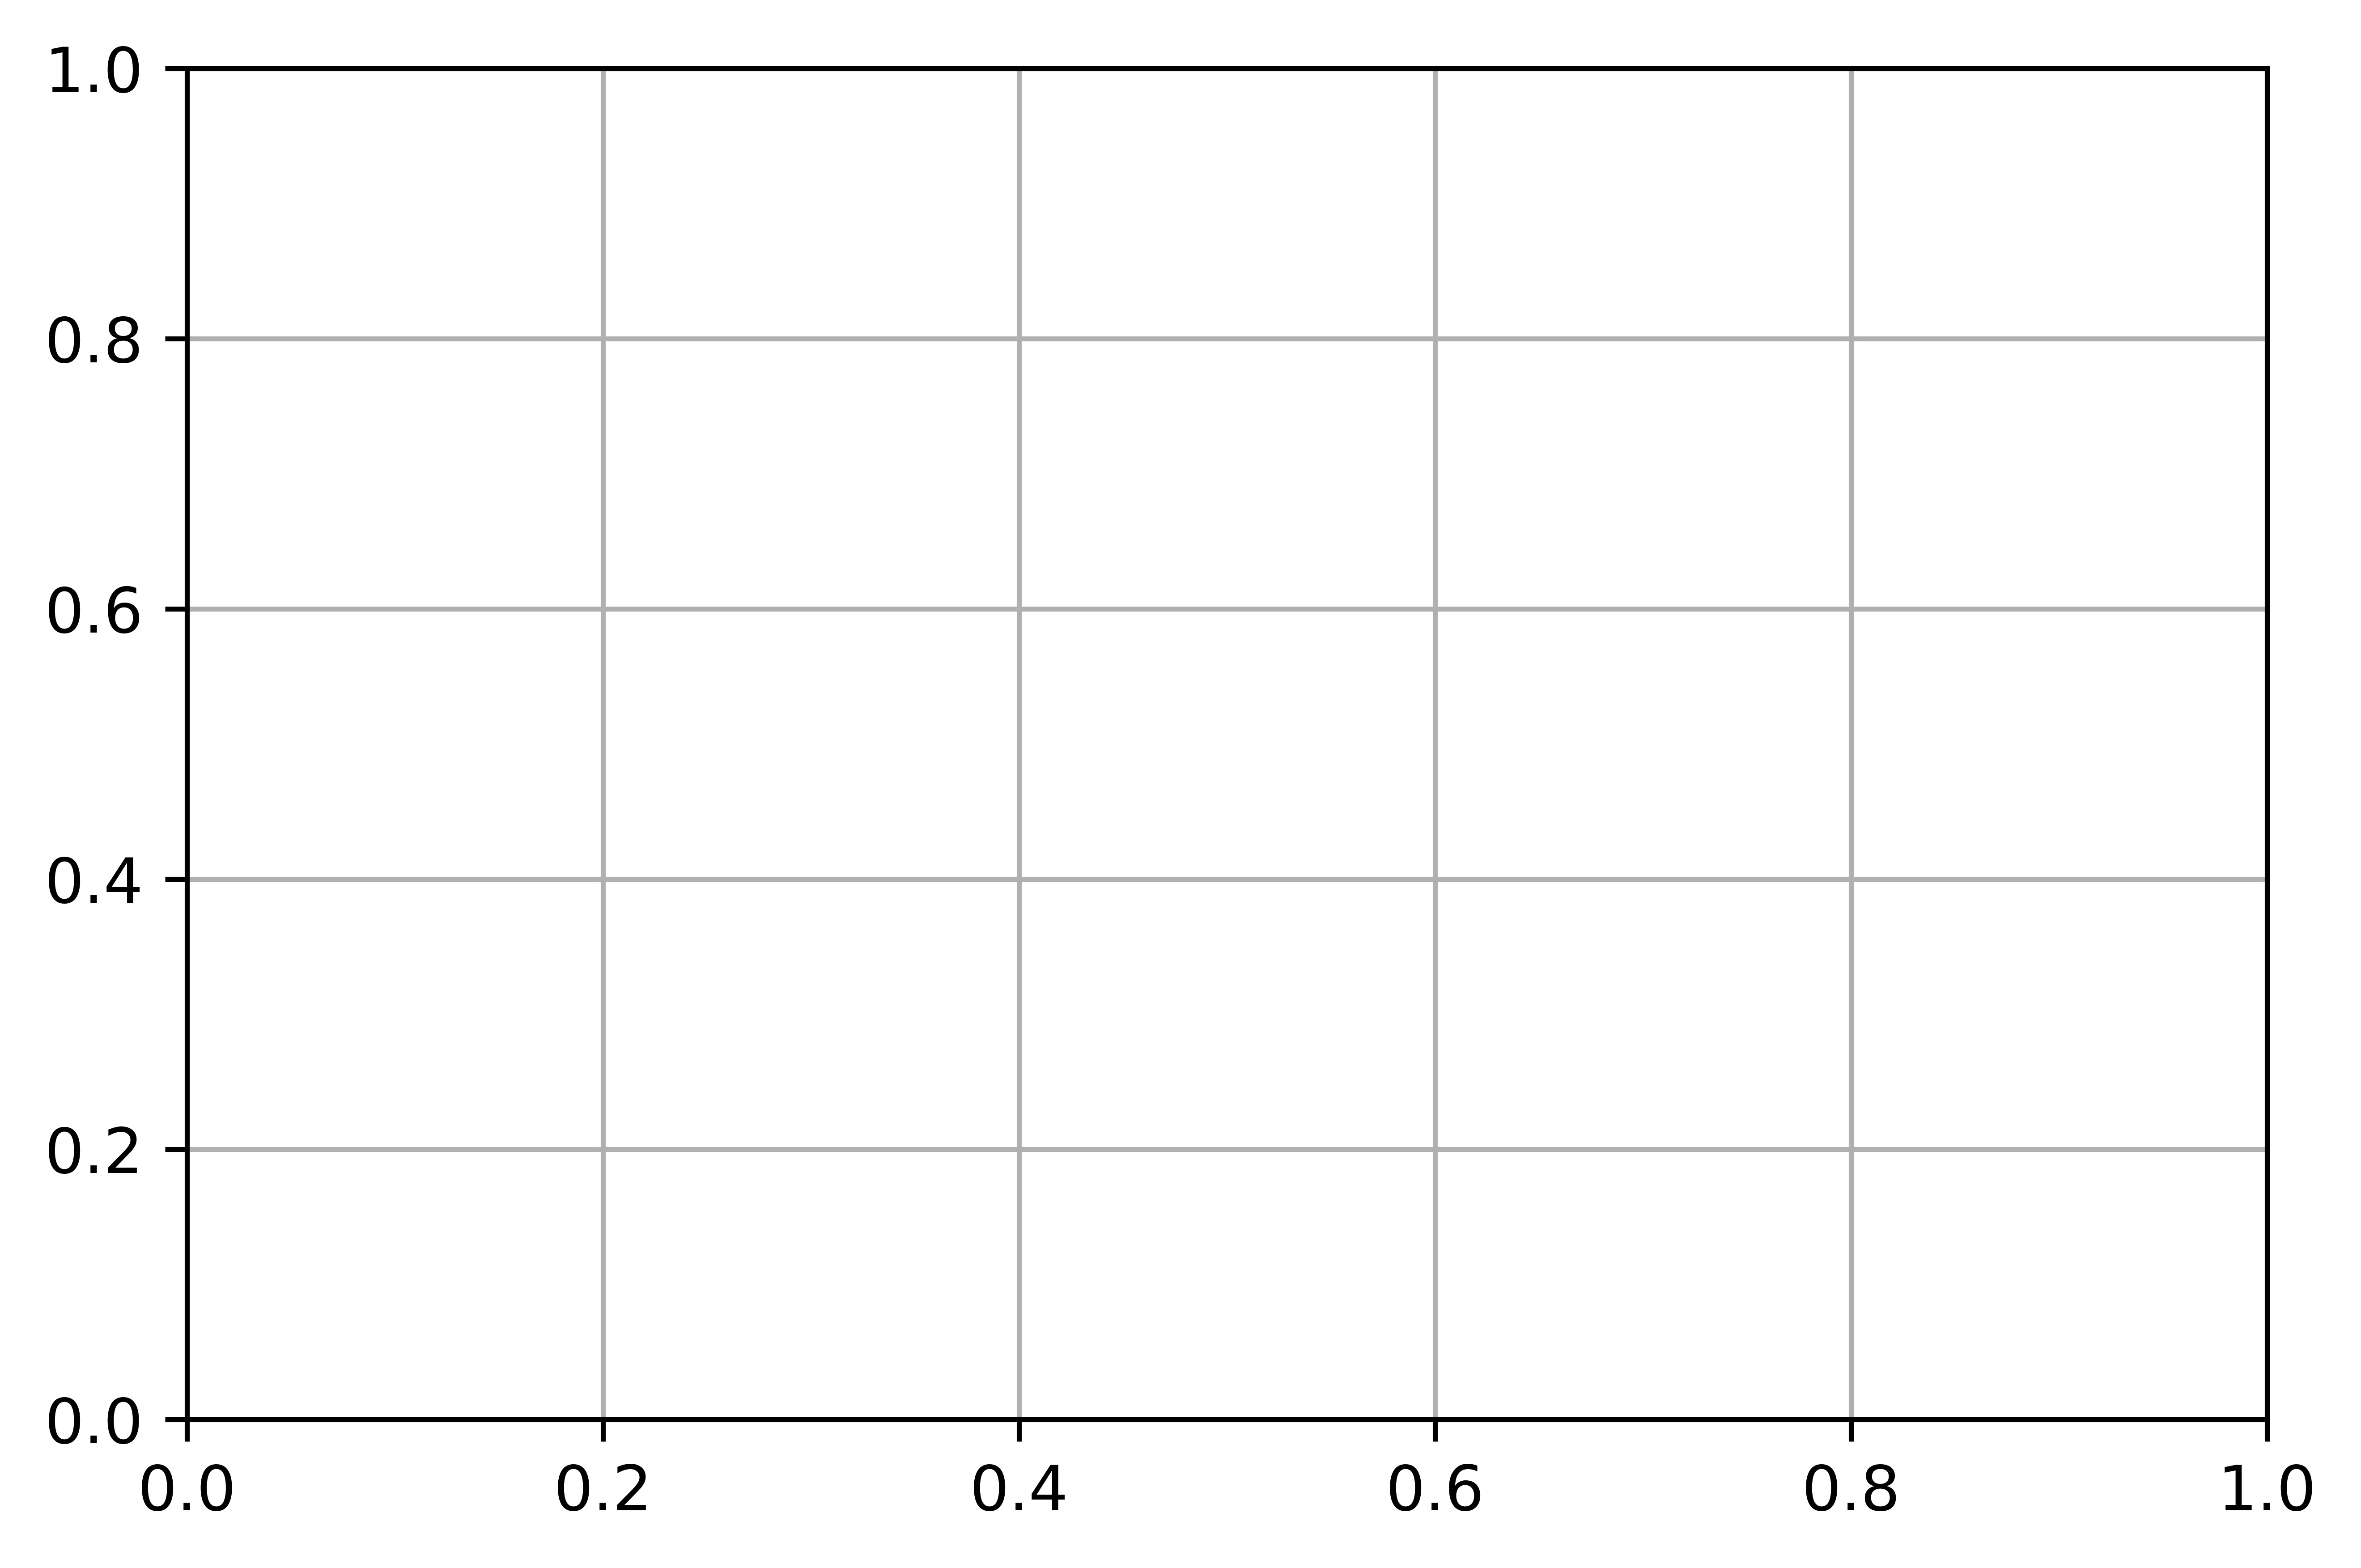

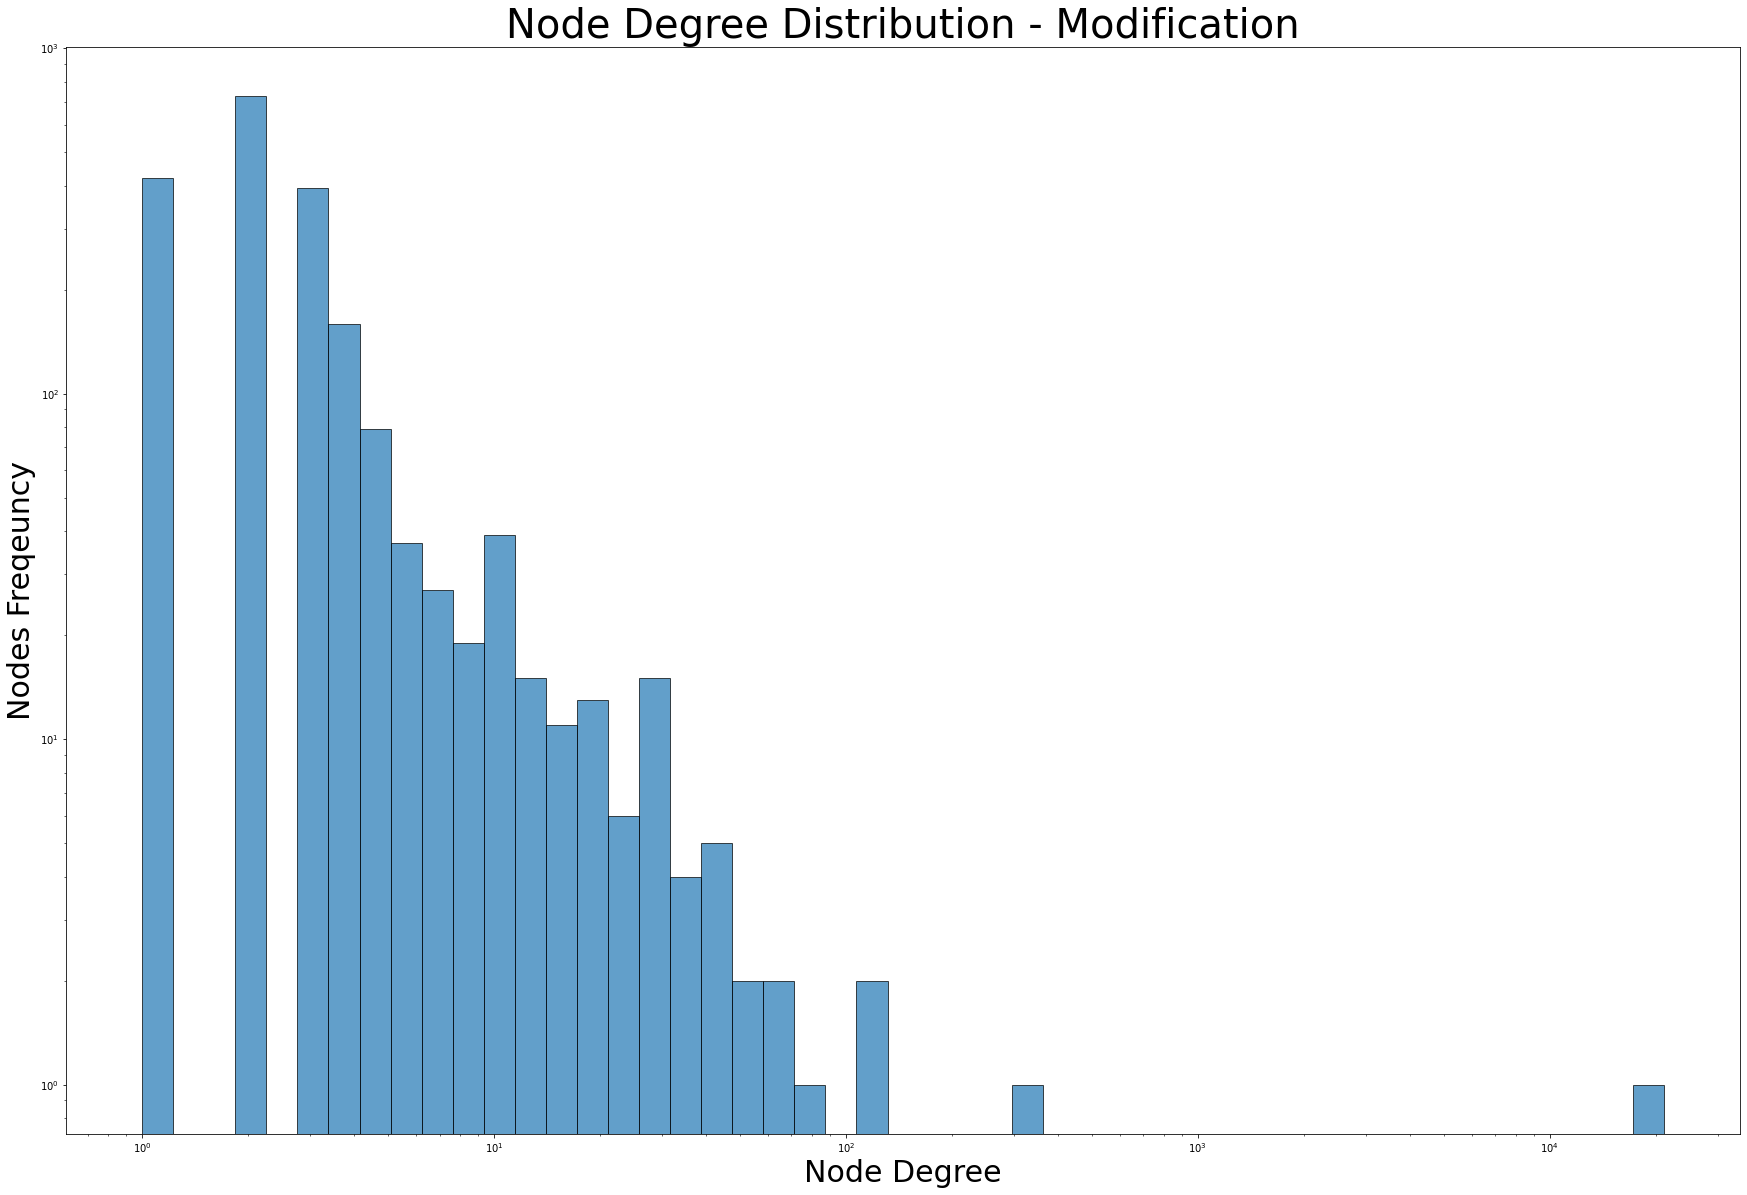

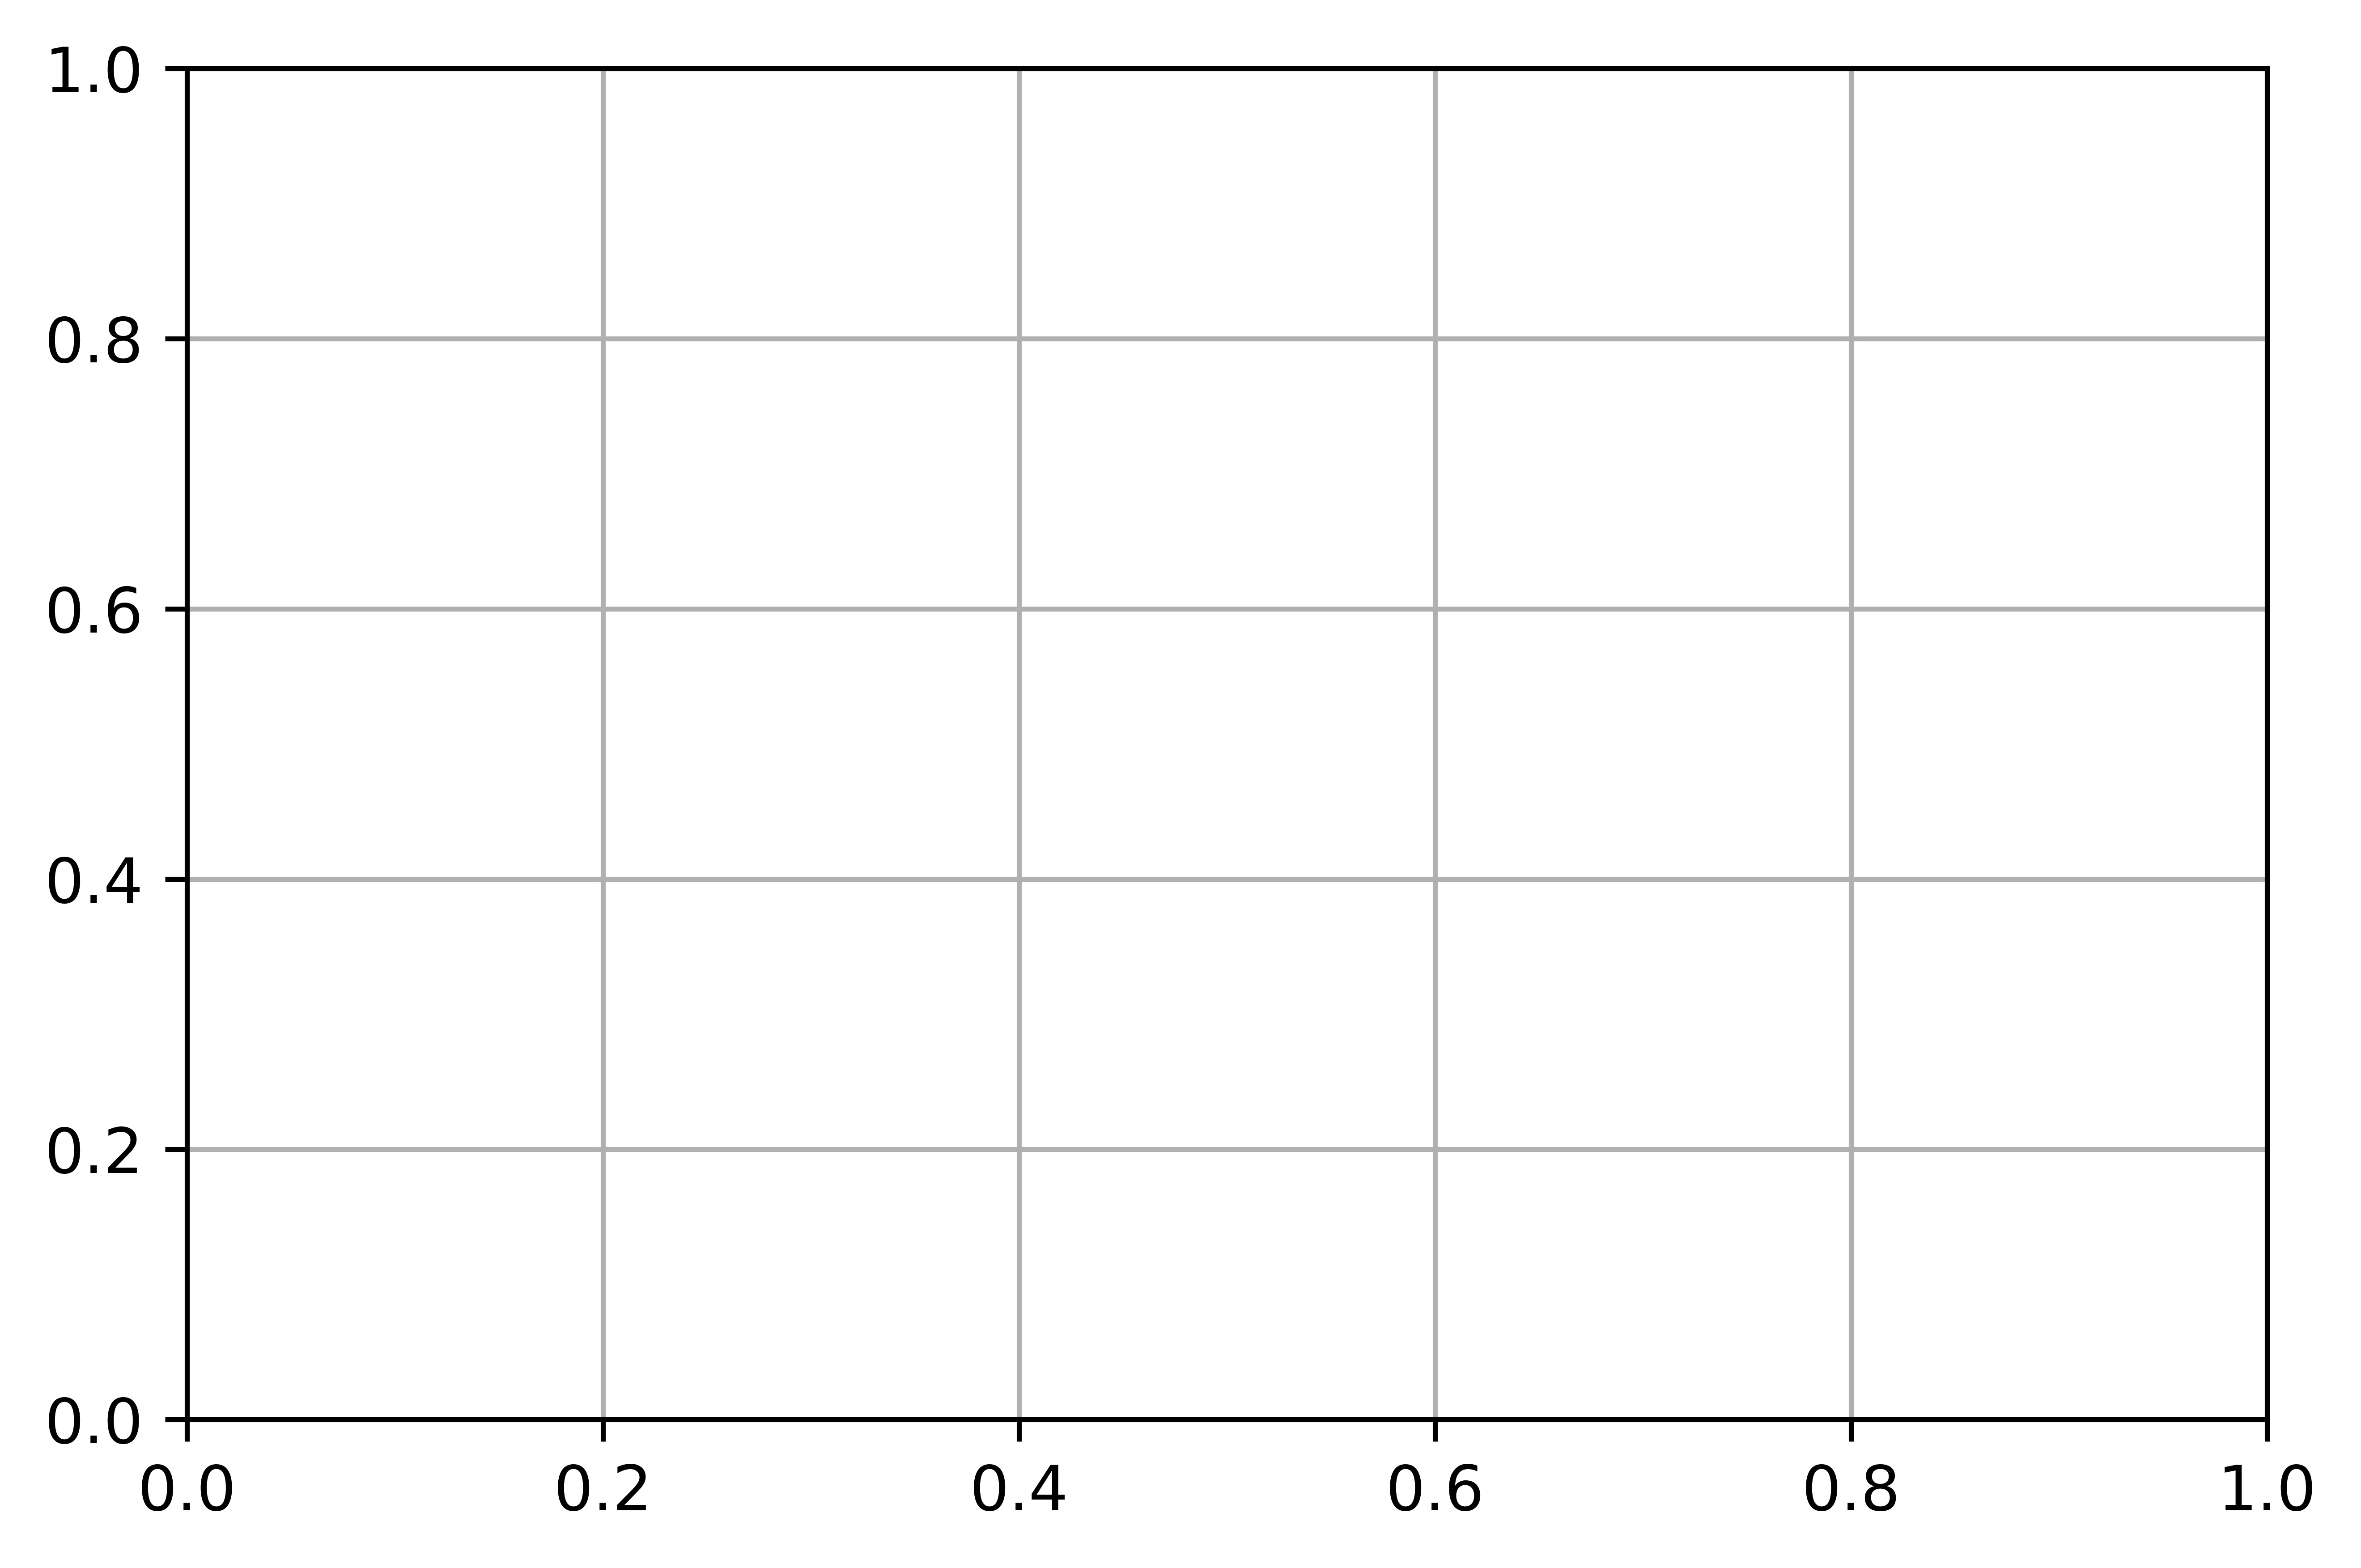

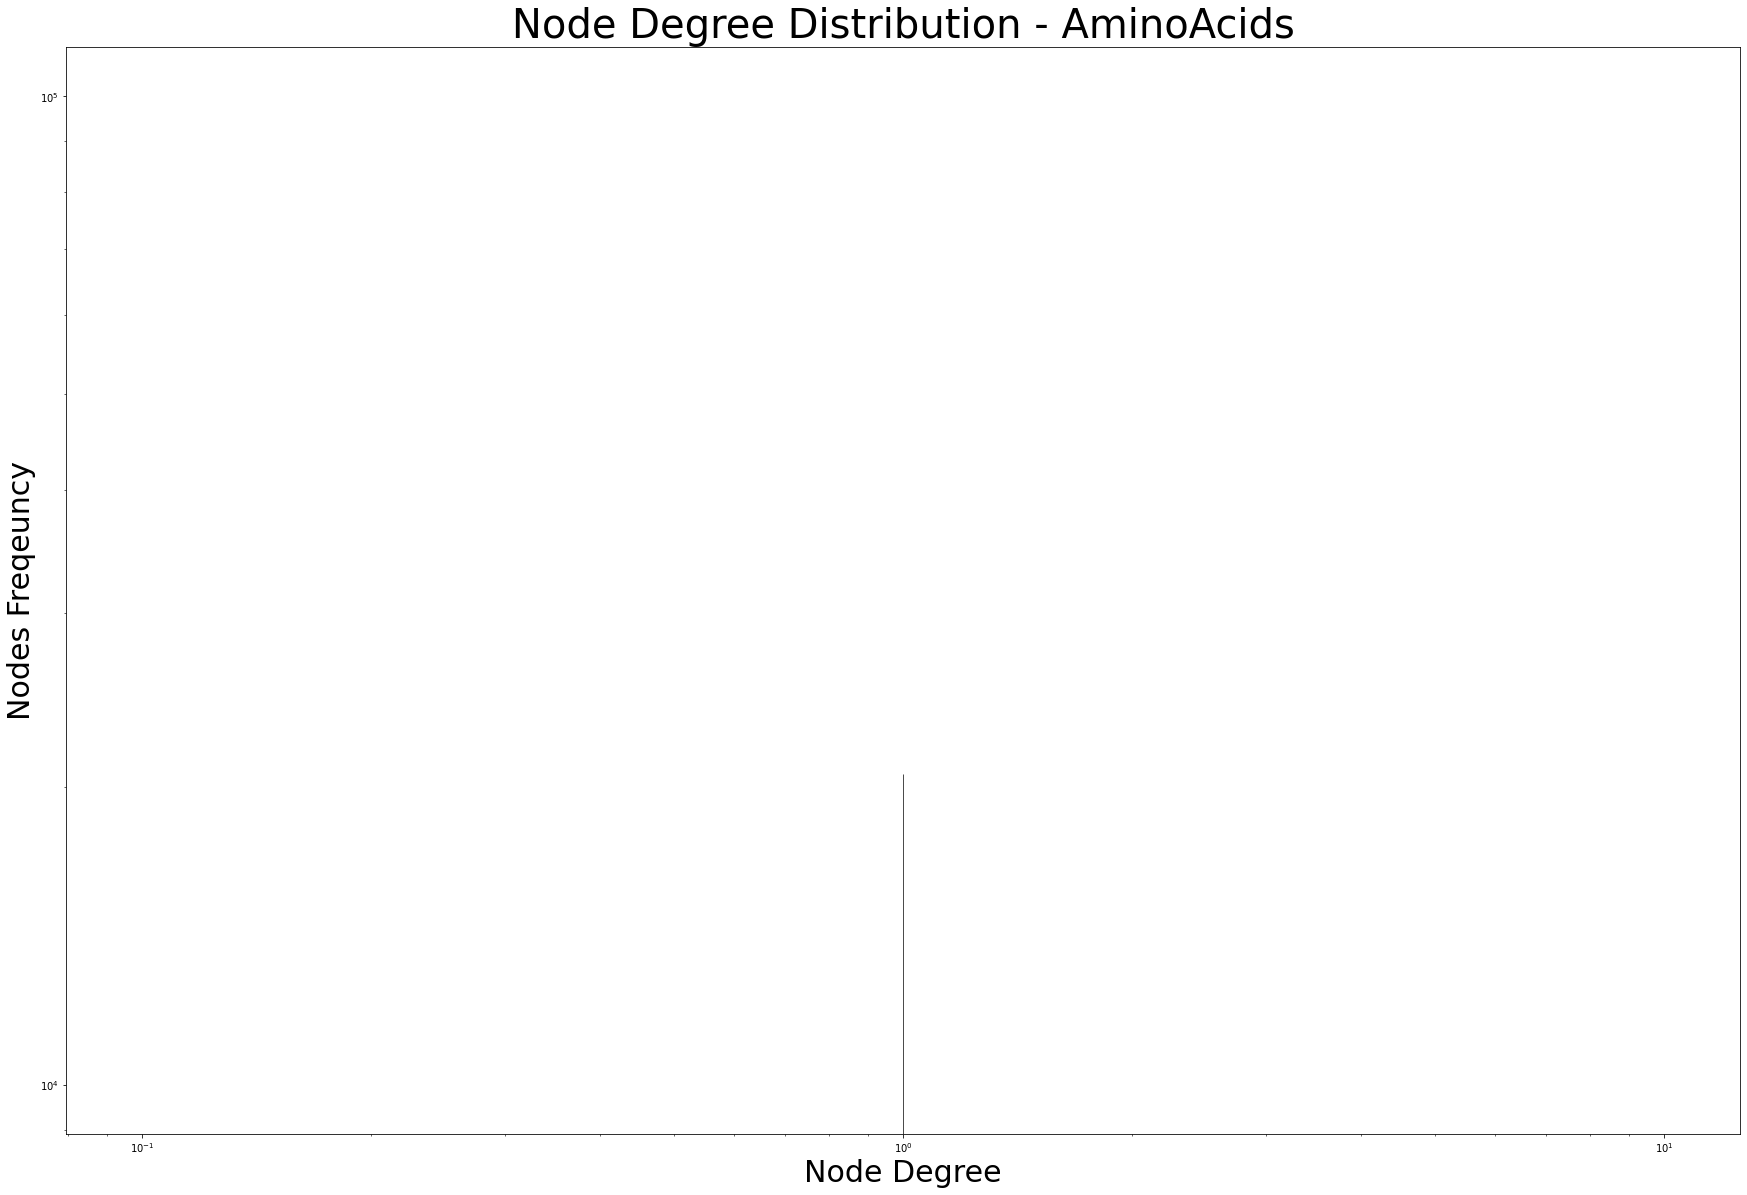

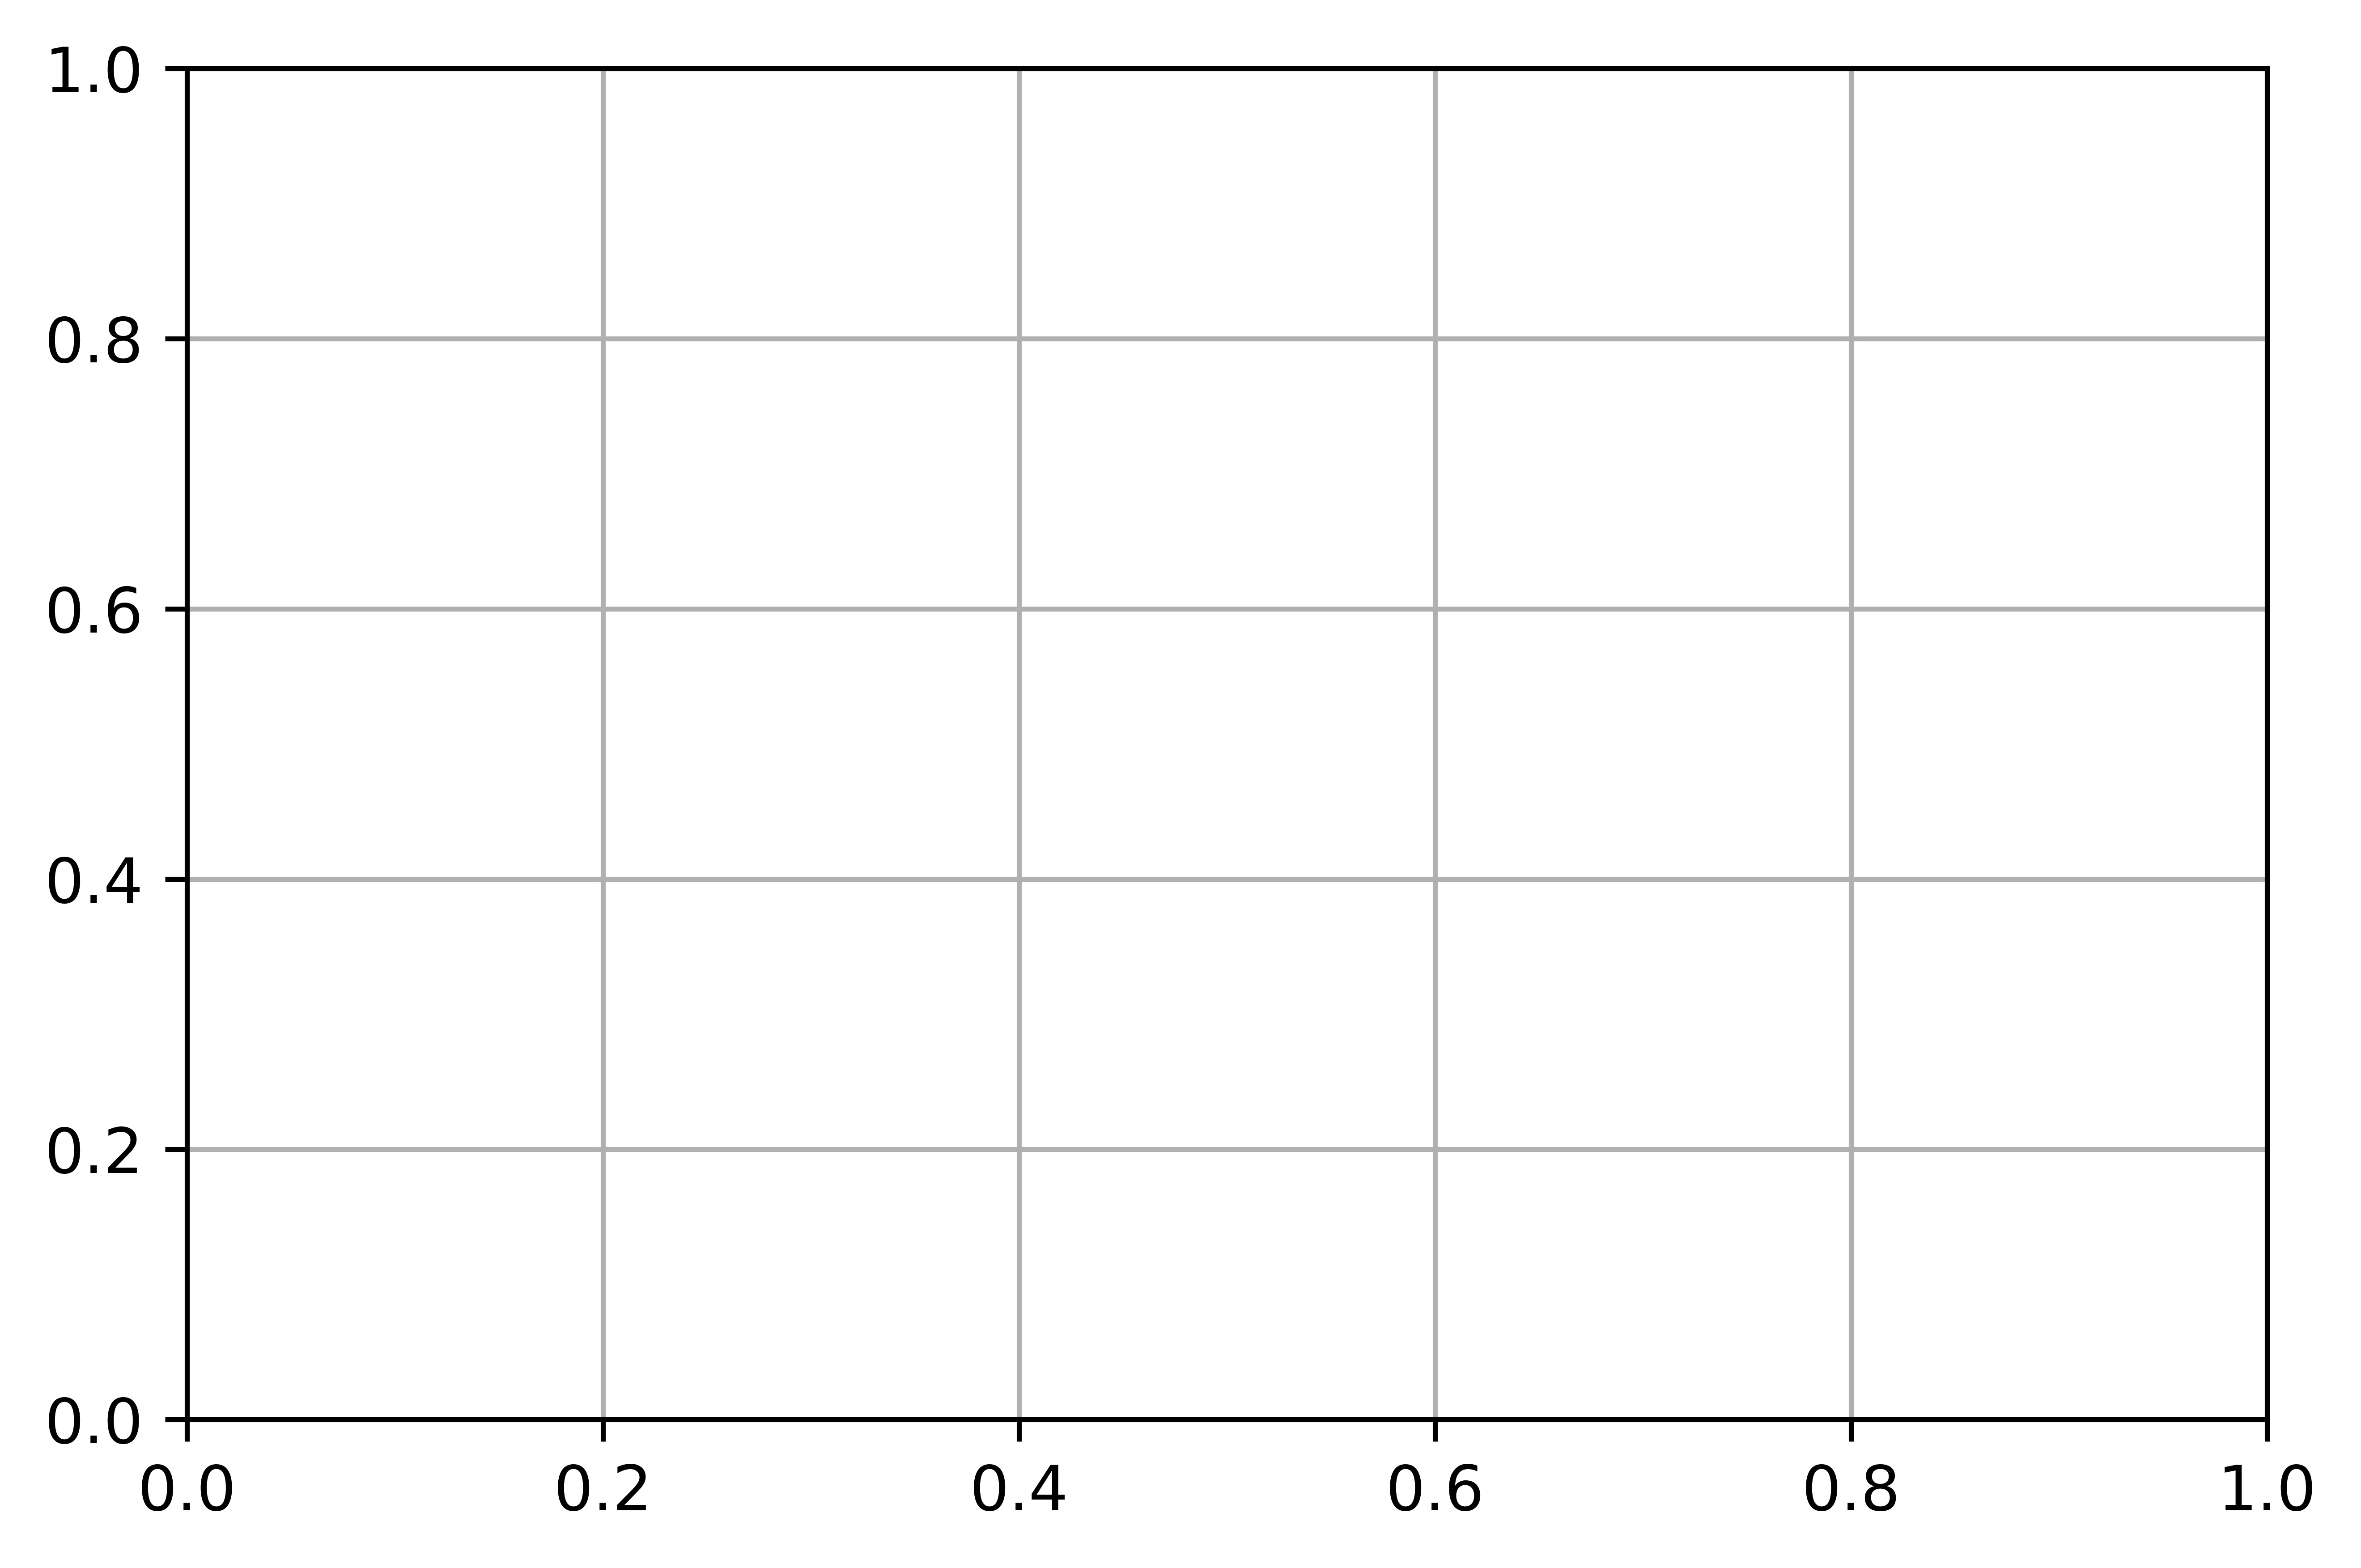

DONE


In [30]:
# For histogram
# Loop through each file in the directory
for filename in os.listdir(folder_path):
    
    if filename.endswith('.csv'):
        filepath = os.path.join(folder_path, filename)
        # Initialize a list to store the numbers
        numbers = []

        with open(filepath, mode='r', encoding='utf-8') as file:
            reader = csv.reader(file)
            next(reader)  

            for row in reader:
                # Ensure there's a second column
                if len(row) >= 2:
                    try:
                        # Convert the second column value to integer and append to the list
                        number = int(row[1].strip())
                        numbers.append(number)
                    except ValueError:
                        continue 
        
        # Count the occurrences of each number
        number_counts = Counter(numbers)
        # Extract the unique numbers and their counts
        node_degree = sorted(number_counts.keys())
        node_degree_freq = [number_counts[num] for num in node_degree]
        
        
        
        # Trying different binning technique 
        # Binning the node counts
        bins = np.logspace(np.log10(min(node_degree)), np.log10(max(node_degree)), 50)
        
        plt.figure(figsize=(30, 20))
        # Creating the histogram
        plt.hist(node_degree, bins=bins, weights=node_degree_freq, alpha=0.7, edgecolor='black')

        # Applying a logarithmic scale to the y-axis
        plt.yscale('log')
        plt.xscale('log')

        # Adding labels and title
        plt.xlabel('Node Degree',fontsize=30)
        plt.ylabel('Nodes Freqeuncy',fontsize=30)
        plt.title(f"Node Degree Distribution - {filename.split('.csv')[0]}", fontsize=40)
       
        plt.figure(dpi=1000)
        plt.grid(True)
        plt.show()

        
#         # Save the plot as an image file with the same name as the CSV file
#         plot_filepath = os.path.splitext(filepath)[0] + 'Histogram.png'
#         plt.savefig(plot_filepath)
        
        
        
        
        # Close the plot to release memory
        plt.close()
print("DONE")

# Trying sub plots for intersting nodes

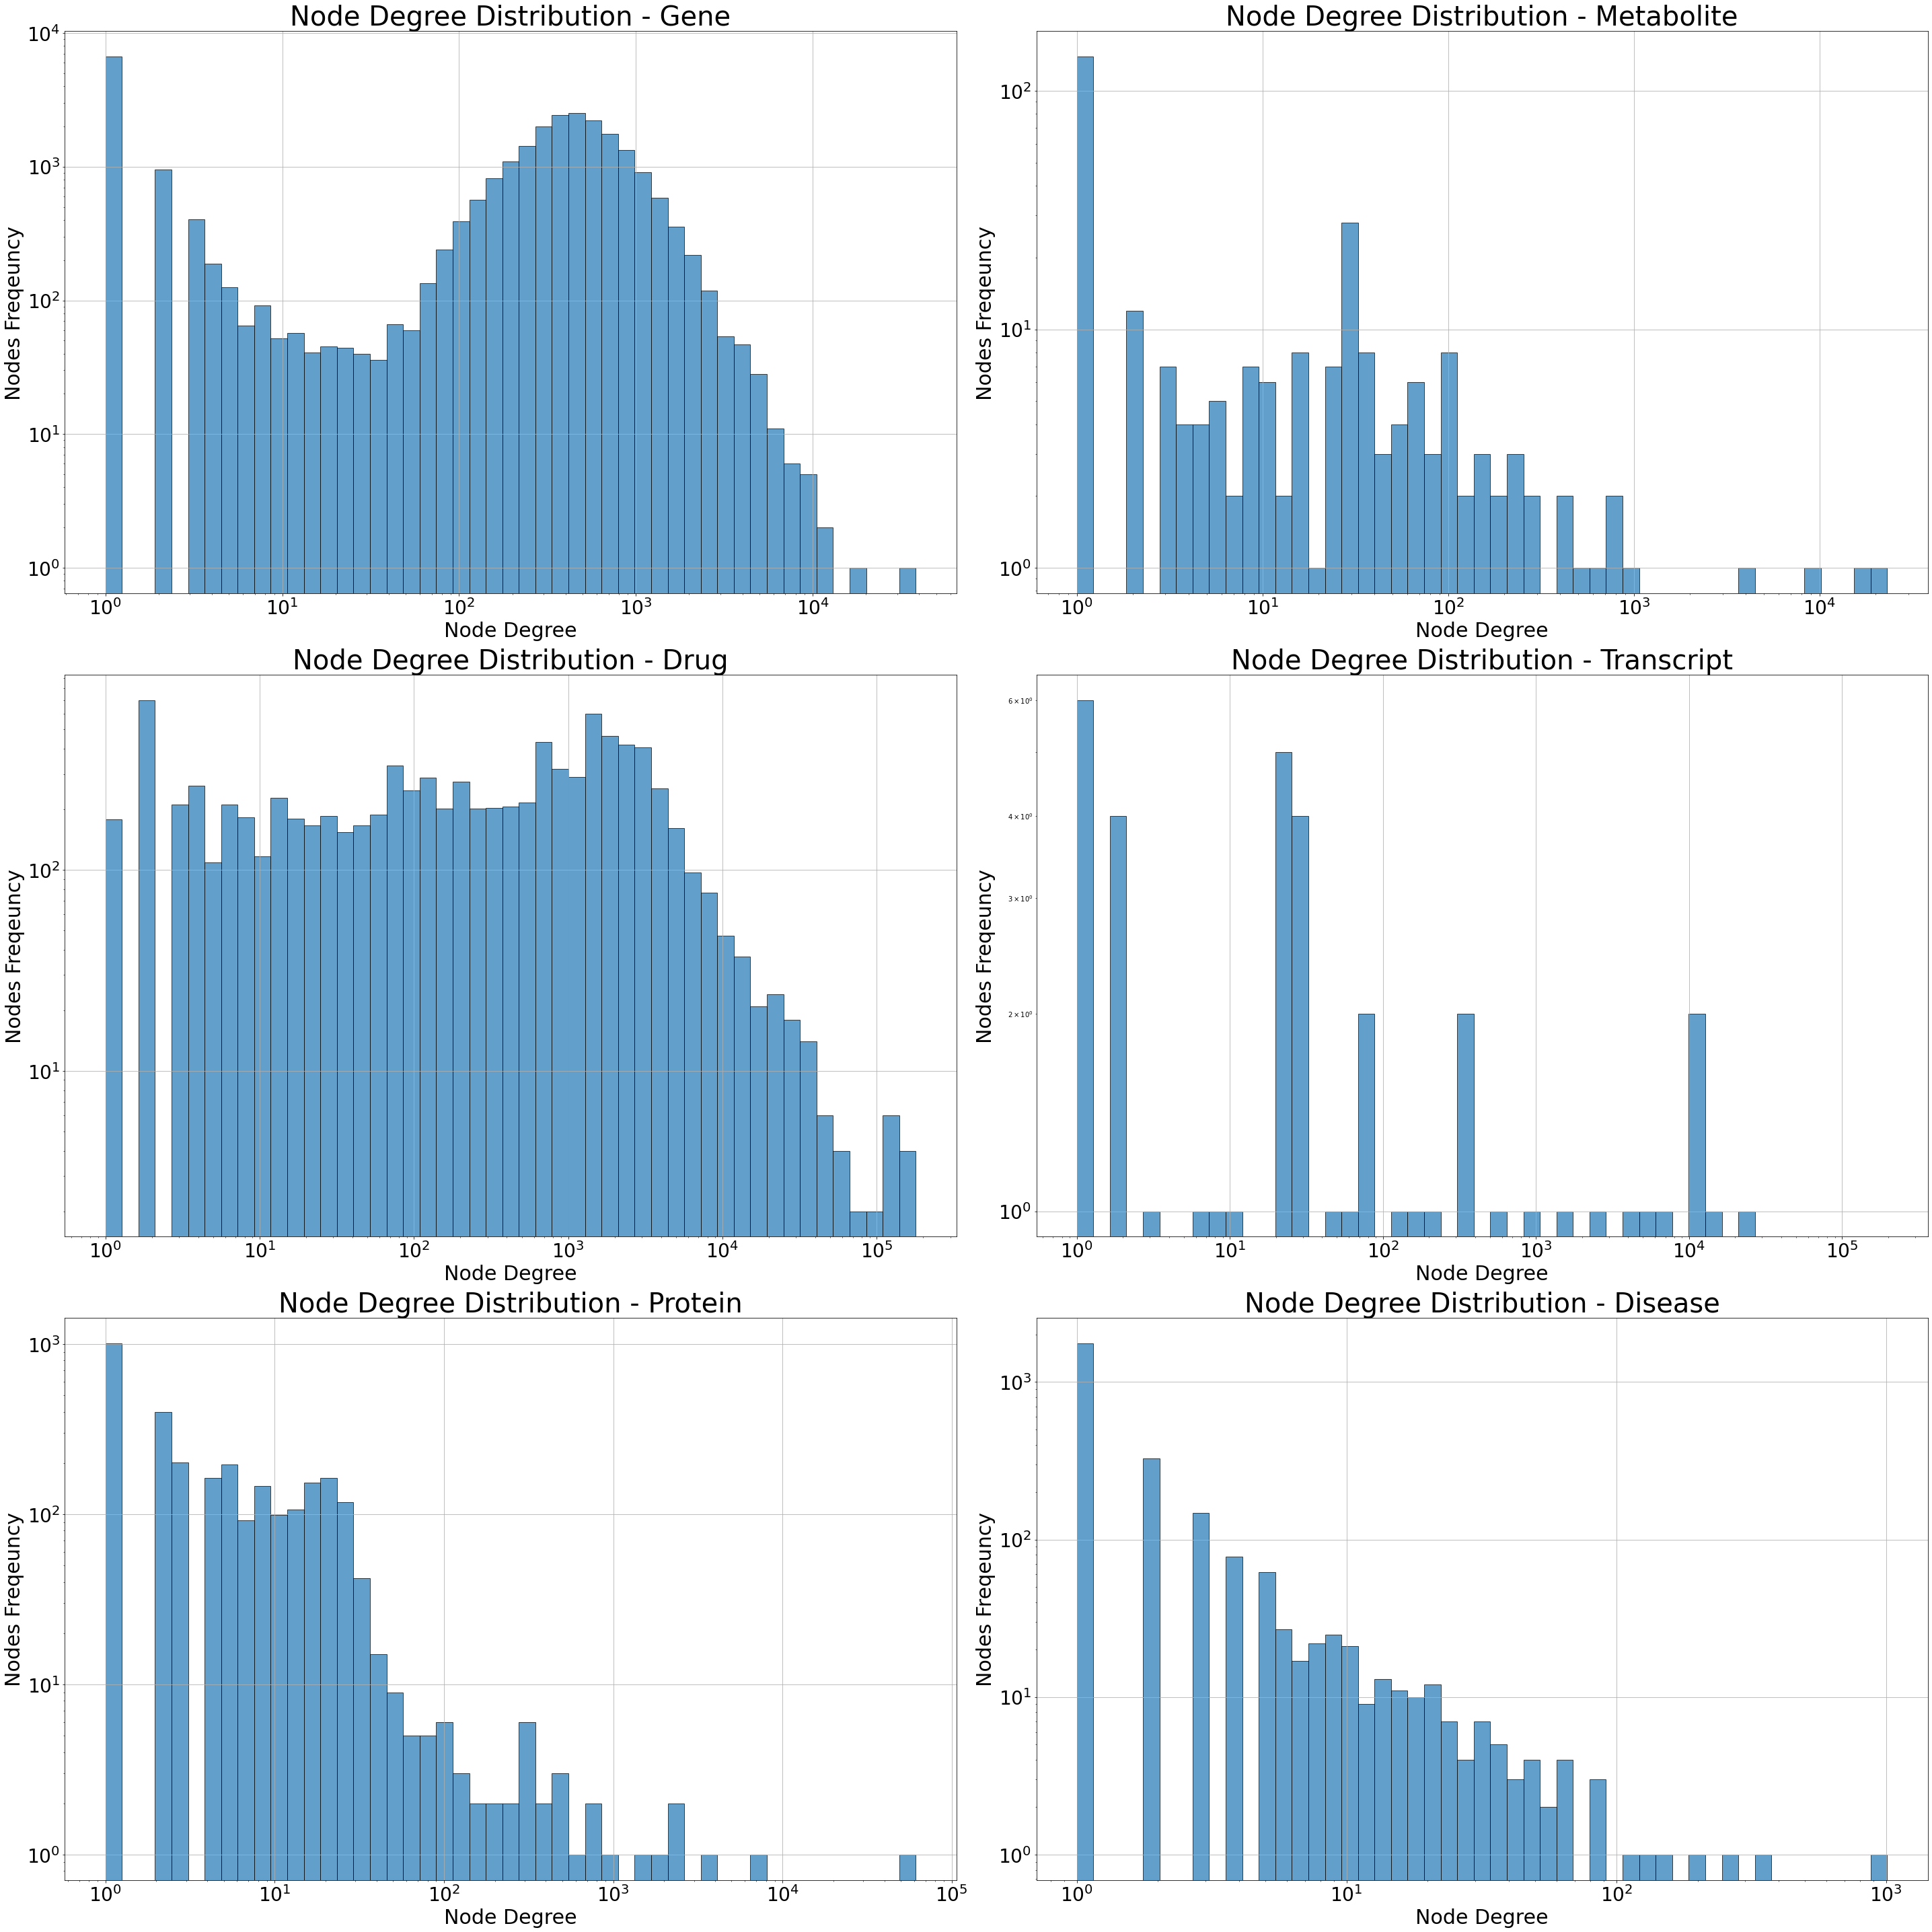

<Figure size 6000x4000 with 0 Axes>

DONE


In [24]:
# Initialize figure with 2 columns and 3 rows
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(40, 40))
axes_list = [item for sublist in axes for item in sublist]  # Flatten the list of axes

# Index to keep track of which subplot to fill next
plot_index = 0

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        filepath = os.path.join(folder_path, filename)
        numbers = []

        with open(filepath, mode='r', encoding='utf-8') as file:
            reader = csv.reader(file)
            next(reader)  # Skip the header

            for row in reader:
                if len(row) >= 2:
                    try:
                        number = int(row[1].strip())
                        numbers.append(number)
                    except ValueError:
                        continue

        # Count the occurrences of each number
        number_counts = Counter(numbers)
        # Extract the unique numbers and their counts
        node_degree = sorted(number_counts.keys())
        node_degree_freq = [number_counts[num] for num in node_degree]

        # Binning the node counts
        if node_degree:
            bins = np.logspace(np.log10(min(node_degree)), np.log10(max(node_degree)), 50)

            # Select the current axis
            ax = axes_list[plot_index]

            # Create histogram on this axis
            ax.hist(node_degree, bins=bins, weights=node_degree_freq, alpha=0.7, edgecolor='black')
            ax.set_yscale('log')
            ax.set_xscale('log')
            ax.set_xlabel('Node Degree',fontsize=30)
            ax.set_ylabel('Nodes Freqeuncy',fontsize=30)            

            ax.set_title(f"Node Degree Distribution - {filename.split('.csv')[0]}", fontsize=40)
            # Set larger tick labels on both x and y axes
            ax.tick_params(axis='both', which='major', labelsize=28)
            ax.grid(True)

            # Move to the next subplot for the next loop iteration
            plot_index += 1

# Adjust the layout
plt.tight_layout()
plt.figure(dpi=1000)
# Show the figure
plt.show()

# Optionally save the figure
# fig.savefig('output_histograms.png')|

# Close the plot to release memory
plt.close(fig)

print("DONE")

In [6]:
#import Counter
print(Counter.__version__)

NameError: name 'Counter' is not defined